In [516]:
%matplotlib inline
import math
import copy

import numpy as np
import gym
import gym_keygrid
import pandas as pd
import scipy

import matplotlib.pyplot as plt

import grakel
import sknetwork
import networkx as nx

In [235]:
from utils import policy_display, states_display, qtable_display, plot_state_freq, plot_scores

### Environment and Optimal Value Function

In [647]:
env = gym.make('keygrid-v0', grid_length=3)

You are using the KeyGridSparse environment with length 3


In [648]:
num_ep = 5
render = False
labels = {s:i for i, s in enumerate(env.states)}
graphs = []

for n in range(num_ep):
    state = env.reset()
    rewards, actions, states = [], [], []
    score = 0
    t = 0
    done = False
    
    G = nx.Graph()
    G.add_node(state)
    G.nodes[state]['label'] = state
    
    while not done and t < env._max_episode_steps:        
        action = env.sample_action()
        
        states.append(state)
        actions.append(action)

        state, reward, done, _ = env.step(action)
    
        rewards.append(reward)
        score += reward
        
        G.add_node(state)
        G.nodes[state]['label'] = state
        G.add_edge(states[-1], state)
        
        if render:
            env.render()

        t += 1
    graphs.append(G)
    print(states)

graphs = list(grakel.graph_from_networkx(graphs, node_labels_tag='label'))

[(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (2, 0), (2, 1), (1, 1), (2, 1), (1, 1), (1, 1), (1, 1), (2, 1), (2, 1)]
[(0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0)]
[(0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 0), (0, 0), (1, 0), (1, 0), (1, 0), (1, 0), (0, 0), (0, 0), (1, 0), (1, 0)]
[(0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0)]
[(0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (2, 0), (2, 0), (1, 0), (1, 0), (2, 0), (2, 0), (2, 0), (1, 0), (2, 0), (1, 0)]


In [649]:
grak_graph = []
for g in graphs:
    grak_graph.append(grakel.Graph(g[0], node_labels=g[1]))

In [650]:
wl_kernel = grakel.WeisfeilerLehman(normalize=True)

In [651]:
grak_graph

In [670]:
idx = 2

In [673]:
grak_graph[idx].index_node_labels

{0: (0, 0), 1: (1, 0), 2: (2, 0)}

In [672]:
grak_graph[idx].convert_labels('adjacency')

In [659]:
grak_graph[idx].get_labels()

/Users/utilisateur/opt/anaconda3/lib/python3.7/site-packages/grakel/graph.py:312: UserWarning: changing format from "adjacency" to "all"
  warnings.warn('changing format from "adjacency" to "all"')


{0: (0, 0), 1: (1, 0), 2: (1, 1), 3: (2, 0), 4: (2, 1)}

In [661]:
grak_graph[idx].index_node_labels

{0: (0, 0), 1: (1, 0), 2: (1, 1), 3: (2, 0), 4: (2, 1)}

In [456]:
wl_kernel.fit_transform([grak_graph[0]]) 

array([[1.]])

In [459]:
wl_kernel.transform(grak_graph)

array([[1.        ],
       [0.15811388],
       [0.10540926],
       [0.09960238],
       [0.0745356 ],
       [0.12297746],
       [0.11952286],
       [0.14054567],
       [0.06454972],
       [0.1304373 ]])

In [ ]:
sknetwork.visualization.svg_graph()

In [ ]:
wl_kernel = grakel.WeisfeilerLehman(normalize=True)
wl_kernel.fit_transform([g1, g2])

In [191]:
g1 = Graph([('a', 'b', 1.), ('a', 'c', 1.), ('b', 'a', 1.), ('c', 'a', 1.)])

In [192]:
g2 = Graph([('d', 'e', 1.), ('d', 'f', 1.), ('e', 'd', 1.), ('f', 'd', 1.)])

In [193]:
g1.construct_labels()
g2.construct_labels()

In [691]:
env = gym.make('keygrid-v0', grid_length=10)

You are using the KeyGridSparse environment with length 10


In [700]:
from reinforce_seq_comp import train

L = 300
logs = True


****************************************************************************************************
TRAINING START


Iteration: 0
(0, 0) probas:  [0.33 0.33 0.33]
(0, 1) probas:  [0.31 0.34 0.34]
(1, 0) probas:  [0.33 0.33 0.33]
(1, 1) probas:  [0.31 0.35 0.34]
(2, 0) probas:  [0.33 0.34 0.33]
(2, 1) probas:  [0.31 0.35 0.34]
(3, 0) probas:  [0.33 0.34 0.33]
(3, 1) probas:  [0.31 0.35 0.34]
(4, 0) probas:  [0.33 0.34 0.33]
(4, 1) probas:  [0.31 0.35 0.34]
(5, 0) probas:  [0.33 0.34 0.33]
(5, 1) probas:  [0.31 0.35 0.34]
(6, 0) probas:  [0.33 0.34 0.33]
(6, 1) probas:  [0.31 0.35 0.34]
(7, 0) probas:  [0.33 0.34 0.33]
(7, 1) probas:  [0.31 0.35 0.34]
(8, 0) probas:  [0.33 0.34 0.33]
(8, 1) probas:  [0.3  0.35 0.34]
(9, 0) probas:  [0.33 0.34 0.33]
(9, 1) probas:  [0.3  0.36 0.34]
[{(0, 0): {(0, 0): 1.0, (1, 0): 1.0}, (1, 0): {(1, 0): 1.0, (0, 0): 1.0, (2, 0): 1.0}, (2, 0): {(2, 0): 1.0, (3, 0): 1.0, (1, 0): 1.0}, (3, 0): {(4, 0): 1.0, (3, 0): 1.0, (2, 0): 1.0}, (4, 0): {(5, 0): 1.0, (

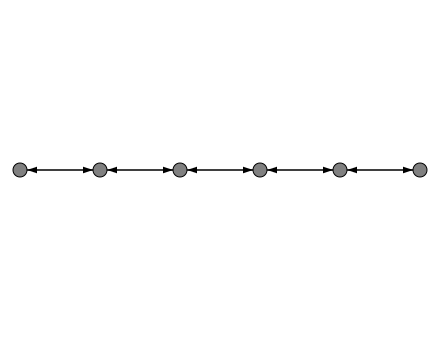

Score: 0
% of visited states: 30.0%

Iteration: 1
[{(0, 0): {(0, 0): 1.0, (1, 0): 1.0}, (1, 0): {(2, 0): 1.0, (1, 0): 1.0, (0, 0): 1.0}, (2, 0): {(2, 0): 1.0, (1, 0): 1.0, (3, 0): 1.0}, (3, 0): {(3, 0): 1.0, (4, 0): 1.0}, (4, 0): {(4, 0): 1.0, (3, 0): 1.0, (5, 0): 1.0}, (5, 0): {(5, 0): 1.0, (4, 0): 1.0, (6, 0): 1.0}, (6, 0): {(6, 0): 1.0, (5, 0): 1.0, (7, 0): 1.0}, (7, 0): {(8, 0): 1.0, (7, 1): 1.0}, (8, 0): {(7, 0): 1.0}, (7, 1): {(7, 1): 1.0, (6, 1): 1.0}, (6, 1): {(6, 1): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (7, 1): (7, 1), (6, 1): (6, 1)}, None]
[[0.26669823]]
2.749556186755059
[[1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0.

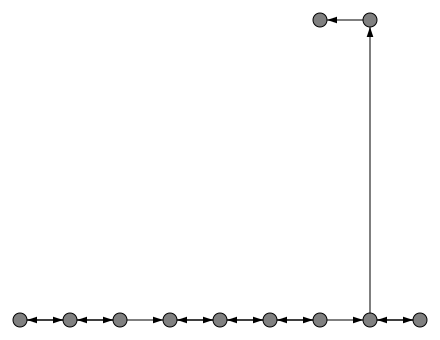

Score: 0
% of visited states: 55.0%

Iteration: 2
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(1, 0): 1.0, (2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(4, 0): 1.0, (3, 0): 1.0, (5, 0): 1.0}, (5, 0): {(5, 0): 1.0, (6, 0): 1.0}, (6, 0): {(6, 0): 1.0, (7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.15061602 0.15891043]]
5.461483328422701
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


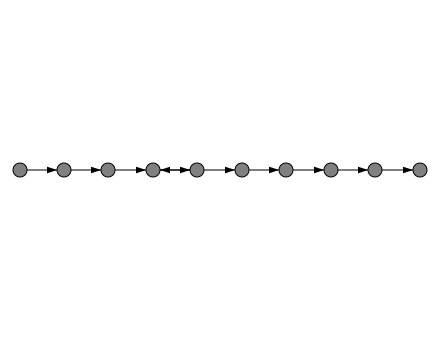

Score: 0
% of visited states: 60.0%

Iteration: 3
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(1, 0): 1.0, (2, 0): 1.0}, (2, 0): {(2, 0): 1.0, (3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333]]
2.971131638322855
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


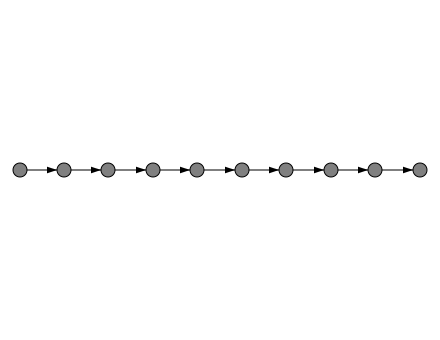

Score: 0
% of visited states: 60.0%

Iteration: 4
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667]]
1.6279157136712459
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


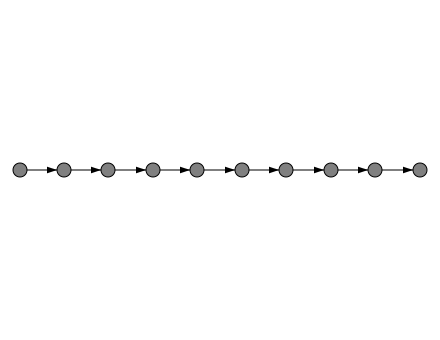

Score: 0
% of visited states: 60.0%

Iteration: 5
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.        ]]
0.9824601180810932
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


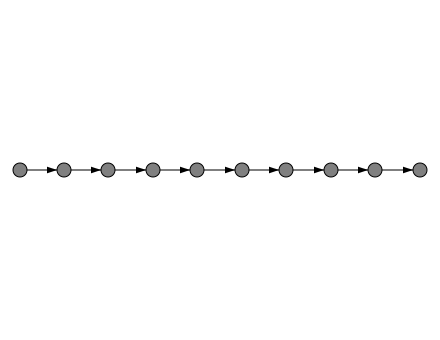

Score: 0
% of visited states: 60.0%

Iteration: 6
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.        ]]
0.7035200355366231
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


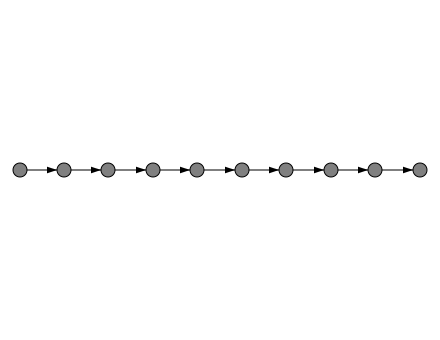

Score: 0
% of visited states: 60.0%

Iteration: 7
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.        ]]
0.547946937730746
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


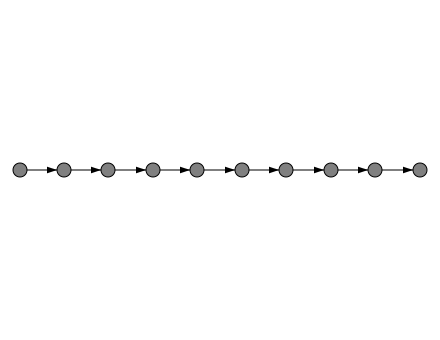

Score: 0
% of visited states: 60.0%

Iteration: 8
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.        ]]
0.4487192763428032
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


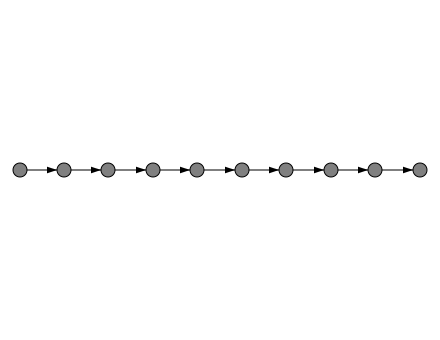

Score: 0
% of visited states: 60.0%

Iteration: 9
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.        ]]
0.37991965955960394
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


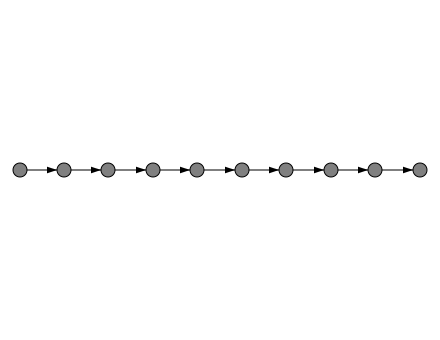

Score: 0
% of visited states: 60.0%

Iteration: 10
(0, 0) probas:  [0.   0.04 0.96]
(0, 1) probas:  [0.   0.03 0.97]
(1, 0) probas:  [0.   0.03 0.97]
(1, 1) probas:  [0.   0.02 0.97]
(2, 0) probas:  [0.   0.02 0.97]
(2, 1) probas:  [0.   0.02 0.98]
(3, 0) probas:  [0.   0.02 0.98]
(3, 1) probas:  [0.   0.02 0.98]
(4, 0) probas:  [0.   0.01 0.98]
(4, 1) probas:  [0.   0.01 0.99]
(5, 0) probas:  [0.   0.01 0.99]
(5, 1) probas:  [0.   0.01 0.99]
(6, 0) probas:  [0.   0.01 0.99]
(6, 1) probas:  [0.   0.01 0.99]
(7, 0) probas:  [0.   0.01 0.99]
(7, 1) probas:  [0.   0.01 0.99]
(8, 0) probas:  [0.   0.01 0.99]
(8, 1) probas:  [0.   0.01 0.99]
(9, 0) probas:  [0. 0. 1.]
(9, 1) probas:  [0. 0. 1.]
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4,

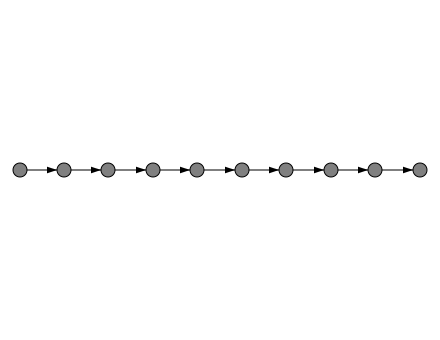

Score: 0
% of visited states: 60.0%

Iteration: 11
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(2, 0): 1.0, (3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.45       0.85       0.8        0.8
  0.8        0.8        0.8        0.8        0.8       ]]
0.533716919048794
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


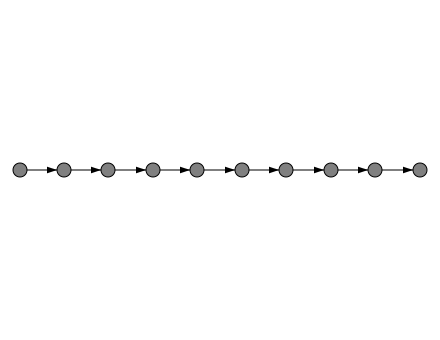

Score: 0
% of visited states: 60.0%

Iteration: 12
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8       ]]
0.2872609987747805
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


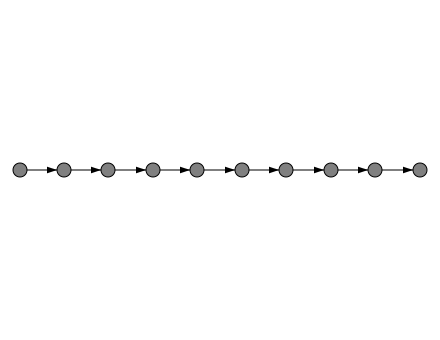

Score: 0
% of visited states: 60.0%

Iteration: 13
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.        ]]
0.25943134447462324
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


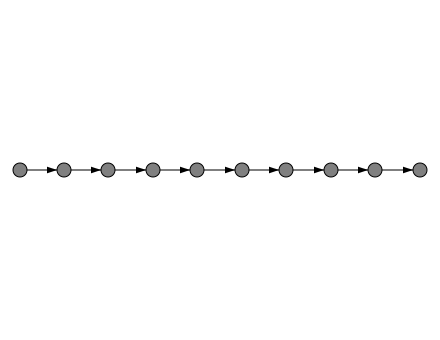

Score: 0
% of visited states: 60.0%

Iteration: 14
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.        ]]
0.2365176700736351
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


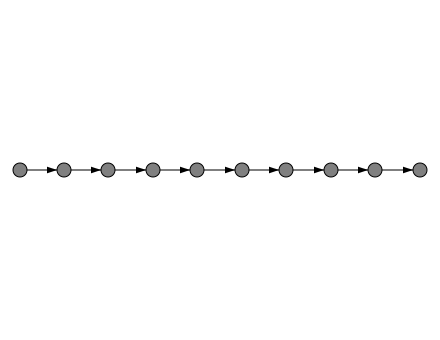

Score: 0
% of visited states: 60.0%

Iteration: 15
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.        ]]
0.21732310838549296
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


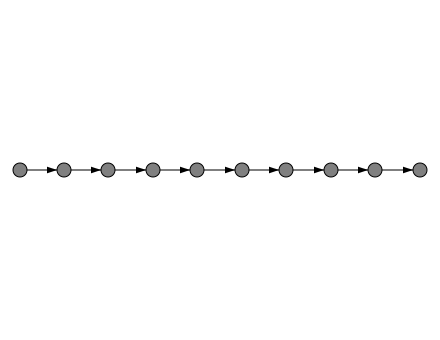

Score: 0
% of visited states: 60.0%

Iteration: 16
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.        ]]
0.20101015463500427
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


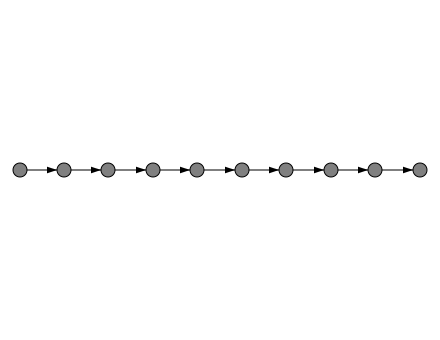

Score: 0
% of visited states: 60.0%

Iteration: 17
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.        ]]
0.18697520931893852
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


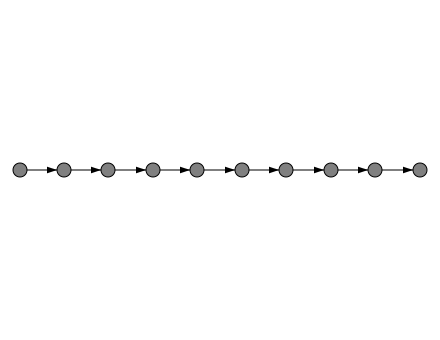

Score: 0
% of visited states: 60.0%

Iteration: 18
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.        ]]
0.17477224892203425
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


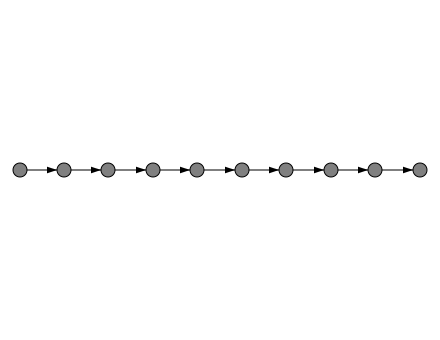

Score: 0
% of visited states: 60.0%

Iteration: 19
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.        ]]
0.16406455522690622
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


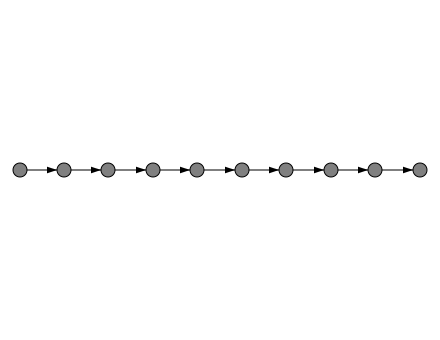

Score: 0
% of visited states: 60.0%

Iteration: 20
(0, 0) probas:  [0.   0.04 0.96]
(0, 1) probas:  [0.   0.03 0.97]
(1, 0) probas:  [0.   0.03 0.97]
(1, 1) probas:  [0.   0.03 0.97]
(2, 0) probas:  [0.   0.02 0.97]
(2, 1) probas:  [0.   0.02 0.98]
(3, 0) probas:  [0.   0.02 0.98]
(3, 1) probas:  [0.   0.02 0.98]
(4, 0) probas:  [0.   0.01 0.98]
(4, 1) probas:  [0.   0.01 0.99]
(5, 0) probas:  [0.   0.01 0.99]
(5, 1) probas:  [0.   0.01 0.99]
(6, 0) probas:  [0.   0.01 0.99]
(6, 1) probas:  [0.   0.01 0.99]
(7, 0) probas:  [0.   0.01 0.99]
(7, 1) probas:  [0.   0.01 0.99]
(8, 0) probas:  [0.   0.01 0.99]
(8, 1) probas:  [0.   0.01 0.99]
(9, 0) probas:  [0. 0. 1.]
(9, 1) probas:  [0. 0. 1.]
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4,

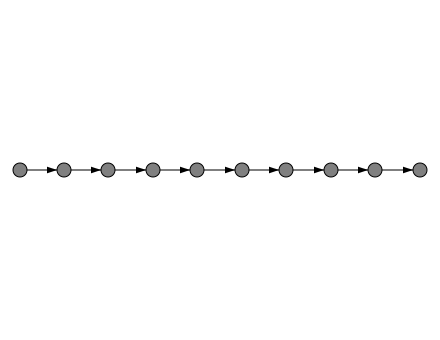

Score: 0
% of visited states: 60.0%

Iteration: 21
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.        ]]
0.14615564886951748
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0.

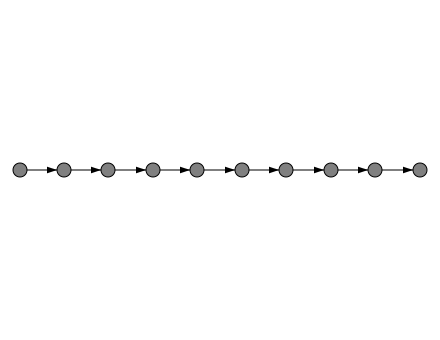

Score: 0
% of visited states: 60.0%

Iteration: 22
[{(0, 0): {(0, 0): 1.0, (1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.15061602 0.15891043 0.46666667 0.75       0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.91666667 0.76666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667]]
0.23068708509303537
[[1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]

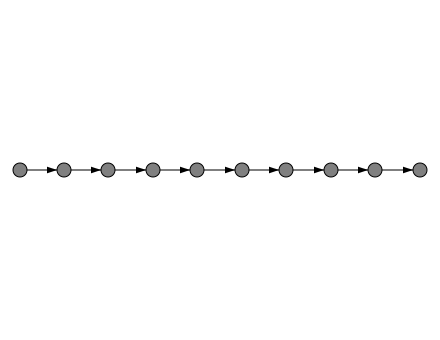

Score: 0
% of visited states: 60.0%

Iteration: 23
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667]]
0.13643182789218544
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0

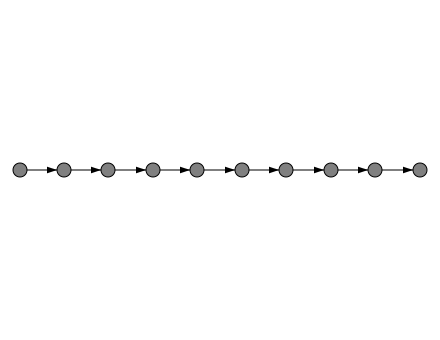

Score: 0
% of visited states: 60.0%

Iteration: 24
[{(0, 0): {(0, 0): 1.0, (1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.15061602 0.15891043 0.46666667 0.75       0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.91666667 0.76666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 1.         0.91666667]]
0.21255848129284205
[[1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0.

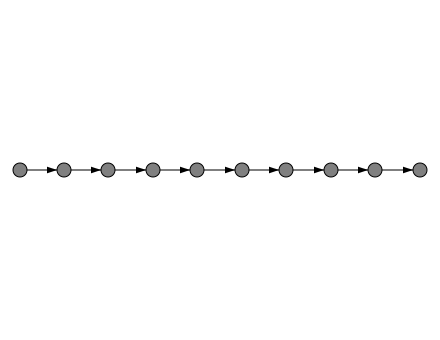

Score: 0
% of visited states: 60.0%

Iteration: 25
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667]]
0.128390421103447
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0.

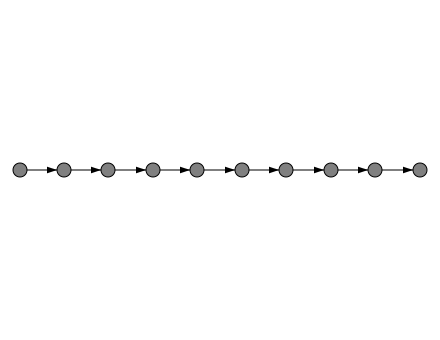

Score: 0
% of visited states: 60.0%

Iteration: 26
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.        ]]
0.12284570445616527
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0

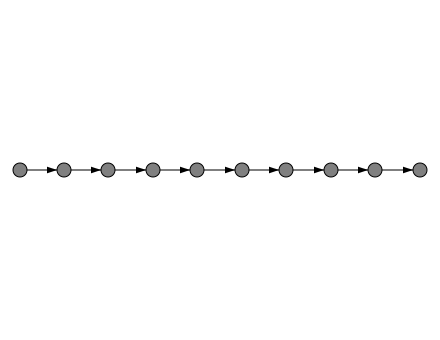

Score: 0
% of visited states: 60.0%

Iteration: 27
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(4, 0): 1.0, (5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.61666667 0.75       0.75
  0.75       0.75       0.75       0.75       0.75       0.65
  0.75       0.75       0.75       0.75       0.75       0.75
  0.75       0.75       0.75       0.75       0.68333333 0.75
  0.68333333 0.75       0.75      ]]
0.46828620085361594
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]

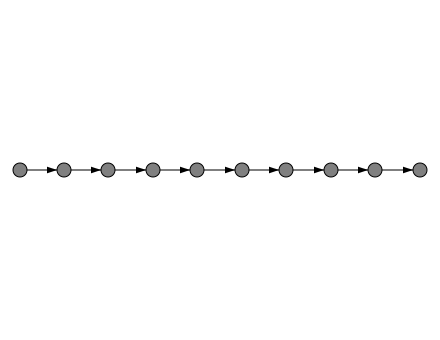

Score: 0
% of visited states: 60.0%

Iteration: 28
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75      ]]
0.12425182296256532
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 

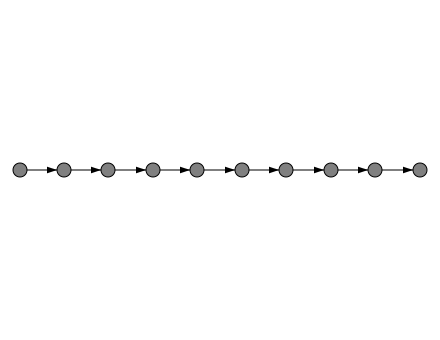

Score: 0
% of visited states: 60.0%

Iteration: 29
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.        ]]
0.11945546495408421
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0

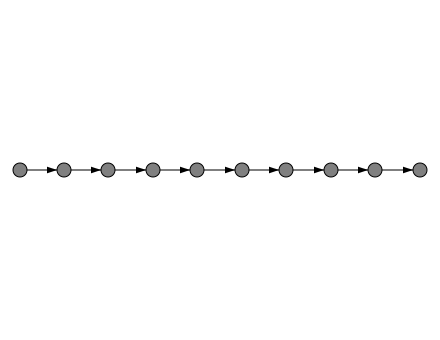

Score: 0
% of visited states: 60.0%

Iteration: 30
(0, 0) probas:  [0.   0.04 0.96]
(0, 1) probas:  [0.   0.03 0.97]
(1, 0) probas:  [0.   0.03 0.97]
(1, 1) probas:  [0.   0.03 0.97]
(2, 0) probas:  [0.   0.02 0.97]
(2, 1) probas:  [0.   0.02 0.98]
(3, 0) probas:  [0.   0.02 0.98]
(3, 1) probas:  [0.   0.02 0.98]
(4, 0) probas:  [0.   0.01 0.98]
(4, 1) probas:  [0.   0.01 0.99]
(5, 0) probas:  [0.   0.01 0.99]
(5, 1) probas:  [0.   0.01 0.99]
(6, 0) probas:  [0.   0.01 0.99]
(6, 1) probas:  [0.   0.01 0.99]
(7, 0) probas:  [0.   0.01 0.99]
(7, 1) probas:  [0.   0.01 0.99]
(8, 0) probas:  [0.   0.01 0.99]
(8, 1) probas:  [0.   0.01 0.99]
(9, 0) probas:  [0. 0. 1.]
(9, 1) probas:  [0. 0. 1.]
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4,

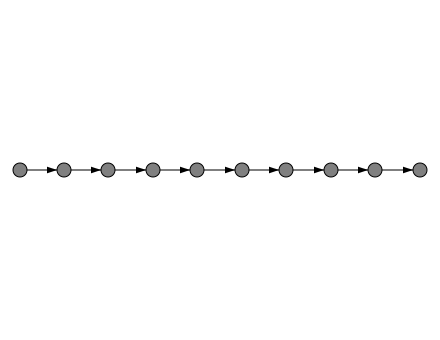

Score: 0
% of visited states: 60.0%

Iteration: 31
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.        ]]
0.11089402224812539
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 

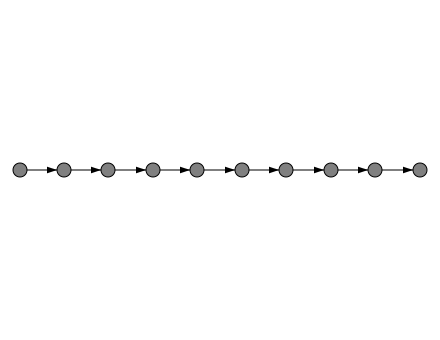

Score: 0
% of visited states: 60.0%

Iteration: 32
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.        ]]
0.10705758261697906
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0

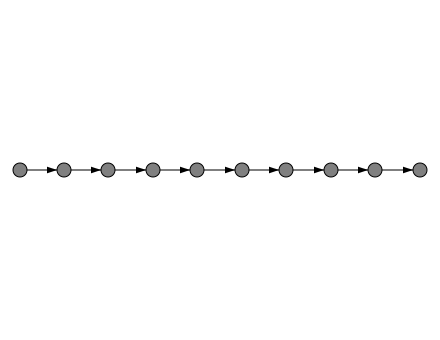

Score: 0
% of visited states: 60.0%

Iteration: 33
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.        ]]
0.10347771423643759
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.

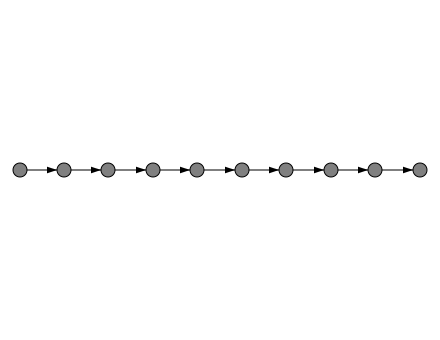

Score: 0
% of visited states: 60.0%

Iteration: 34
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.        ]]
0.10012951167079831
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 

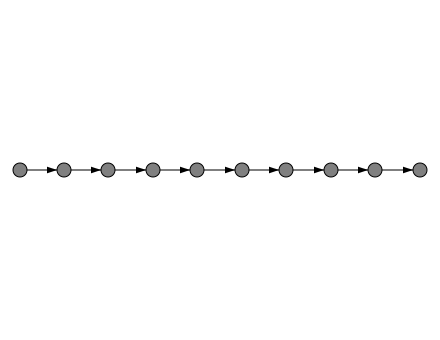

Score: 0
% of visited states: 60.0%

Iteration: 35
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.        ]]
0.0969911918893398
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0.

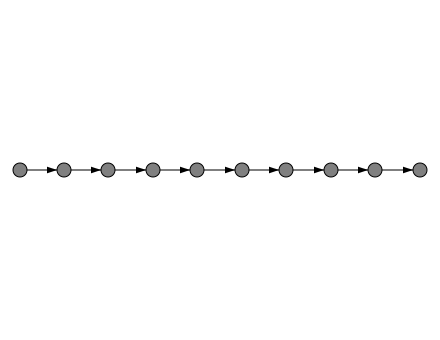

Score: 0
% of visited states: 60.0%

Iteration: 36
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.        ]]
0.09404361981531717
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.

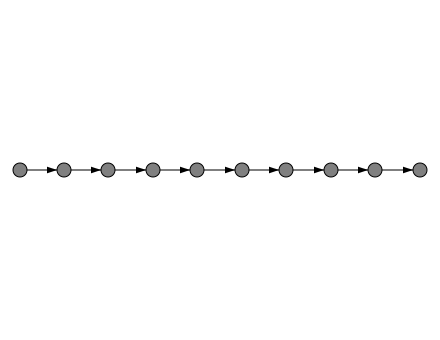

Score: 0
% of visited states: 60.0%

Iteration: 37
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.        ]]
0.09126991783507998
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 

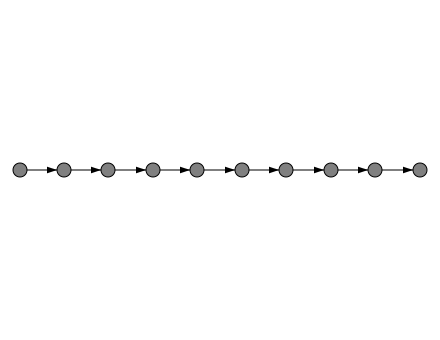

Score: 0
% of visited states: 60.0%

Iteration: 38
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.        ]]
0.08865514242980876
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0

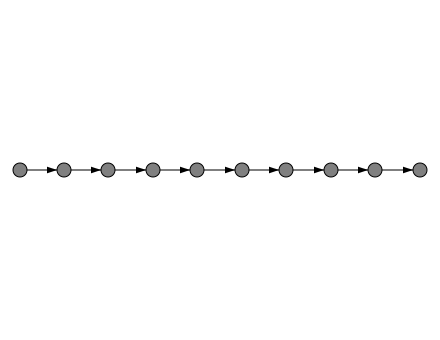

Score: 0
% of visited states: 60.0%

Iteration: 39
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.        ]]
0.08618601484387933
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.

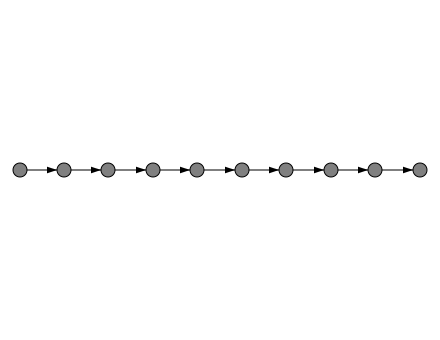

Score: 0
% of visited states: 60.0%

Iteration: 40
(0, 0) probas:  [0.   0.04 0.95]
(0, 1) probas:  [0.   0.03 0.96]
(1, 0) probas:  [0.   0.03 0.96]
(1, 1) probas:  [0.   0.03 0.97]
(2, 0) probas:  [0.   0.03 0.97]
(2, 1) probas:  [0.   0.02 0.98]
(3, 0) probas:  [0.   0.02 0.98]
(3, 1) probas:  [0.   0.02 0.98]
(4, 0) probas:  [0.   0.02 0.98]
(4, 1) probas:  [0.   0.02 0.98]
(5, 0) probas:  [0.   0.01 0.99]
(5, 1) probas:  [0.   0.01 0.99]
(6, 0) probas:  [0.   0.01 0.99]
(6, 1) probas:  [0.   0.01 0.99]
(7, 0) probas:  [0.   0.01 0.99]
(7, 1) probas:  [0.   0.01 0.99]
(8, 0) probas:  [0.   0.01 0.99]
(8, 1) probas:  [0.   0.01 0.99]
(9, 0) probas:  [0.   0.01 0.99]
(9, 1) probas:  [0.   0.01 0.99]
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0):

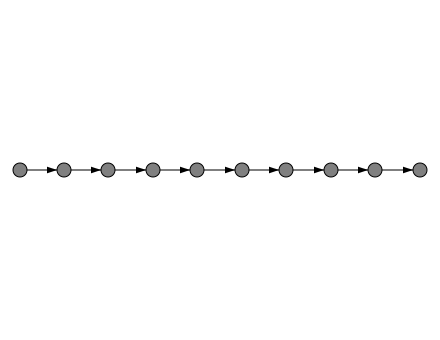

Score: 0
% of visited states: 60.0%

Iteration: 41
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.        ]]
0.08163859435855758
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0

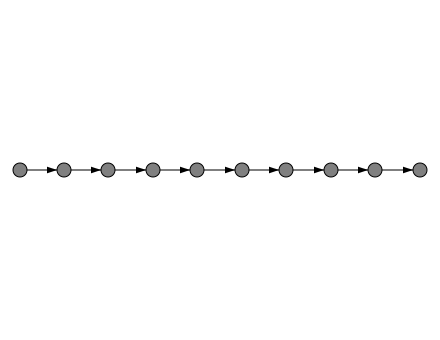

Score: 0
% of visited states: 60.0%

Iteration: 42
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.        ]]
0.07954020994680522
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.

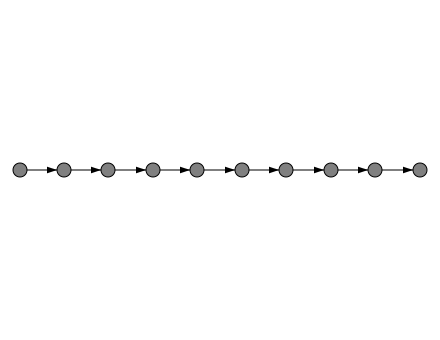

Score: 0
% of visited states: 60.0%

Iteration: 43
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.        ]]
0.07754699334034387
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 

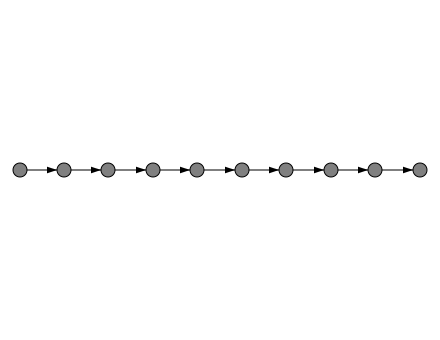

Score: 0
% of visited states: 60.0%

Iteration: 44
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.        ]]
0.07565123154740427
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0

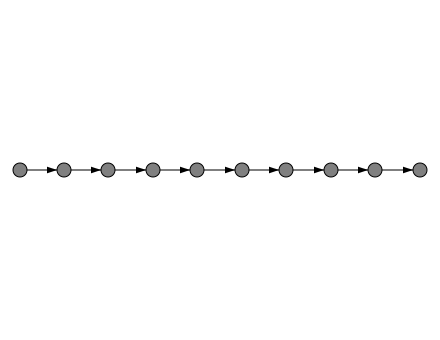

Score: 0
% of visited states: 60.0%

Iteration: 45
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.        ]]
0.07384594780421372
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0.

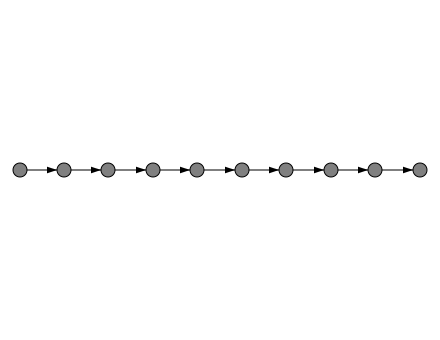

Score: 0
% of visited states: 60.0%

Iteration: 46
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(2, 0): 1.0, (3, 0): 1.0}, (3, 0): {(3, 0): 1.0, (4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.15891043 0.43333333 0.7        0.71666667 0.71666667
  0.71666667 0.71666667 0.71666667 0.71666667 0.71666667 0.76666667
  0.71666667 0.71666667 0.71666667 0.71666667 0.71666667 0.71666667
  0.71666667 0.71666667 0.71666667 0.71666667 0.68333333 0.71666667
  0.68333333 0.71666667 0.71666667 0.63333333 0.71666667 0.71666667
  0.71666667 0.71666667 0.71666667 0.71666667 0.71666667 0.71666667
  0.71666667 0.71666667 0.71666667 0.71666667 0.71666667 0.71666667
  0.71666667 0.71666667 0.71666667 0.71666667]

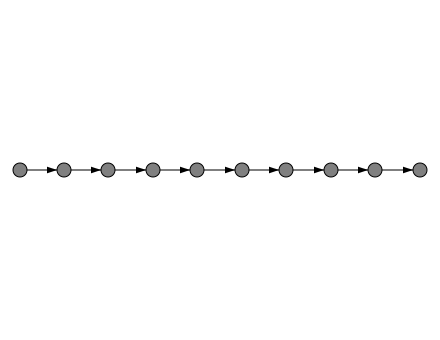

Score: 0
% of visited states: 60.0%

Iteration: 47
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667]]
0.07743505490072766
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0

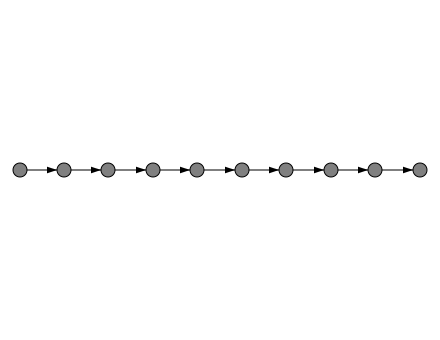

Score: 0
% of visited states: 60.0%

Iteration: 48
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(5, 0): 1.0, (6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.5        0.56666667 0.75       0.75
  0.75       0.75       0.75       0.75       0.75       0.6
  0.75       0.75       0.75       0.75       0.75       0.75
  0.75       0.75       0.75       0.75       0.66666667 0.75
  0.66666667 0.75       0.75       0.66666667 0.75       0.75
  0.75       0.75       0.75       0.75       0.75       0.75
  0.75       0.75       0.75       0.75       0.75       0.75
  0.75       0.75       0.75       0.75       0.56666667 0.75      ]]
0.42199250548044587
[[0. 1. 0. 0

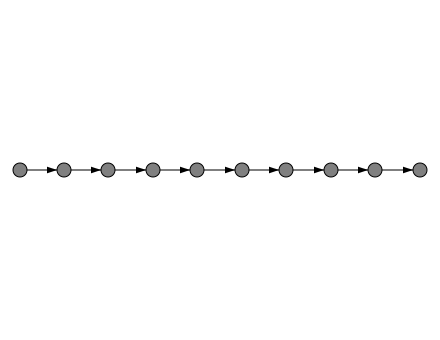

Score: 0
% of visited states: 60.0%

Iteration: 49
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75      ]]
0.079958381050526
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 

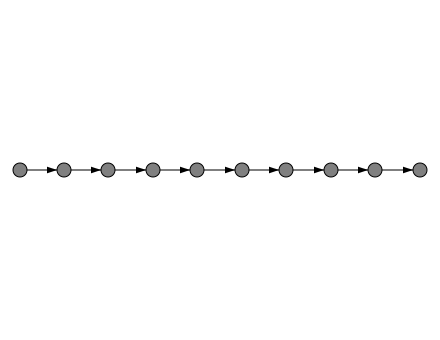

Score: 0
% of visited states: 60.0%

Iteration: 50
(0, 0) probas:  [0.   0.04 0.95]
(0, 1) probas:  [0.   0.04 0.96]
(1, 0) probas:  [0.   0.04 0.96]
(1, 1) probas:  [0.   0.03 0.97]
(2, 0) probas:  [0.   0.03 0.97]
(2, 1) probas:  [0.   0.03 0.97]
(3, 0) probas:  [0.   0.02 0.97]
(3, 1) probas:  [0.   0.02 0.98]
(4, 0) probas:  [0.   0.02 0.98]
(4, 1) probas:  [0.   0.02 0.98]
(5, 0) probas:  [0.   0.02 0.98]
(5, 1) probas:  [0.   0.01 0.99]
(6, 0) probas:  [0.   0.01 0.99]
(6, 1) probas:  [0.   0.01 0.99]
(7, 0) probas:  [0.   0.01 0.99]
(7, 1) probas:  [0.   0.01 0.99]
(8, 0) probas:  [0.   0.01 0.99]
(8, 1) probas:  [0.   0.01 0.99]
(9, 0) probas:  [0.   0.01 0.99]
(9, 1) probas:  [0.   0.01 0.99]
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0):

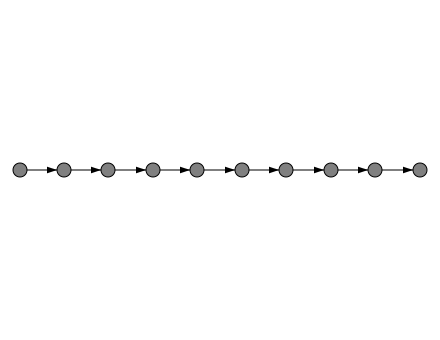

Score: 0
% of visited states: 60.0%

Iteration: 51
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.        ]]
0.07658262404324656
[[0. 1. 0.

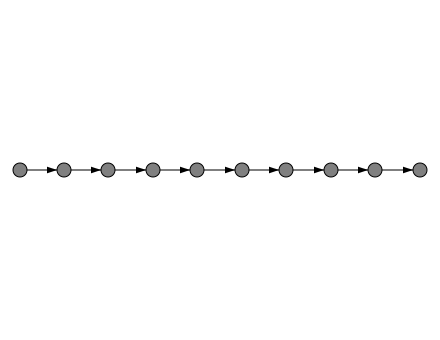

Score: 0
% of visited states: 60.0%

Iteration: 52
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.        ]]
0.07499942641017987

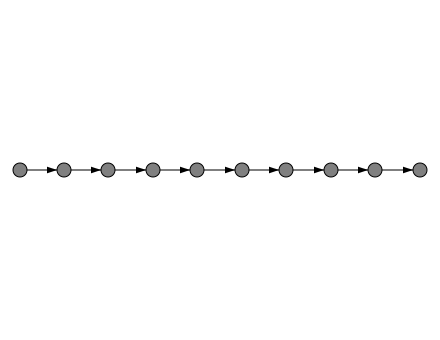

Score: 0
% of visited states: 60.0%

Iteration: 53
[{(0, 0): {(0, 0): 1.0, (1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.15061602 0.15891043 0.46666667 0.75       0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.91666667 0.76666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 1.         0.91666667
  1.         0.91666667 0.91666667 0.68333333 0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.68333333 0.

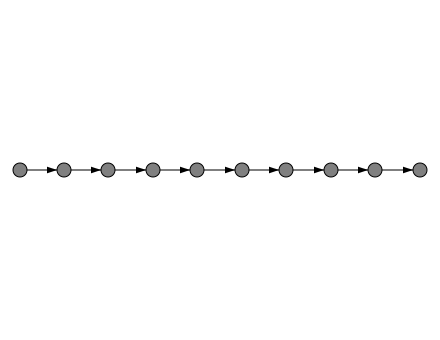

Score: 0
% of visited states: 60.0%

Iteration: 54
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(2, 0): 1.0, (3, 0): 1.0}, (3, 0): {(3, 0): 1.0, (4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.15891043 0.43333333 0.7        0.71666667 0.71666667
  0.71666667 0.71666667 0.71666667 0.71666667 0.71666667 0.76666667
  0.71666667 0.71666667 0.71666667 0.71666667 0.71666667 0.71666667
  0.71666667 0.71666667 0.71666667 0.71666667 0.68333333 0.71666667
  0.68333333 0.71666667 0.71666667 0.63333333 0.71666667 0.71666667
  0.71666667 0.71666667 0.71666667 0.71666667 0.71666667 0.71666667
  0.71666667 0.71666667 0.71666667 0.71666667 0.71666667 0.71666667
  0.71666667 0.71666667 0.71666667 0.71666667 

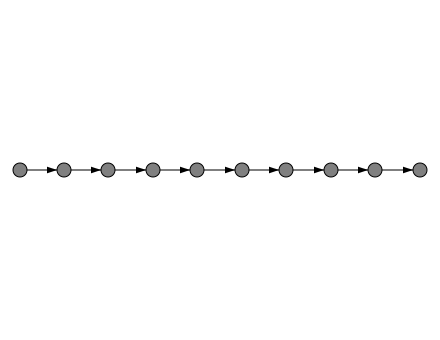

Score: 0
% of visited states: 60.0%

Iteration: 55
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.91666667

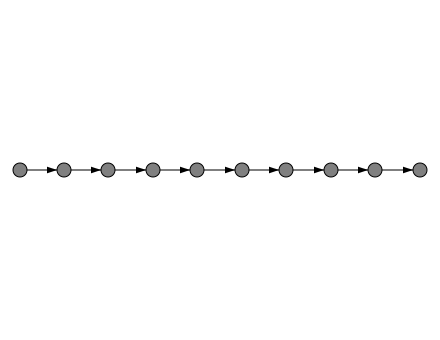

Score: 0
% of visited states: 60.0%

Iteration: 56
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.91666667

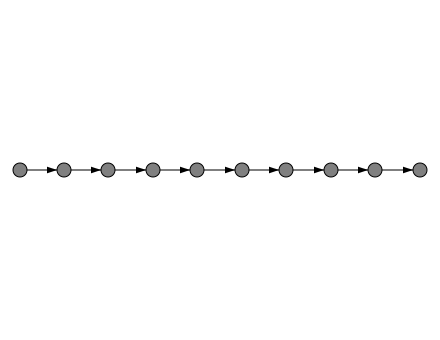

Score: 0
% of visited states: 60.0%

Iteration: 57
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.91666667

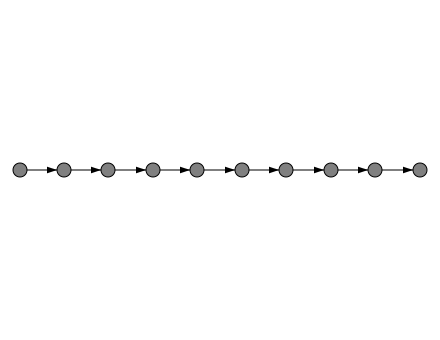

Score: 0
% of visited states: 60.0%

Iteration: 58
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.91666667

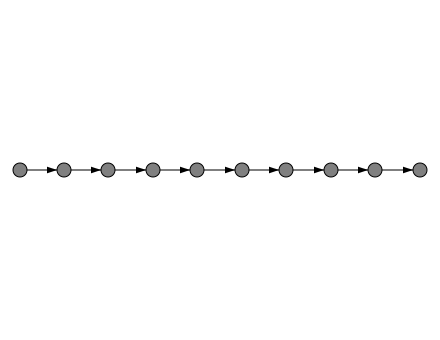

Score: 0
% of visited states: 60.0%

Iteration: 59
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.91666667

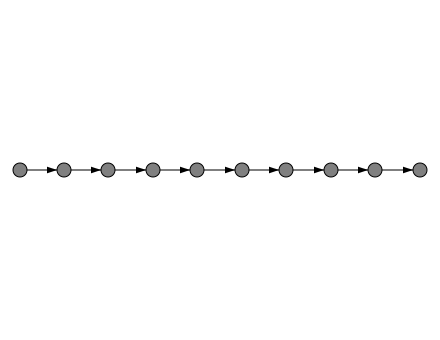

Score: 0
% of visited states: 60.0%

Iteration: 60
(0, 0) probas:  [0.   0.04 0.95]
(0, 1) probas:  [0.   0.04 0.96]
(1, 0) probas:  [0.   0.04 0.96]
(1, 1) probas:  [0.   0.03 0.97]
(2, 0) probas:  [0.   0.03 0.97]
(2, 1) probas:  [0.   0.02 0.97]
(3, 0) probas:  [0.   0.02 0.98]
(3, 1) probas:  [0.   0.02 0.98]
(4, 0) probas:  [0.   0.02 0.98]
(4, 1) probas:  [0.   0.02 0.98]
(5, 0) probas:  [0.   0.01 0.98]
(5, 1) probas:  [0.   0.01 0.99]
(6, 0) probas:  [0.   0.01 0.99]
(6, 1) probas:  [0.   0.01 0.99]
(7, 0) probas:  [0.   0.01 0.99]
(7, 1) probas:  [0.   0.01 0.99]
(8, 0) probas:  [0.   0.01 0.99]
(8, 1) probas:  [0.   0.01 0.99]
(9, 0) probas:  [0.   0.01 0.99]
(9, 1) probas:  [0.   0.01 0.99]
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0):

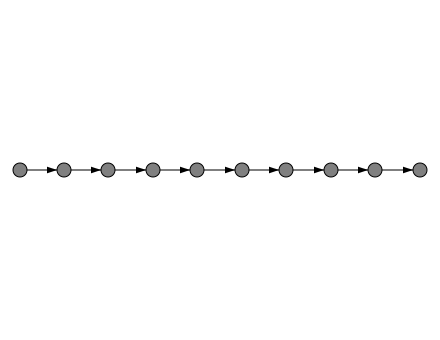

Score: 0
% of visited states: 60.0%

Iteration: 61
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(3, 0): 1.0, (4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.15891043 0.45       0.68333333 0.76666667 0.76666667
  0.76666667 0.76666667 0.76666667 0.76666667 0.76666667 0.71666667
  0.76666667 0.76666667 0.76666667 0.76666667 0.76666667 0.76666667
  0.76666667 0.76666667 0.76666667 0.76666667 0.71666667 0.76666667
  0.71666667 0.76666667 0.76666667 0.68333333 0.76666667 0.76666667
  0.76666667 0.76666667 0.76666667 0.76666667 0.76666667 0.76666667
  0.76666667 0.76666667 0.76666667 0.76666667 0.76666667 0.76666667
  0.76666667 0.76666667 0.76666667 0.76666667 0.8        0.

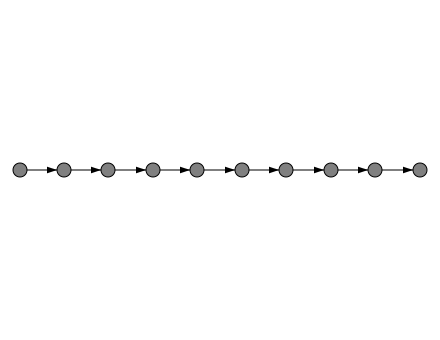

Score: 0
% of visited states: 60.0%

Iteration: 62
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.91666667

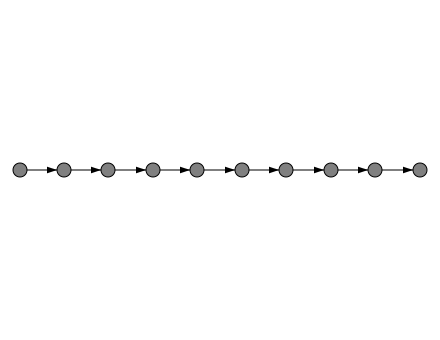

Score: 0
% of visited states: 60.0%

Iteration: 63
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.91666667

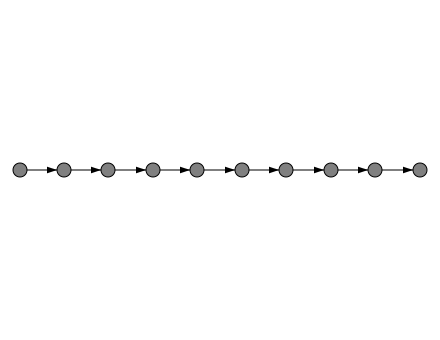

Score: 0
% of visited states: 60.0%

Iteration: 64
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.91666667

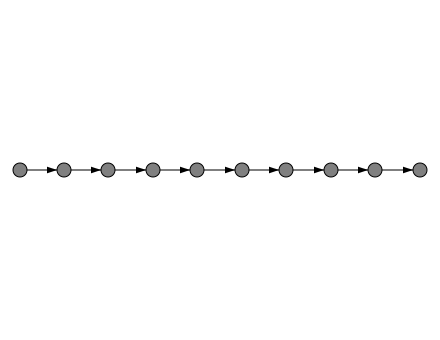

Score: 0
% of visited states: 60.0%

Iteration: 65
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.91666667

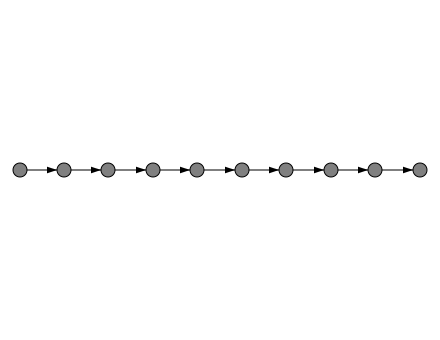

Score: 0
% of visited states: 60.0%

Iteration: 66
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.91666667

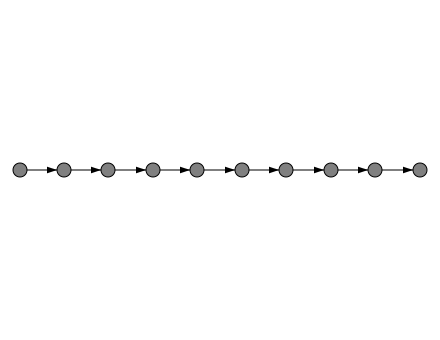

Score: 0
% of visited states: 60.0%

Iteration: 67
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.91666667

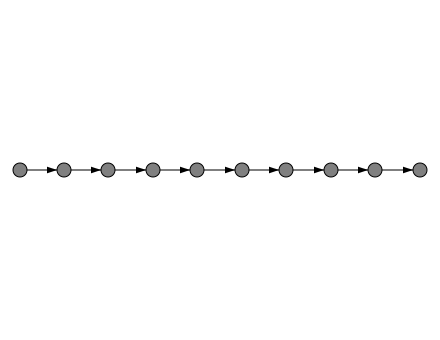

Score: 0
% of visited states: 60.0%

Iteration: 68
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(1, 0): 1.0, (2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.58333333 0.8        0.85       0.85
  0.85       0.85       0.85       0.85       0.85       0.76666667
  0.85       0.85       0.85       0.85       0.85       0.85
  0.85       0.85       0.85       0.85       0.83333333 0.85
  0.83333333 0.85       0.85       0.65       0.85       0.85
  0.85       0.85       0.85       0.85       0.85       0.85
  0.85       0.85       0.85       0.85       0.85       0.85
  0.85       0.85       0.85       0.85       0.68333333 0.85
  0.61666667 0.85       0.85     

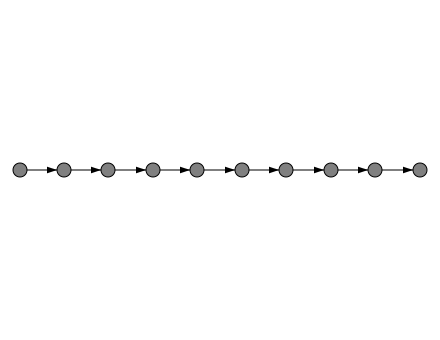

Score: 0
% of visited states: 60.0%

Iteration: 69
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.91666667

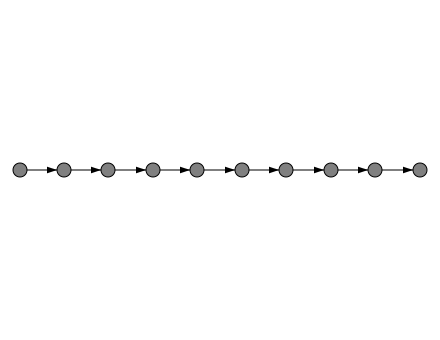

Score: 0
% of visited states: 60.0%

Iteration: 70
(0, 0) probas:  [0.   0.04 0.95]
(0, 1) probas:  [0.   0.04 0.96]
(1, 0) probas:  [0.   0.04 0.96]
(1, 1) probas:  [0.   0.03 0.97]
(2, 0) probas:  [0.   0.03 0.97]
(2, 1) probas:  [0.   0.03 0.97]
(3, 0) probas:  [0.   0.02 0.97]
(3, 1) probas:  [0.   0.02 0.98]
(4, 0) probas:  [0.   0.02 0.98]
(4, 1) probas:  [0.   0.02 0.98]
(5, 0) probas:  [0.   0.02 0.98]
(5, 1) probas:  [0.   0.01 0.99]
(6, 0) probas:  [0.   0.01 0.99]
(6, 1) probas:  [0.   0.01 0.99]
(7, 0) probas:  [0.   0.01 0.99]
(7, 1) probas:  [0.   0.01 0.99]
(8, 0) probas:  [0.   0.01 0.99]
(8, 1) probas:  [0.   0.01 0.99]
(9, 0) probas:  [0.   0.01 0.99]
(9, 1) probas:  [0.   0.01 0.99]
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(6, 0): 1.0, (7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2

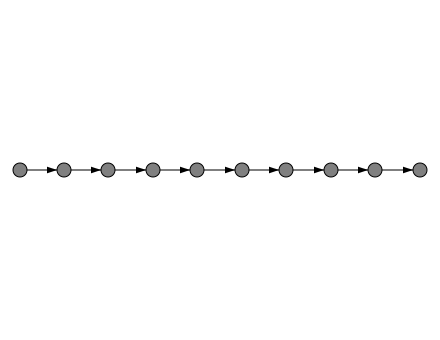

Score: 0
% of visited states: 60.0%

Iteration: 71
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.91666667

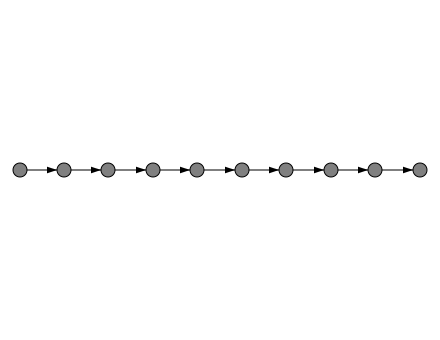

Score: 0
% of visited states: 60.0%

Iteration: 72
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.91666667

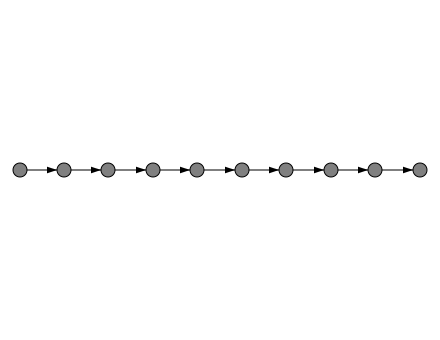

Score: 0
% of visited states: 60.0%

Iteration: 73
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.91666667

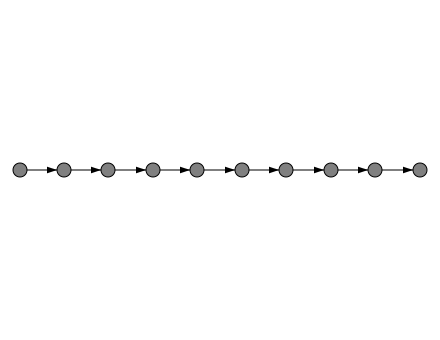

Score: 0
% of visited states: 60.0%

Iteration: 74
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(4, 0): 1.0, (5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.61666667 0.75       0.75
  0.75       0.75       0.75       0.75       0.75       0.65
  0.75       0.75       0.75       0.75       0.75       0.75
  0.75       0.75       0.75       0.75       0.68333333 0.75
  0.68333333 0.75       0.75       1.         0.75       0.75
  0.75       0.75       0.75       0.75       0.75       0.75
  0.75       0.75       0.75       0.75       0.75       0.75
  0.75       0.75       0.75       0.75       0.63333333 0.75
  0.66666667 0.75       0.75       0.75

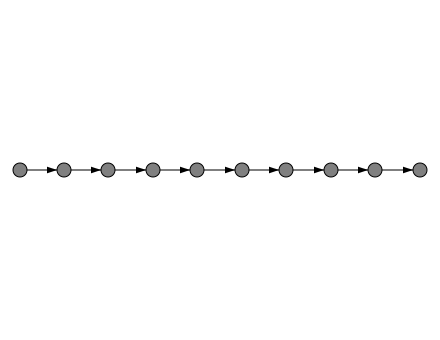

Score: 0
% of visited states: 60.0%

Iteration: 75
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.91666667

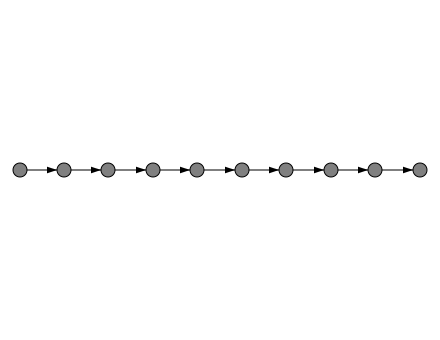

Score: 0
% of visited states: 60.0%

Iteration: 76
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(5, 0): 1.0, (6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.5        0.56666667 0.75       0.75
  0.75       0.75       0.75       0.75       0.75       0.6
  0.75       0.75       0.75       0.75       0.75       0.75
  0.75       0.75       0.75       0.75       0.66666667 0.75
  0.66666667 0.75       0.75       0.66666667 0.75       0.75
  0.75       0.75       0.75       0.75       0.75       0.75
  0.75       0.75       0.75       0.75       0.75       0.75
  0.75       0.75       0.75       0.75       0.56666667 0.75
  1.         0.75       0.75       0.75 

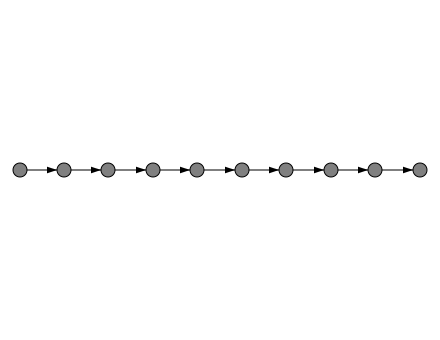

Score: 0
% of visited states: 60.0%

Iteration: 77
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.91666667

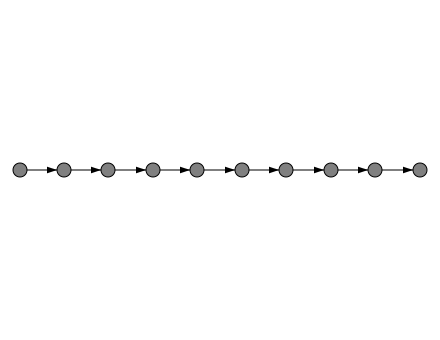

Score: 0
% of visited states: 60.0%

Iteration: 78
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(3, 0): 1.0, (4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.15891043 0.45       0.68333333 0.76666667 0.76666667
  0.76666667 0.76666667 0.76666667 0.76666667 0.76666667 0.71666667
  0.76666667 0.76666667 0.76666667 0.76666667 0.76666667 0.76666667
  0.76666667 0.76666667 0.76666667 0.76666667 0.71666667 0.76666667
  0.71666667 0.76666667 0.76666667 0.68333333 0.76666667 0.76666667
  0.76666667 0.76666667 0.76666667 0.76666667 0.76666667 0.76666667
  0.76666667 0.76666667 0.76666667 0.76666667 0.76666667 0.76666667
  0.76666667 0.76666667 0.76666667 0.76666667 0.8        0.

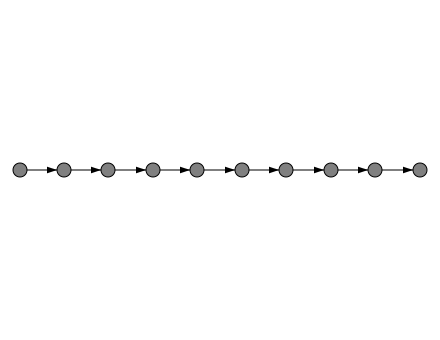

Score: 0
% of visited states: 60.0%

Iteration: 79
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.91666667

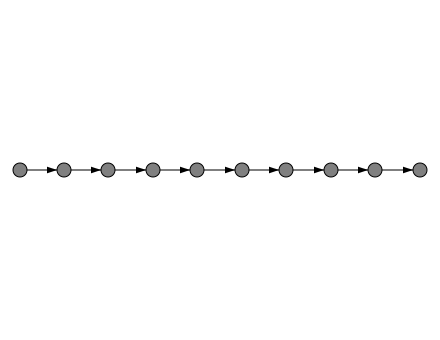

Score: 0
% of visited states: 60.0%

Iteration: 80
(0, 0) probas:  [0.01 0.05 0.95]
(0, 1) probas:  [0.   0.04 0.96]
(1, 0) probas:  [0.   0.04 0.96]
(1, 1) probas:  [0.   0.03 0.96]
(2, 0) probas:  [0.   0.03 0.97]
(2, 1) probas:  [0.   0.03 0.97]
(3, 0) probas:  [0.   0.03 0.97]
(3, 1) probas:  [0.   0.02 0.98]
(4, 0) probas:  [0.   0.02 0.98]
(4, 1) probas:  [0.   0.02 0.98]
(5, 0) probas:  [0.   0.02 0.98]
(5, 1) probas:  [0.   0.02 0.98]
(6, 0) probas:  [0.   0.01 0.99]
(6, 1) probas:  [0.   0.01 0.99]
(7, 0) probas:  [0.   0.01 0.99]
(7, 1) probas:  [0.   0.01 0.99]
(8, 0) probas:  [0.   0.01 0.99]
(8, 1) probas:  [0.   0.01 0.99]
(9, 0) probas:  [0.   0.01 0.99]
(9, 1) probas:  [0.   0.01 0.99]
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0):

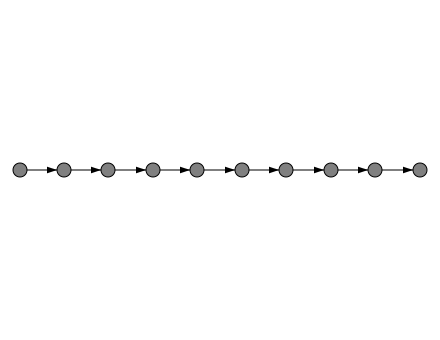

Score: 0
% of visited states: 60.0%

Iteration: 81
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.91666667

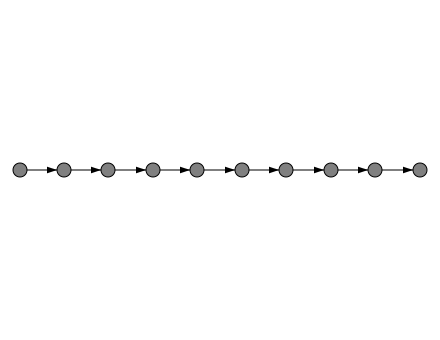

Score: 0
% of visited states: 60.0%

Iteration: 82
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.91666667

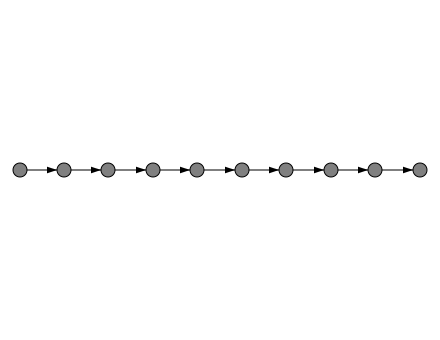

Score: 0
% of visited states: 60.0%

Iteration: 83
[{(0, 0): {(0, 0): 1.0, (1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.15061602 0.15891043 0.46666667 0.75       0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.91666667 0.76666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 1.         0.91666667
  1.         0.91666667 0.91666667 0.68333333 0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.68333333 0.

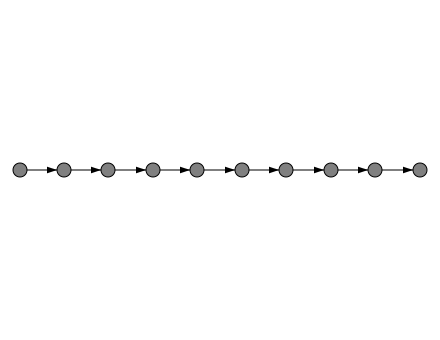

Score: 0
% of visited states: 60.0%

Iteration: 84
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.91666667

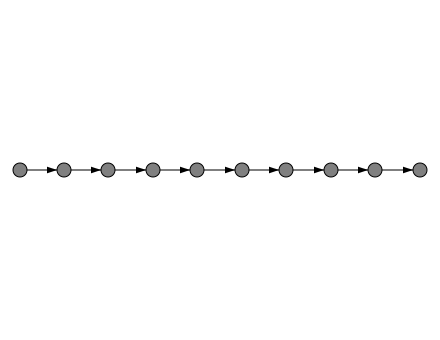

Score: 0
% of visited states: 60.0%

Iteration: 85
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(1, 0): 1.0, (2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.58333333 0.8        0.85       0.85
  0.85       0.85       0.85       0.85       0.85       0.76666667
  0.85       0.85       0.85       0.85       0.85       0.85
  0.85       0.85       0.85       0.85       0.83333333 0.85
  0.83333333 0.85       0.85       0.65       0.85       0.85
  0.85       0.85       0.85       0.85       0.85       0.85
  0.85       0.85       0.85       0.85       0.85       0.85
  0.85       0.85       0.85       0.85       0.68333333 0.85
  0.61666667 0.85       0.85     

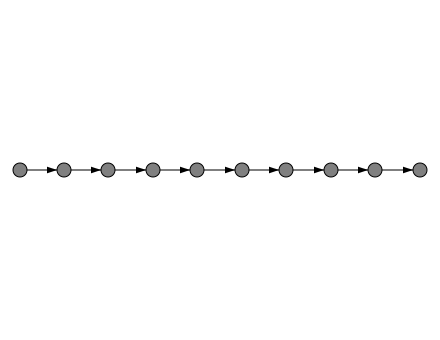

Score: 0
% of visited states: 60.0%

Iteration: 86
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.91666667

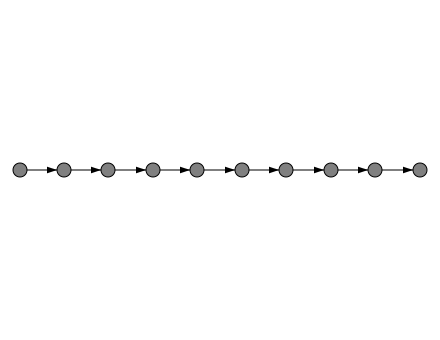

Score: 0
% of visited states: 60.0%

Iteration: 87
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(3, 0): 1.0, (4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.15891043 0.45       0.68333333 0.76666667 0.76666667
  0.76666667 0.76666667 0.76666667 0.76666667 0.76666667 0.71666667
  0.76666667 0.76666667 0.76666667 0.76666667 0.76666667 0.76666667
  0.76666667 0.76666667 0.76666667 0.76666667 0.71666667 0.76666667
  0.71666667 0.76666667 0.76666667 0.68333333 0.76666667 0.76666667
  0.76666667 0.76666667 0.76666667 0.76666667 0.76666667 0.76666667
  0.76666667 0.76666667 0.76666667 0.76666667 0.76666667 0.76666667
  0.76666667 0.76666667 0.76666667 0.76666667 0.8        0.

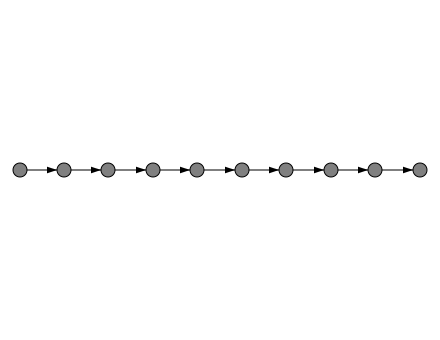

Score: 0
% of visited states: 60.0%

Iteration: 88
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.91666667

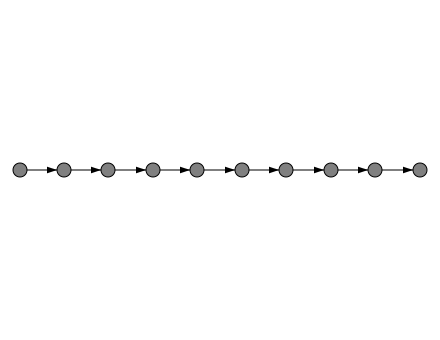

Score: 0
% of visited states: 60.0%

Iteration: 89
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.91666667

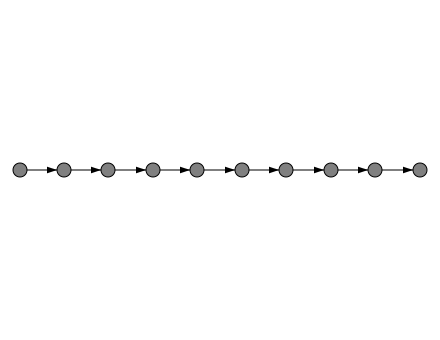

Score: 0
% of visited states: 60.0%

Iteration: 90
(0, 0) probas:  [0.   0.05 0.95]
(0, 1) probas:  [0.   0.04 0.96]
(1, 0) probas:  [0.   0.04 0.96]
(1, 1) probas:  [0.   0.03 0.96]
(2, 0) probas:  [0.   0.03 0.97]
(2, 1) probas:  [0.   0.03 0.97]
(3, 0) probas:  [0.   0.03 0.97]
(3, 1) probas:  [0.   0.02 0.98]
(4, 0) probas:  [0.   0.02 0.98]
(4, 1) probas:  [0.   0.02 0.98]
(5, 0) probas:  [0.   0.02 0.98]
(5, 1) probas:  [0.   0.01 0.98]
(6, 0) probas:  [0.   0.01 0.99]
(6, 1) probas:  [0.   0.01 0.99]
(7, 0) probas:  [0.   0.01 0.99]
(7, 1) probas:  [0.   0.01 0.99]
(8, 0) probas:  [0.   0.01 0.99]
(8, 1) probas:  [0.   0.01 0.99]
(9, 0) probas:  [0.   0.01 0.99]
(9, 1) probas:  [0.   0.01 0.99]
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0):

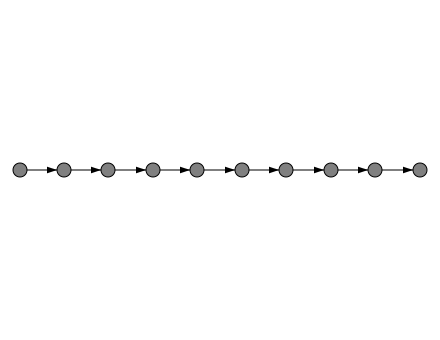

Score: 0
% of visited states: 60.0%

Iteration: 91
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.91666667

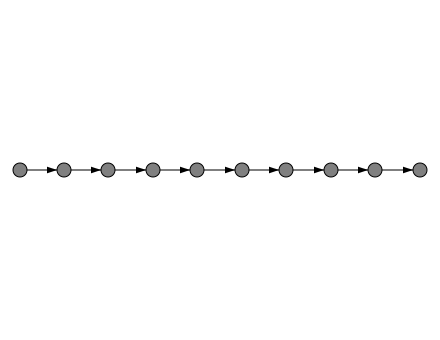

Score: 0
% of visited states: 60.0%

Iteration: 92
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.91666667

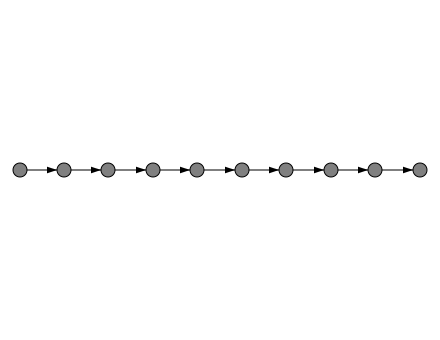

Score: 0
% of visited states: 60.0%

Iteration: 93
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.91666667

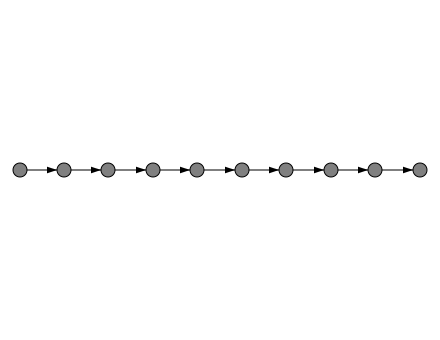

Score: 0
% of visited states: 60.0%

Iteration: 94
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.91666667

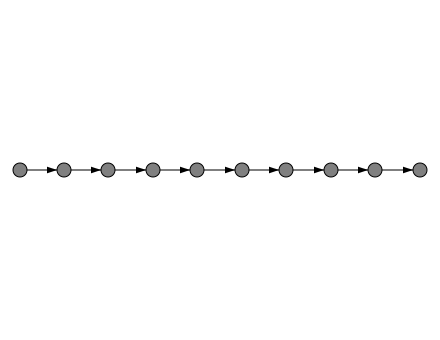

Score: 0
% of visited states: 60.0%

Iteration: 95
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.91666667

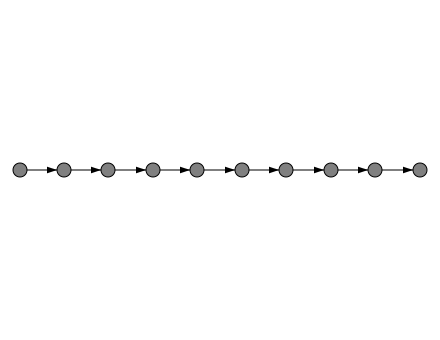

Score: 0
% of visited states: 60.0%

Iteration: 96
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.91666667

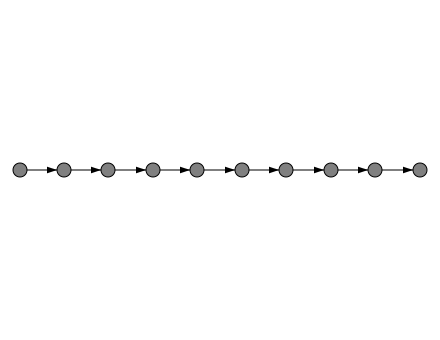

Score: 0
% of visited states: 60.0%

Iteration: 97
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.91666667

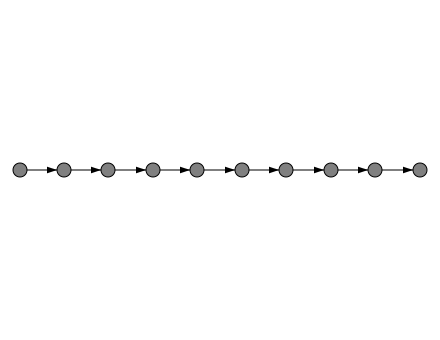

Score: 0
% of visited states: 60.0%

Iteration: 98
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.91666667

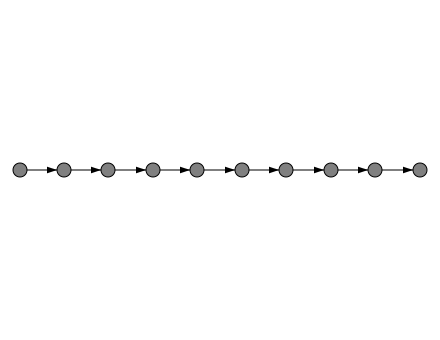

Score: 0
% of visited states: 60.0%

Iteration: 99
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.91666667

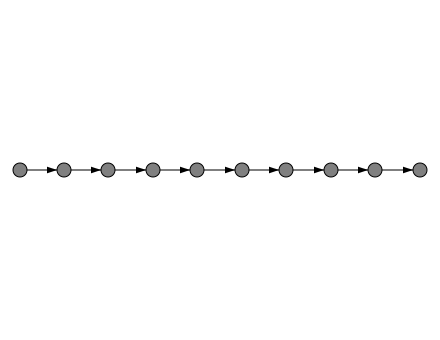

Score: 0
% of visited states: 60.0%

Iteration: 100
(0, 0) probas:  [0.01 0.05 0.95]
(0, 1) probas:  [0.   0.04 0.96]
(1, 0) probas:  [0.   0.04 0.96]
(1, 1) probas:  [0.   0.03 0.96]
(2, 0) probas:  [0.   0.03 0.97]
(2, 1) probas:  [0.   0.03 0.97]
(3, 0) probas:  [0.   0.03 0.97]
(3, 1) probas:  [0.   0.02 0.98]
(4, 0) probas:  [0.   0.02 0.98]
(4, 1) probas:  [0.   0.02 0.98]
(5, 0) probas:  [0.   0.02 0.98]
(5, 1) probas:  [0.   0.01 0.98]
(6, 0) probas:  [0.   0.01 0.99]
(6, 1) probas:  [0.   0.01 0.99]
(7, 0) probas:  [0.   0.01 0.99]
(7, 1) probas:  [0.   0.01 0.99]
(8, 0) probas:  [0.   0.01 0.99]
(8, 1) probas:  [0.   0.01 0.99]
(9, 0) probas:  [0.   0.01 0.99]
(9, 1) probas:  [0.   0.01 0.99]
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(3, 0): 1.0, (4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (

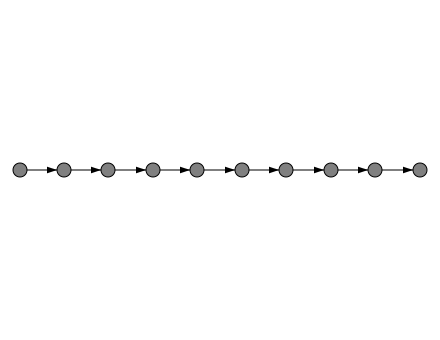

Score: 0
% of visited states: 60.0%

Iteration: 101
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

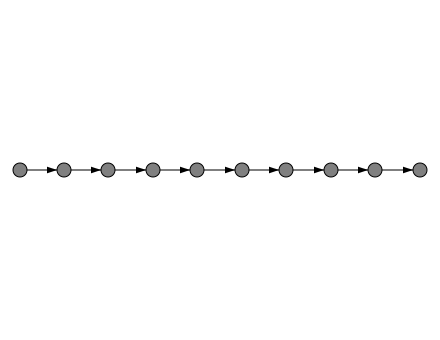

Score: 0
% of visited states: 60.0%

Iteration: 102
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

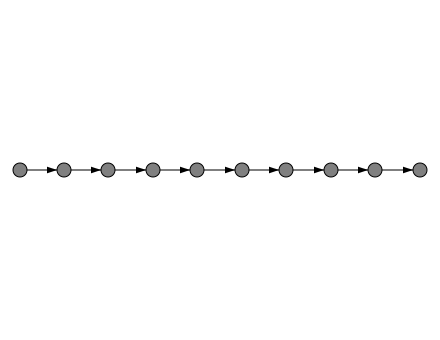

Score: 0
% of visited states: 60.0%

Iteration: 103
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

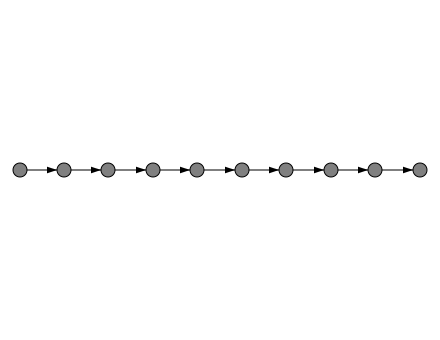

Score: 0
% of visited states: 60.0%

Iteration: 104
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

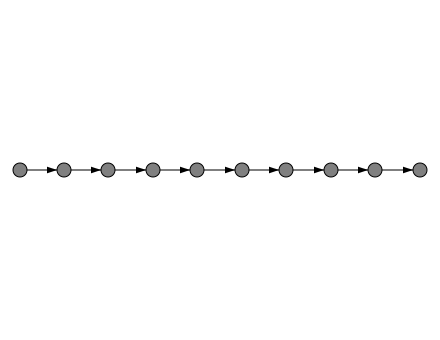

Score: 0
% of visited states: 60.0%

Iteration: 105
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(2, 0): 1.0, (3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0, (8, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.25       0.6        0.55       0.55
  0.55       0.55       0.55       0.55       0.55       0.75
  0.55       0.55       0.55       0.55       0.55       0.55
  0.55       0.55       0.55       0.55       0.51666667 0.55
  0.51666667 0.55       0.55       0.4        0.55       0.55
  0.55       0.55       0.55       0.55       0.55       0.55
  0.55       0.55       0.55       0.55       0.55       0.55
  0.55       0.55       0.55       0.55       0.51666667 0.55
  0.36666667 0.55       0

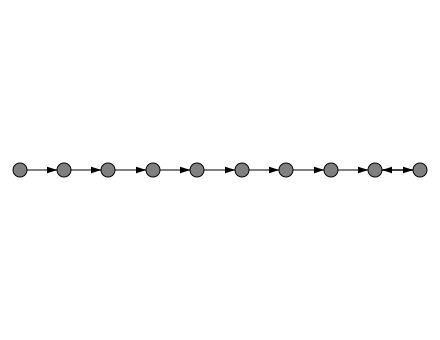

Score: 0
% of visited states: 60.0%

Iteration: 106
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

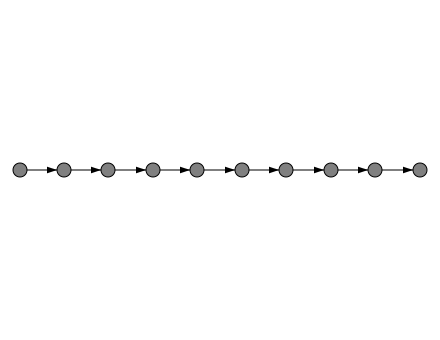

Score: 0
% of visited states: 60.0%

Iteration: 107
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(2, 0): 1.0, (3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.45       0.85       0.8        0.8
  0.8        0.8        0.8        0.8        0.8        1.
  0.8        0.8        0.8        0.8        0.8        0.8
  0.8        0.8        0.8        0.8        0.76666667 0.8
  0.76666667 0.8        0.8        0.65       0.8        0.8
  0.8        0.8        0.8        0.8        0.8        0.8
  0.8        0.8        0.8        0.8        0.8        0.8
  0.8        0.8        0.8        0.8        0.76666667 0.8
  0.6        0.8        0.8        0.8        0

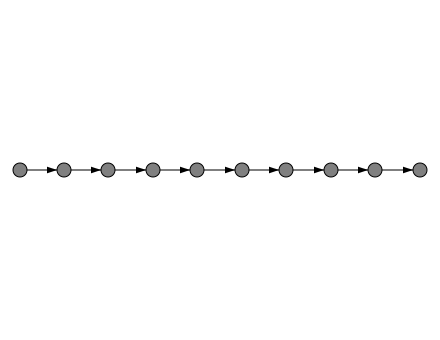

Score: 0
% of visited states: 60.0%

Iteration: 108
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

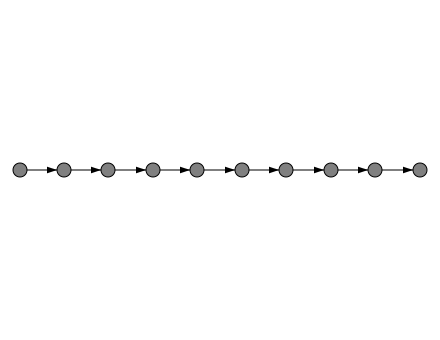

Score: 0
% of visited states: 60.0%

Iteration: 109
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

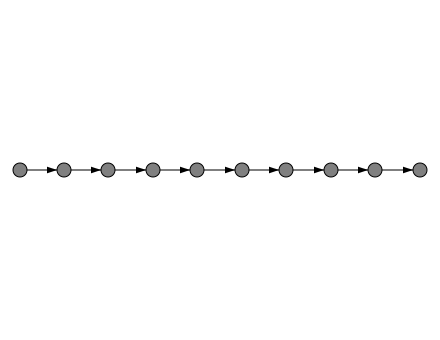

Score: 0
% of visited states: 60.0%

Iteration: 110
(0, 0) probas:  [0.01 0.06 0.94]
(0, 1) probas:  [0.   0.05 0.95]
(1, 0) probas:  [0.   0.05 0.95]
(1, 1) probas:  [0.   0.04 0.96]
(2, 0) probas:  [0.   0.04 0.96]
(2, 1) probas:  [0.   0.03 0.96]
(3, 0) probas:  [0.   0.03 0.96]
(3, 1) probas:  [0.   0.03 0.97]
(4, 0) probas:  [0.   0.03 0.97]
(4, 1) probas:  [0.   0.02 0.97]
(5, 0) probas:  [0.   0.02 0.98]
(5, 1) probas:  [0.   0.02 0.98]
(6, 0) probas:  [0.   0.02 0.98]
(6, 1) probas:  [0.   0.02 0.98]
(7, 0) probas:  [0.   0.01 0.98]
(7, 1) probas:  [0.   0.01 0.99]
(8, 0) probas:  [0.   0.01 0.99]
(8, 1) probas:  [0.   0.01 0.99]
(9, 0) probas:  [0.   0.01 0.99]
(9, 1) probas:  [0.   0.01 0.99]
[{(0, 0): {(0, 0): 1.0, (1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(5, 0): 1.0, (6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 

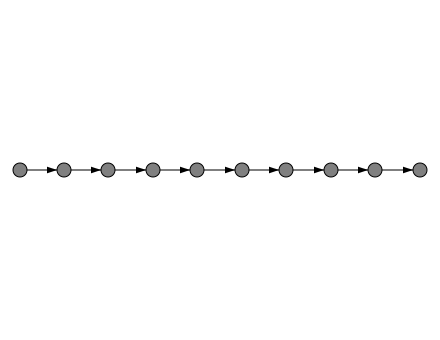

Score: 0
% of visited states: 60.0%

Iteration: 111
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

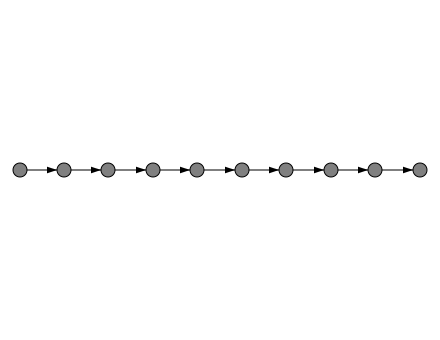

Score: 0
% of visited states: 60.0%

Iteration: 112
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(3, 0): 1.0, (4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0, (8, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.15891043 0.25       0.43333333 0.51666667 0.51666667
  0.51666667 0.51666667 0.51666667 0.51666667 0.51666667 0.46666667
  0.51666667 0.51666667 0.51666667 0.51666667 0.51666667 0.51666667
  0.51666667 0.51666667 0.51666667 0.51666667 0.46666667 0.51666667
  0.46666667 0.51666667 0.51666667 0.43333333 0.51666667 0.51666667
  0.51666667 0.51666667 0.51666667 0.51666667 0.51666667 0.51666667
  0.51666667 0.51666667 0.51666667 0.51666667 0.51666667 0.51666667
  0.51666667 0.51666667 0.51666667 0.51666667

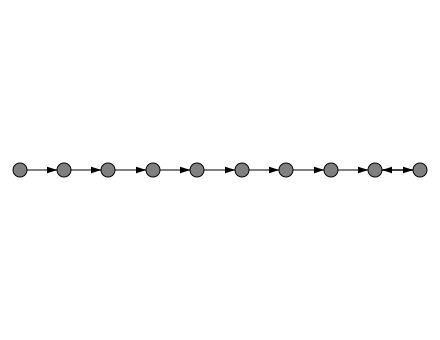

Score: 0
% of visited states: 60.0%

Iteration: 113
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

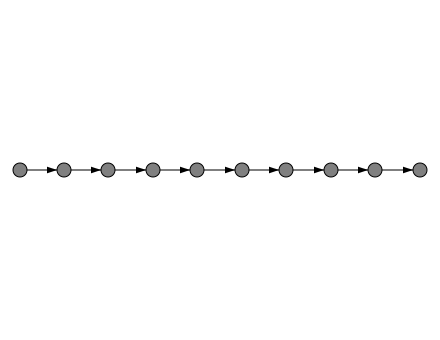

Score: 0
% of visited states: 60.0%

Iteration: 114
[{(0, 0): {(0, 0): 1.0, (1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.15061602 0.15891043 0.46666667 0.75       0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.91666667 0.76666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 1.         0.91666667
  1.         0.91666667 0.91666667 0.68333333 0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.68333333 0

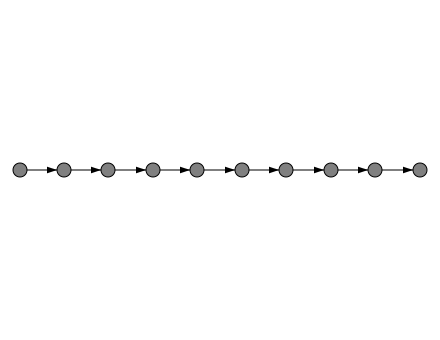

Score: 0
% of visited states: 60.0%

Iteration: 115
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

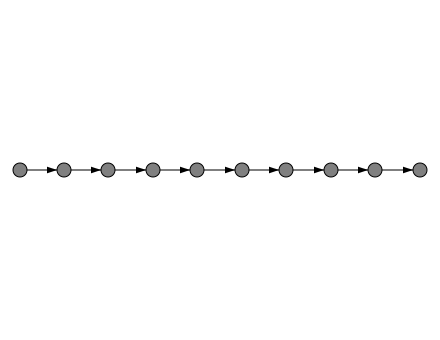

Score: 0
% of visited states: 60.0%

Iteration: 116
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

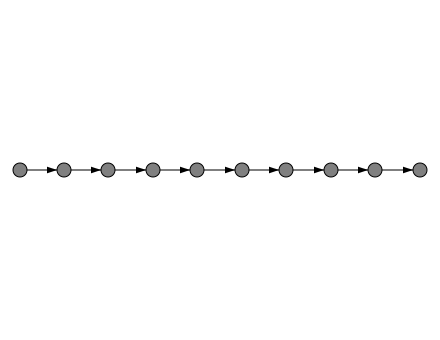

Score: 0
% of visited states: 60.0%

Iteration: 117
[{(0, 0): {(0, 0): 1.0, (1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.15061602 0.15891043 0.46666667 0.75       0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.91666667 0.76666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 1.         0.91666667
  1.         0.91666667 0.91666667 0.68333333 0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.68333333 0

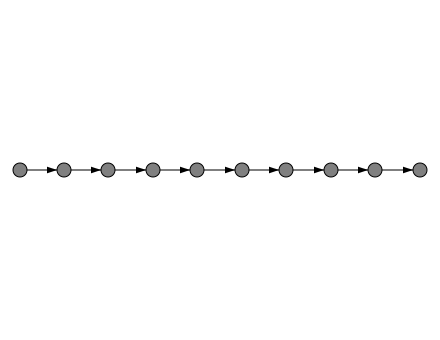

Score: 0
% of visited states: 60.0%

Iteration: 118
[{(0, 0): {(0, 0): 1.0, (1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.15061602 0.15891043 0.46666667 0.75       0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.91666667 0.76666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 1.         0.91666667
  1.         0.91666667 0.91666667 0.68333333 0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.68333333 0

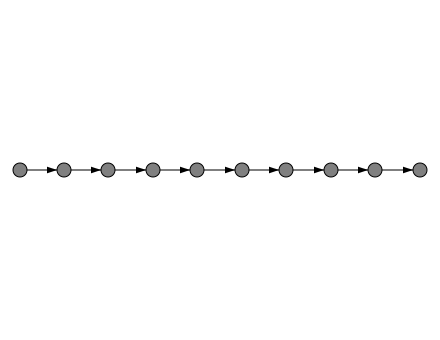

Score: 0
% of visited states: 60.0%

Iteration: 119
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

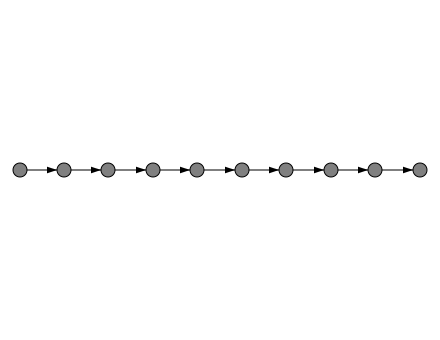

Score: 0
% of visited states: 60.0%

Iteration: 120
(0, 0) probas:  [0.01 0.07 0.93]
(0, 1) probas:  [0.01 0.05 0.94]
(1, 0) probas:  [0.01 0.06 0.94]
(1, 1) probas:  [0.   0.05 0.95]
(2, 0) probas:  [0.   0.05 0.95]
(2, 1) probas:  [0.   0.04 0.96]
(3, 0) probas:  [0.   0.04 0.96]
(3, 1) probas:  [0.   0.03 0.96]
(4, 0) probas:  [0.   0.03 0.97]
(4, 1) probas:  [0.   0.03 0.97]
(5, 0) probas:  [0.   0.03 0.97]
(5, 1) probas:  [0.   0.02 0.97]
(6, 0) probas:  [0.   0.02 0.98]
(6, 1) probas:  [0.   0.02 0.98]
(7, 0) probas:  [0.   0.02 0.98]
(7, 1) probas:  [0.   0.02 0.98]
(8, 0) probas:  [0.   0.02 0.98]
(8, 1) probas:  [0.   0.01 0.99]
(9, 0) probas:  [0.   0.01 0.99]
(9, 1) probas:  [0.   0.01 0.99]
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0)

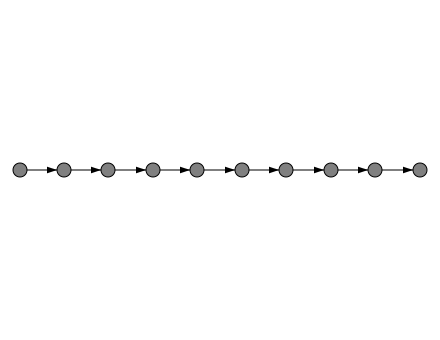

Score: 0
% of visited states: 60.0%

Iteration: 121
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

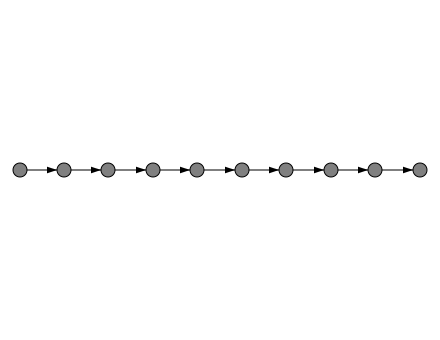

Score: 0
% of visited states: 60.0%

Iteration: 122
[{(0, 0): {(0, 0): 1.0, (1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.15061602 0.15891043 0.46666667 0.75       0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.91666667 0.76666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 1.         0.91666667
  1.         0.91666667 0.91666667 0.68333333 0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.68333333 0

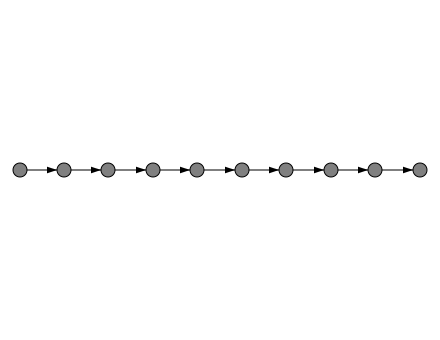

Score: 0
% of visited states: 60.0%

Iteration: 123
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

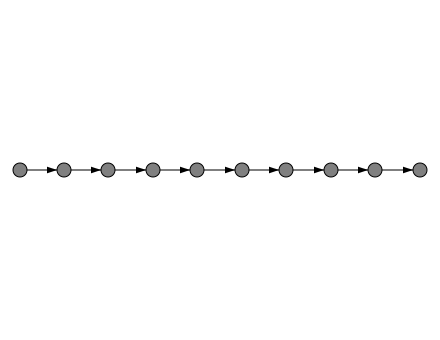

Score: 0
% of visited states: 60.0%

Iteration: 124
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

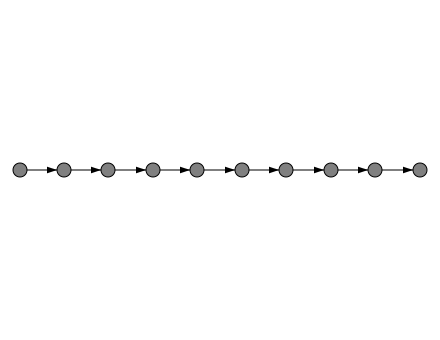

Score: 0
% of visited states: 60.0%

Iteration: 125
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(1, 0): 1.0, (2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.58333333 0.8        0.85       0.85
  0.85       0.85       0.85       0.85       0.85       0.76666667
  0.85       0.85       0.85       0.85       0.85       0.85
  0.85       0.85       0.85       0.85       0.83333333 0.85
  0.83333333 0.85       0.85       0.65       0.85       0.85
  0.85       0.85       0.85       0.85       0.85       0.85
  0.85       0.85       0.85       0.85       0.85       0.85
  0.85       0.85       0.85       0.85       0.68333333 0.85
  0.61666667 0.85       0.85    

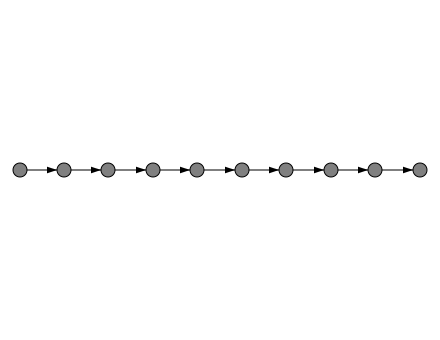

Score: 0
% of visited states: 60.0%

Iteration: 126
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(2, 0): 1.0, (3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.45       0.85       0.8        0.8
  0.8        0.8        0.8        0.8        0.8        1.
  0.8        0.8        0.8        0.8        0.8        0.8
  0.8        0.8        0.8        0.8        0.76666667 0.8
  0.76666667 0.8        0.8        0.65       0.8        0.8
  0.8        0.8        0.8        0.8        0.8        0.8
  0.8        0.8        0.8        0.8        0.8        0.8
  0.8        0.8        0.8        0.8        0.76666667 0.8
  0.6        0.8        0.8        0.8        0

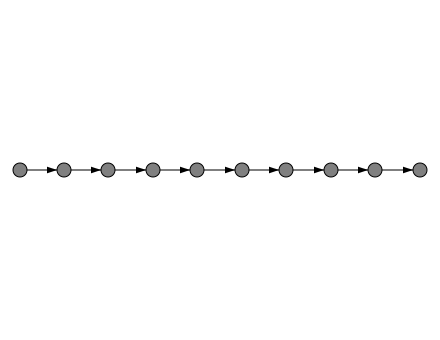

Score: 0
% of visited states: 60.0%

Iteration: 127
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

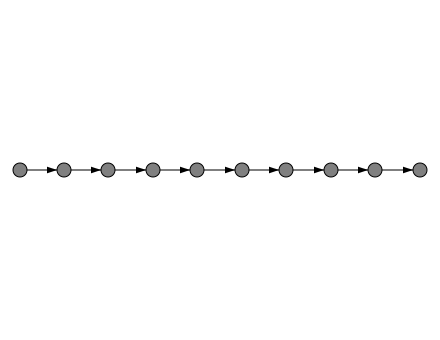

Score: 0
% of visited states: 60.0%

Iteration: 128
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(2, 0): 1.0, (3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.45       0.85       0.8        0.8
  0.8        0.8        0.8        0.8        0.8        1.
  0.8        0.8        0.8        0.8        0.8        0.8
  0.8        0.8        0.8        0.8        0.76666667 0.8
  0.76666667 0.8        0.8        0.65       0.8        0.8
  0.8        0.8        0.8        0.8        0.8        0.8
  0.8        0.8        0.8        0.8        0.8        0.8
  0.8        0.8        0.8        0.8        0.76666667 0.8
  0.6        0.8        0.8        0.8        0

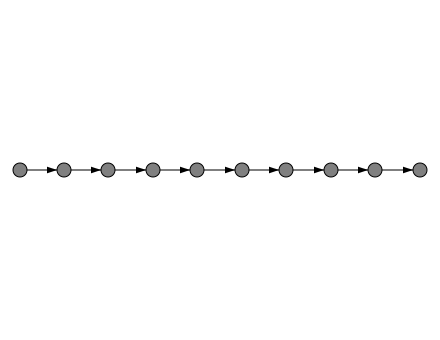

Score: 0
% of visited states: 60.0%

Iteration: 129
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

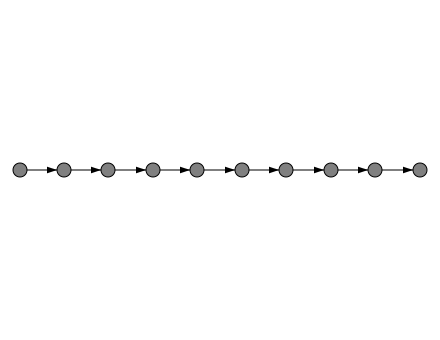

Score: 0
% of visited states: 60.0%

Iteration: 130
(0, 0) probas:  [0.01 0.07 0.92]
(0, 1) probas:  [0.01 0.06 0.94]
(1, 0) probas:  [0.01 0.06 0.94]
(1, 1) probas:  [0.   0.05 0.95]
(2, 0) probas:  [0.   0.05 0.95]
(2, 1) probas:  [0.   0.04 0.95]
(3, 0) probas:  [0.   0.04 0.96]
(3, 1) probas:  [0.   0.04 0.96]
(4, 0) probas:  [0.   0.03 0.96]
(4, 1) probas:  [0.   0.03 0.97]
(5, 0) probas:  [0.   0.03 0.97]
(5, 1) probas:  [0.   0.03 0.97]
(6, 0) probas:  [0.   0.02 0.98]
(6, 1) probas:  [0.   0.02 0.98]
(7, 0) probas:  [0.   0.02 0.98]
(7, 1) probas:  [0.   0.02 0.98]
(8, 0) probas:  [0.   0.02 0.98]
(8, 1) probas:  [0.   0.01 0.98]
(9, 0) probas:  [0.   0.01 0.99]
(9, 1) probas:  [0.   0.01 0.99]
[{(0, 0): {(0, 0): 1.0, (1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (

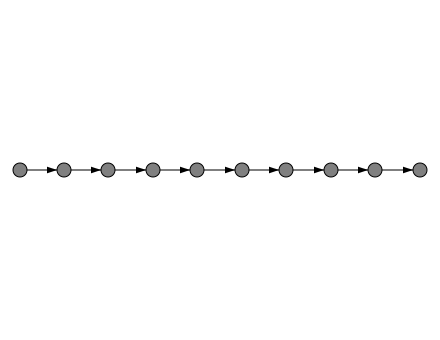

Score: 0
% of visited states: 60.0%

Iteration: 131
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

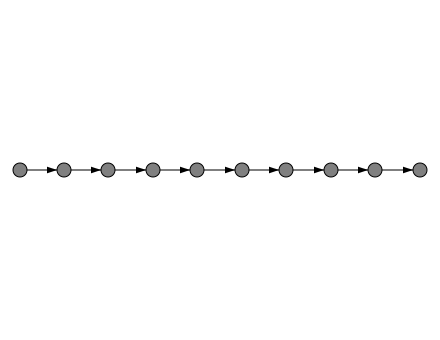

Score: 0
% of visited states: 60.0%

Iteration: 132
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

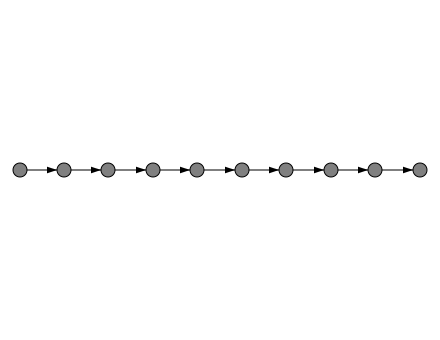

Score: 0
% of visited states: 60.0%

Iteration: 133
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

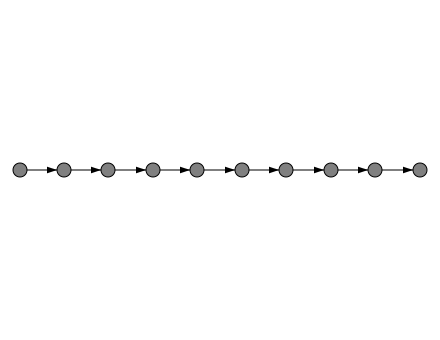

Score: 0
% of visited states: 60.0%

Iteration: 134
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

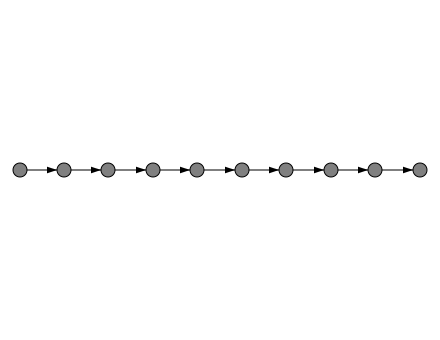

Score: 0
% of visited states: 60.0%

Iteration: 135
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

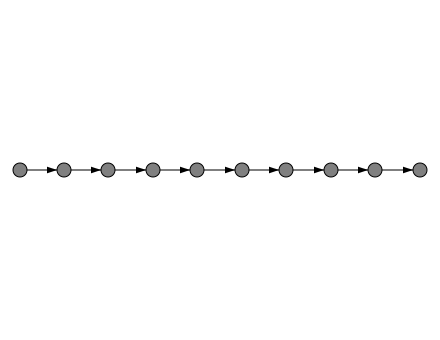

Score: 0
% of visited states: 60.0%

Iteration: 136
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

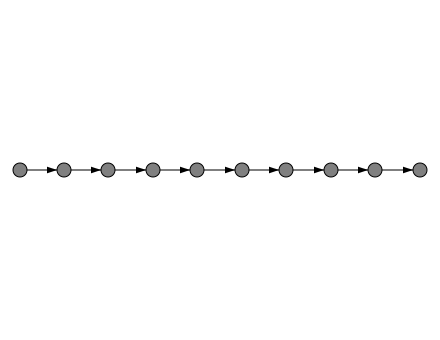

Score: 0
% of visited states: 60.0%

Iteration: 137
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(1, 0): 1.0, (2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.58333333 0.8        0.85       0.85
  0.85       0.85       0.85       0.85       0.85       0.76666667
  0.85       0.85       0.85       0.85       0.85       0.85
  0.85       0.85       0.85       0.85       0.83333333 0.85
  0.83333333 0.85       0.85       0.65       0.85       0.85
  0.85       0.85       0.85       0.85       0.85       0.85
  0.85       0.85       0.85       0.85       0.85       0.85
  0.85       0.85       0.85       0.85       0.68333333 0.85
  0.61666667 0.85       0.85    

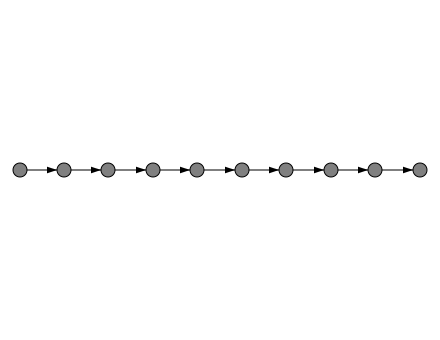

Score: 0
% of visited states: 60.0%

Iteration: 138
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(2, 0): 1.0, (3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.45       0.85       0.8        0.8
  0.8        0.8        0.8        0.8        0.8        1.
  0.8        0.8        0.8        0.8        0.8        0.8
  0.8        0.8        0.8        0.8        0.76666667 0.8
  0.76666667 0.8        0.8        0.65       0.8        0.8
  0.8        0.8        0.8        0.8        0.8        0.8
  0.8        0.8        0.8        0.8        0.8        0.8
  0.8        0.8        0.8        0.8        0.76666667 0.8
  0.6        0.8        0.8        0.8        0

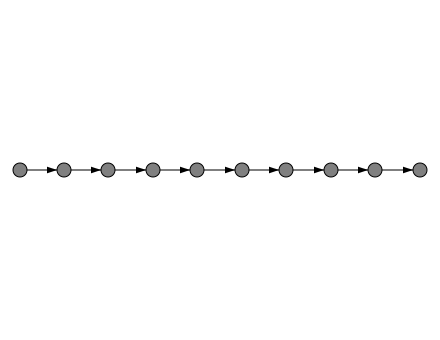

Score: 0
% of visited states: 60.0%

Iteration: 139
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

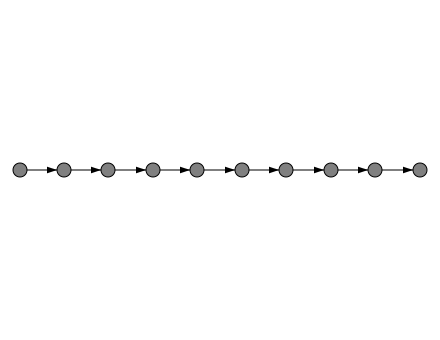

Score: 0
% of visited states: 60.0%

Iteration: 140
(0, 0) probas:  [0.01 0.07 0.92]
(0, 1) probas:  [0.01 0.06 0.94]
(1, 0) probas:  [0.01 0.06 0.94]
(1, 1) probas:  [0.   0.05 0.95]
(2, 0) probas:  [0.   0.05 0.95]
(2, 1) probas:  [0.   0.04 0.95]
(3, 0) probas:  [0.   0.04 0.96]
(3, 1) probas:  [0.   0.04 0.96]
(4, 0) probas:  [0.   0.03 0.96]
(4, 1) probas:  [0.   0.03 0.97]
(5, 0) probas:  [0.   0.03 0.97]
(5, 1) probas:  [0.   0.03 0.97]
(6, 0) probas:  [0.   0.02 0.97]
(6, 1) probas:  [0.   0.02 0.98]
(7, 0) probas:  [0.   0.02 0.98]
(7, 1) probas:  [0.   0.02 0.98]
(8, 0) probas:  [0.   0.02 0.98]
(8, 1) probas:  [0.   0.02 0.98]
(9, 0) probas:  [0.   0.01 0.99]
(9, 1) probas:  [0.   0.01 0.99]
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0)

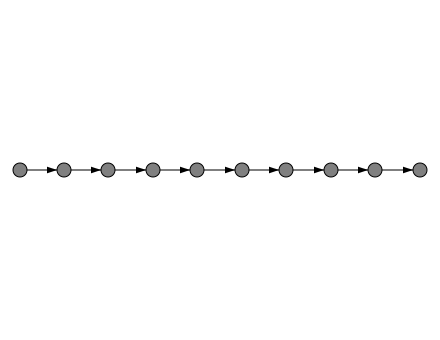

Score: 0
% of visited states: 60.0%

Iteration: 141
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(3, 0): 1.0, (4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.15891043 0.45       0.68333333 0.76666667 0.76666667
  0.76666667 0.76666667 0.76666667 0.76666667 0.76666667 0.71666667
  0.76666667 0.76666667 0.76666667 0.76666667 0.76666667 0.76666667
  0.76666667 0.76666667 0.76666667 0.76666667 0.71666667 0.76666667
  0.71666667 0.76666667 0.76666667 0.68333333 0.76666667 0.76666667
  0.76666667 0.76666667 0.76666667 0.76666667 0.76666667 0.76666667
  0.76666667 0.76666667 0.76666667 0.76666667 0.76666667 0.76666667
  0.76666667 0.76666667 0.76666667 0.76666667 0.8        0

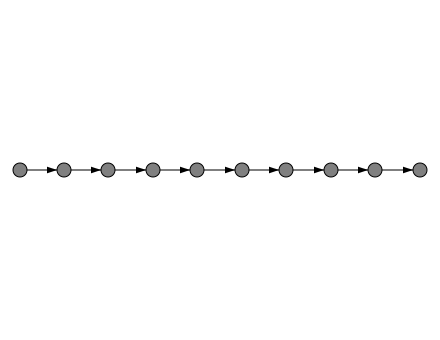

Score: 0
% of visited states: 60.0%

Iteration: 142
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

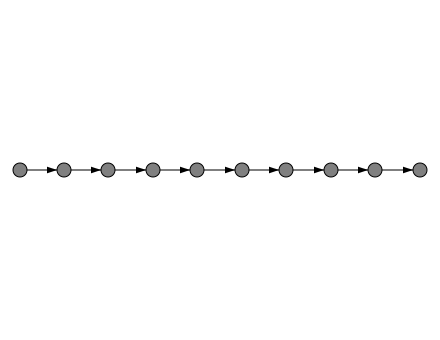

Score: 0
% of visited states: 60.0%

Iteration: 143
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

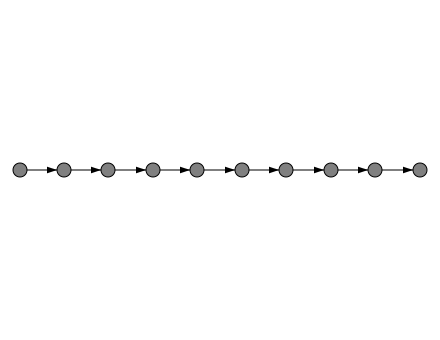

Score: 0
% of visited states: 60.0%

Iteration: 144
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

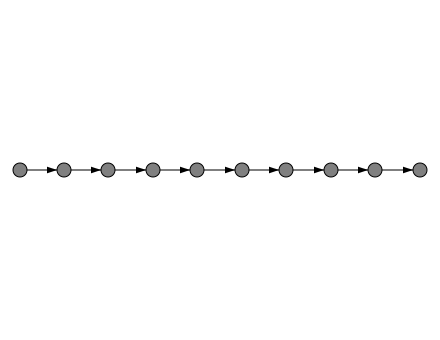

Score: 0
% of visited states: 60.0%

Iteration: 145
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

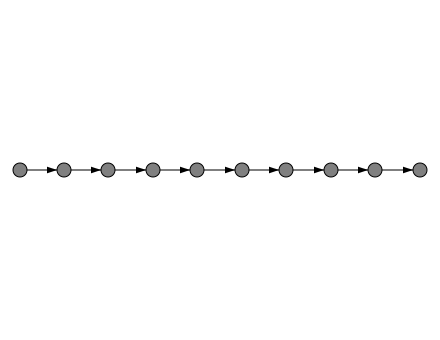

Score: 0
% of visited states: 60.0%

Iteration: 146
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(1, 0): 1.0, (2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.58333333 0.8        0.85       0.85
  0.85       0.85       0.85       0.85       0.85       0.76666667
  0.85       0.85       0.85       0.85       0.85       0.85
  0.85       0.85       0.85       0.85       0.83333333 0.85
  0.83333333 0.85       0.85       0.65       0.85       0.85
  0.85       0.85       0.85       0.85       0.85       0.85
  0.85       0.85       0.85       0.85       0.85       0.85
  0.85       0.85       0.85       0.85       0.68333333 0.85
  0.61666667 0.85       0.85    

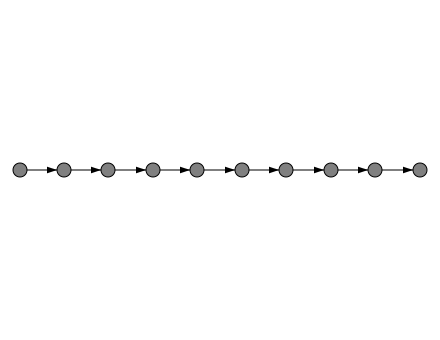

Score: 0
% of visited states: 60.0%

Iteration: 147
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(3, 0): 1.0, (4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.15891043 0.45       0.68333333 0.76666667 0.76666667
  0.76666667 0.76666667 0.76666667 0.76666667 0.76666667 0.71666667
  0.76666667 0.76666667 0.76666667 0.76666667 0.76666667 0.76666667
  0.76666667 0.76666667 0.76666667 0.76666667 0.71666667 0.76666667
  0.71666667 0.76666667 0.76666667 0.68333333 0.76666667 0.76666667
  0.76666667 0.76666667 0.76666667 0.76666667 0.76666667 0.76666667
  0.76666667 0.76666667 0.76666667 0.76666667 0.76666667 0.76666667
  0.76666667 0.76666667 0.76666667 0.76666667 0.8        0

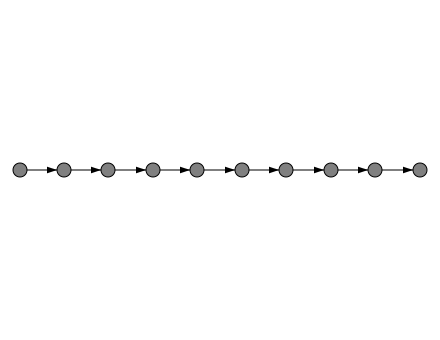

Score: 0
% of visited states: 60.0%

Iteration: 148
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

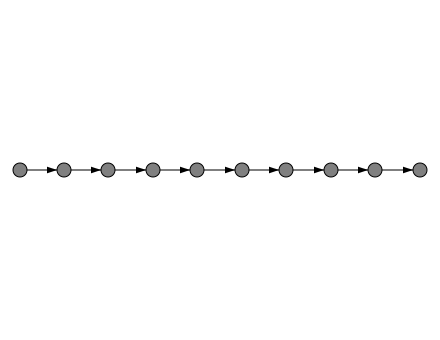

Score: 0
% of visited states: 60.0%

Iteration: 149
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(5, 0): 1.0, (6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.5        0.56666667 0.75       0.75
  0.75       0.75       0.75       0.75       0.75       0.6
  0.75       0.75       0.75       0.75       0.75       0.75
  0.75       0.75       0.75       0.75       0.66666667 0.75
  0.66666667 0.75       0.75       0.66666667 0.75       0.75
  0.75       0.75       0.75       0.75       0.75       0.75
  0.75       0.75       0.75       0.75       0.75       0.75
  0.75       0.75       0.75       0.75       0.56666667 0.75
  1.         0.75       0.75       0.75

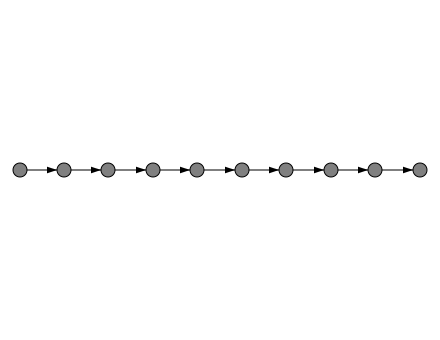

Score: 0
% of visited states: 60.0%

Iteration: 150
(0, 0) probas:  [0.01 0.07 0.92]
(0, 1) probas:  [0.01 0.06 0.94]
(1, 0) probas:  [0.01 0.06 0.93]
(1, 1) probas:  [0.   0.05 0.94]
(2, 0) probas:  [0.   0.05 0.94]
(2, 1) probas:  [0.   0.04 0.95]
(3, 0) probas:  [0.   0.04 0.95]
(3, 1) probas:  [0.   0.04 0.96]
(4, 0) probas:  [0.   0.04 0.96]
(4, 1) probas:  [0.   0.03 0.97]
(5, 0) probas:  [0.   0.03 0.97]
(5, 1) probas:  [0.   0.03 0.97]
(6, 0) probas:  [0.   0.02 0.97]
(6, 1) probas:  [0.   0.02 0.98]
(7, 0) probas:  [0.   0.02 0.98]
(7, 1) probas:  [0.   0.02 0.98]
(8, 0) probas:  [0.   0.02 0.98]
(8, 1) probas:  [0.   0.02 0.98]
(9, 0) probas:  [0.   0.01 0.98]
(9, 1) probas:  [0.   0.01 0.99]
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(3, 0): 1.0, (4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (

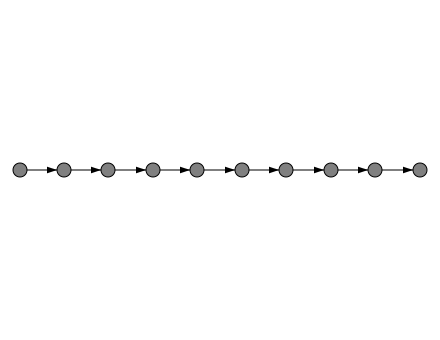

Score: 0
% of visited states: 60.0%

Iteration: 151
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

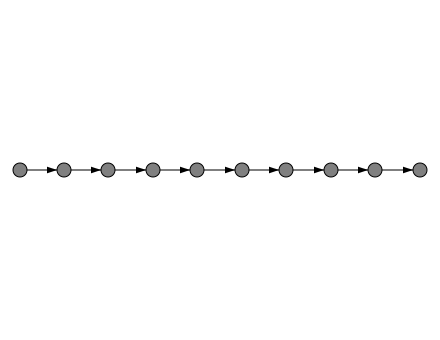

Score: 0
% of visited states: 60.0%

Iteration: 152
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

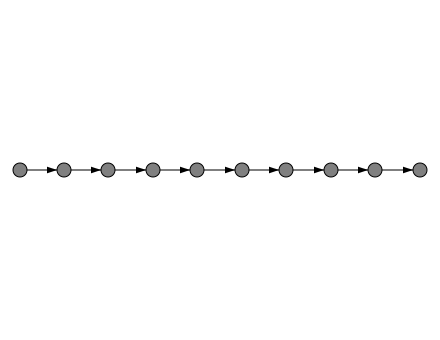

Score: 0
% of visited states: 60.0%

Iteration: 153
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(7, 1): 1.0}, (7, 1): {(8, 1): 1.0}, (8, 1): {(9, 1): 1.0}, (9, 1): {(9, 1): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (7, 1): (7, 1), (8, 1): (8, 1), (9, 1): (9, 1)}, None]
[[0.12309149 0.13636364 0.19069252 0.30192982 0.52440442 0.52440442
  0.52440442 0.52440442 0.52440442 0.52440442 0.52440442 0.33371191
  0.52440442 0.52440442 0.52440442 0.52440442 0.52440442 0.52440442
  0.52440442 0.52440442 0.52440442 0.52440442 0.44494921 0.52440442
  0.44494921 0.52440442 0.52440442 0.33371191 0.52440442 0.52440442
  0.52440442 0.52440442 0.52440442 0.52440442 0.52440442 0.52440442
  0.52440442 0.52440442 0.52440442 0.52440442 0.52440442 0.52440442
  0.52440442 0.52440442 0.524404

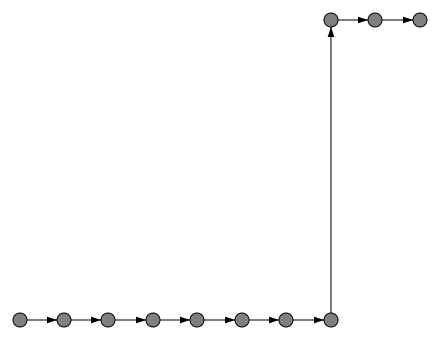

Score: 0
% of visited states: 65.0%

Iteration: 154
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

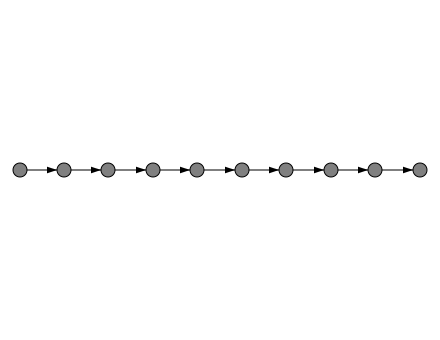

Score: 0
% of visited states: 65.0%

Iteration: 155
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(2, 0): 1.0, (3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.45       0.85       0.8        0.8
  0.8        0.8        0.8        0.8        0.8        1.
  0.8        0.8        0.8        0.8        0.8        0.8
  0.8        0.8        0.8        0.8        0.76666667 0.8
  0.76666667 0.8        0.8        0.65       0.8        0.8
  0.8        0.8        0.8        0.8        0.8        0.8
  0.8        0.8        0.8        0.8        0.8        0.8
  0.8        0.8        0.8        0.8        0.76666667 0.8
  0.6        0.8        0.8        0.8        0

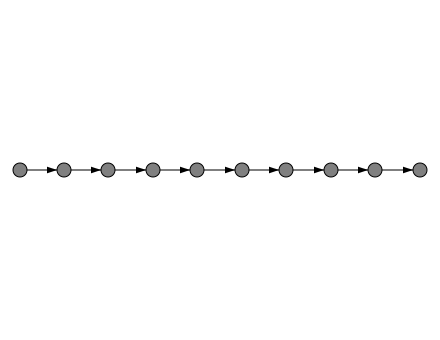

Score: 0
% of visited states: 65.0%

Iteration: 156
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

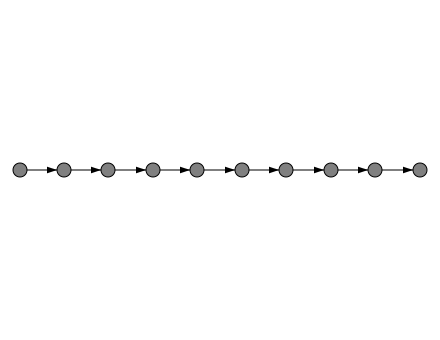

Score: 0
% of visited states: 65.0%

Iteration: 157
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

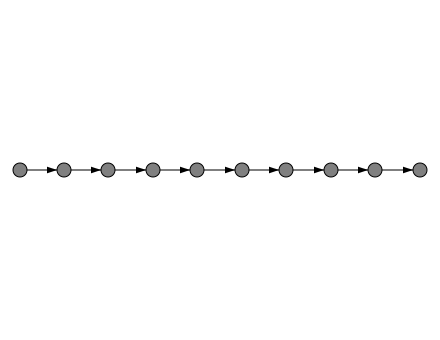

Score: 0
% of visited states: 65.0%

Iteration: 158
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

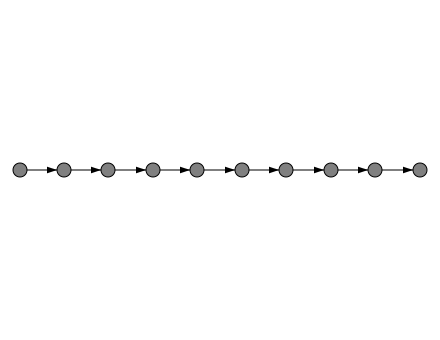

Score: 0
% of visited states: 65.0%

Iteration: 159
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(2, 0): 1.0, (3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.45       0.85       0.8        0.8
  0.8        0.8        0.8        0.8        0.8        1.
  0.8        0.8        0.8        0.8        0.8        0.8
  0.8        0.8        0.8        0.8        0.76666667 0.8
  0.76666667 0.8        0.8        0.65       0.8        0.8
  0.8        0.8        0.8        0.8        0.8        0.8
  0.8        0.8        0.8        0.8        0.8        0.8
  0.8        0.8        0.8        0.8        0.76666667 0.8
  0.6        0.8        0.8        0.8        0

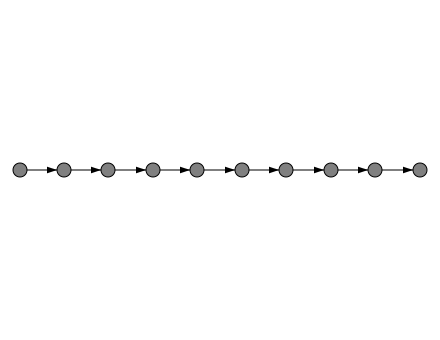

Score: 0
% of visited states: 65.0%

Iteration: 160
(0, 0) probas:  [0.01 0.08 0.92]
(0, 1) probas:  [0.01 0.06 0.93]
(1, 0) probas:  [0.01 0.06 0.93]
(1, 1) probas:  [0.   0.05 0.94]
(2, 0) probas:  [0.01 0.05 0.94]
(2, 1) probas:  [0.   0.05 0.95]
(3, 0) probas:  [0.   0.05 0.95]
(3, 1) probas:  [0.   0.04 0.96]
(4, 0) probas:  [0.   0.04 0.96]
(4, 1) probas:  [0.   0.03 0.96]
(5, 0) probas:  [0.   0.03 0.97]
(5, 1) probas:  [0.   0.03 0.97]
(6, 0) probas:  [0.   0.03 0.97]
(6, 1) probas:  [0.   0.02 0.97]
(7, 0) probas:  [0.   0.02 0.98]
(7, 1) probas:  [0.   0.02 0.98]
(8, 0) probas:  [0.   0.02 0.98]
(8, 1) probas:  [0.   0.02 0.98]
(9, 0) probas:  [0.   0.02 0.98]
(9, 1) probas:  [0.   0.01 0.98]
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0)

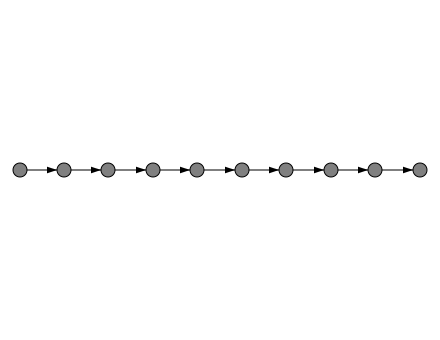

Score: 0
% of visited states: 65.0%

Iteration: 161
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

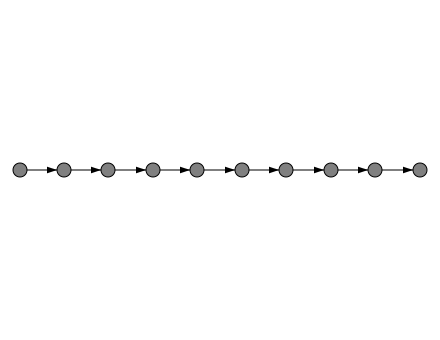

Score: 0
% of visited states: 65.0%

Iteration: 162
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

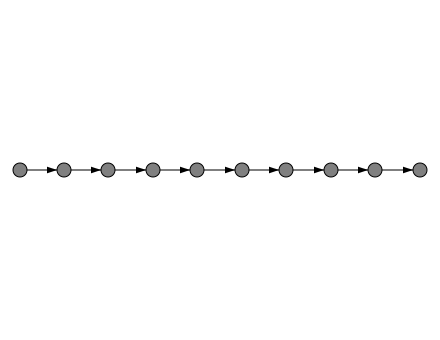

Score: 0
% of visited states: 65.0%

Iteration: 163
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(6, 0): 1.0, (7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.56666667 0.53333333 0.75       0.75
  0.75       0.75       0.75       0.75       0.75       0.56666667
  0.75       0.75       0.75       0.75       0.75       0.75
  0.75       0.75       0.75       0.75       0.66666667 0.75
  0.66666667 0.75       0.75       0.6        0.75       0.75
  0.75       0.75       0.75       0.75       0.75       0.75
  0.75       0.75       0.75       0.75       0.75       0.75
  0.75       0.75       0.75       0.75       0.51666667 0.75
  0.66666667 0.75       0.75    

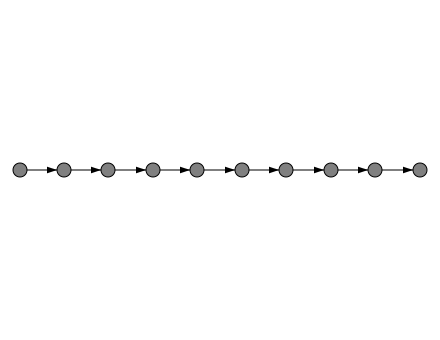

Score: 0
% of visited states: 65.0%

Iteration: 164
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

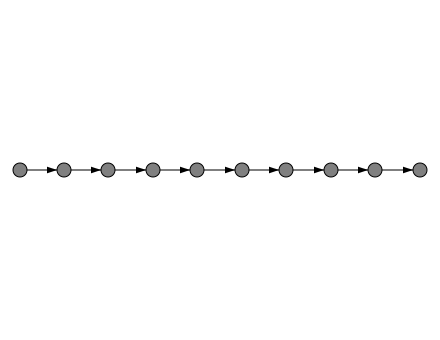

Score: 0
% of visited states: 65.0%

Iteration: 165
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(5, 0): 1.0, (6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.5        0.56666667 0.75       0.75
  0.75       0.75       0.75       0.75       0.75       0.6
  0.75       0.75       0.75       0.75       0.75       0.75
  0.75       0.75       0.75       0.75       0.66666667 0.75
  0.66666667 0.75       0.75       0.66666667 0.75       0.75
  0.75       0.75       0.75       0.75       0.75       0.75
  0.75       0.75       0.75       0.75       0.75       0.75
  0.75       0.75       0.75       0.75       0.56666667 0.75
  1.         0.75       0.75       0.75

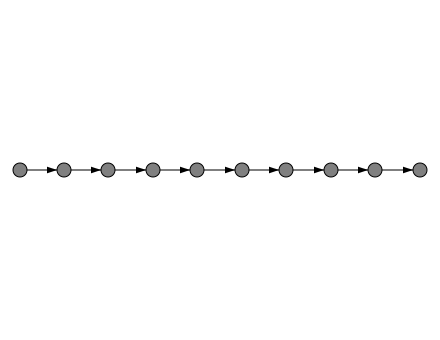

Score: 0
% of visited states: 65.0%

Iteration: 166
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

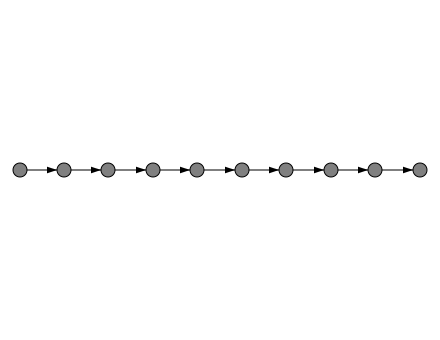

Score: 0
% of visited states: 65.0%

Iteration: 167
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

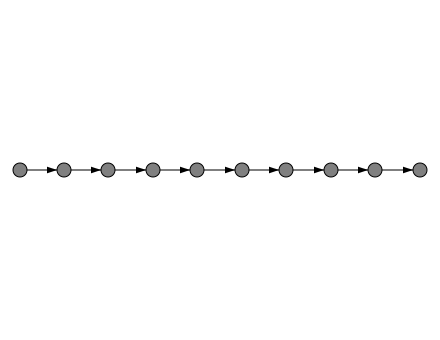

Score: 0
% of visited states: 65.0%

Iteration: 168
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(2, 0): 1.0, (4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.45       0.68333333 0.76666667 0.76666667
  0.76666667 0.76666667 0.76666667 0.76666667 0.76666667 0.71666667
  0.76666667 0.76666667 0.76666667 0.76666667 0.76666667 0.76666667
  0.76666667 0.76666667 0.76666667 0.76666667 0.71666667 0.76666667
  0.71666667 0.76666667 0.76666667 0.68333333 0.76666667 0.76666667
  0.76666667 0.76666667 0.76666667 0.76666667 0.76666667 0.76666667
  0.76666667 0.76666667 0.76666667 0.76666667 0.76666667 0.76666667
  0.76666667 0.76666667 0.76666667 0.76666667 0.71666667 0

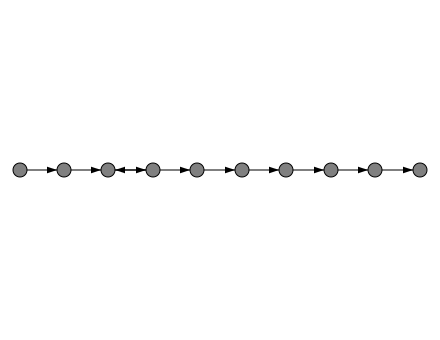

Score: 0
% of visited states: 65.0%

Iteration: 169
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

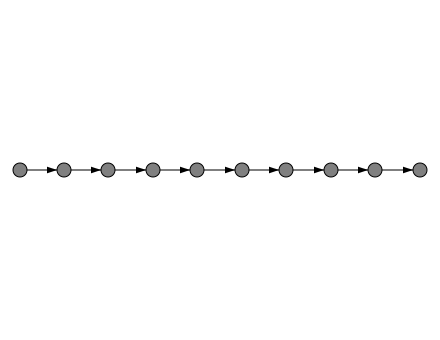

Score: 0
% of visited states: 65.0%

Iteration: 170
(0, 0) probas:  [0.01 0.08 0.92]
(0, 1) probas:  [0.01 0.06 0.93]
(1, 0) probas:  [0.01 0.06 0.93]
(1, 1) probas:  [0.   0.05 0.94]
(2, 0) probas:  [0.01 0.06 0.94]
(2, 1) probas:  [0.   0.05 0.95]
(3, 0) probas:  [0.   0.05 0.95]
(3, 1) probas:  [0.   0.04 0.96]
(4, 0) probas:  [0.   0.04 0.96]
(4, 1) probas:  [0.   0.04 0.96]
(5, 0) probas:  [0.   0.03 0.96]
(5, 1) probas:  [0.   0.03 0.97]
(6, 0) probas:  [0.   0.03 0.97]
(6, 1) probas:  [0.   0.03 0.97]
(7, 0) probas:  [0.   0.02 0.98]
(7, 1) probas:  [0.   0.02 0.98]
(8, 0) probas:  [0.   0.02 0.98]
(8, 1) probas:  [0.   0.02 0.98]
(9, 0) probas:  [0.   0.02 0.98]
(9, 1) probas:  [0.   0.01 0.98]
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0, (8, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (

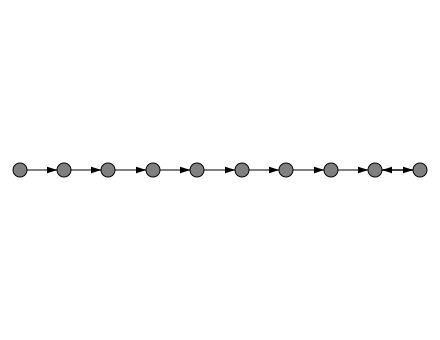

Score: 0
% of visited states: 65.0%

Iteration: 171
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

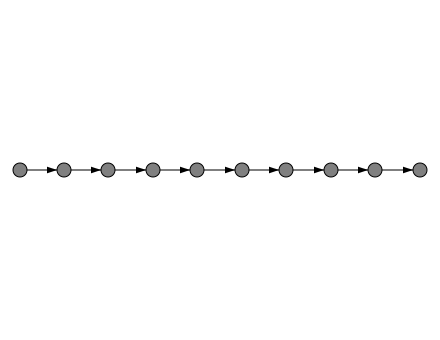

Score: 0
% of visited states: 65.0%

Iteration: 172
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(8, 0): 1.0, (9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.33333333 0.51666667 0.75       0.75
  0.75       0.75       0.75       0.75       0.75       0.55
  0.75       0.75       0.75       0.75       0.75       0.75
  0.75       0.75       0.75       0.75       0.66666667 0.75
  0.66666667 0.75       0.75       0.51666667 0.75       0.75
  0.75       0.75       0.75       0.75       0.75       0.75
  0.75       0.75       0.75       0.75       0.75       0.75
  0.75       0.75       0.75       0.75       0.46666667 0.75
  0.55       0.75       0.75       0.7

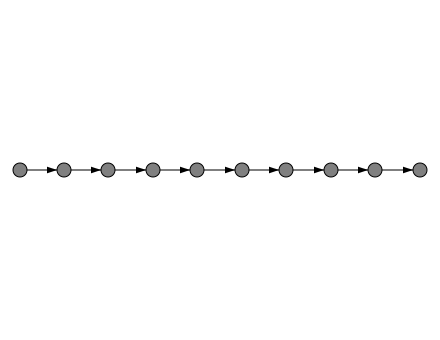

Score: 0
% of visited states: 65.0%

Iteration: 173
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(4, 0): 1.0, (5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(8, 0): 1.0, (9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.33333333 0.38333333 0.51666667 0.51666667
  0.51666667 0.51666667 0.51666667 0.51666667 0.51666667 0.41666667
  0.51666667 0.51666667 0.51666667 0.51666667 0.51666667 0.51666667
  0.51666667 0.51666667 0.51666667 0.51666667 0.45       0.51666667
  0.45       0.51666667 0.51666667 0.75       0.51666667 0.51666667
  0.51666667 0.51666667 0.51666667 0.51666667 0.51666667 0.51666667
  0.51666667 0.51666667 0.51666667 0.51666667 0.51666667 0.51666667
  0.51666667 0.51666667 0.51666667 0.51666667

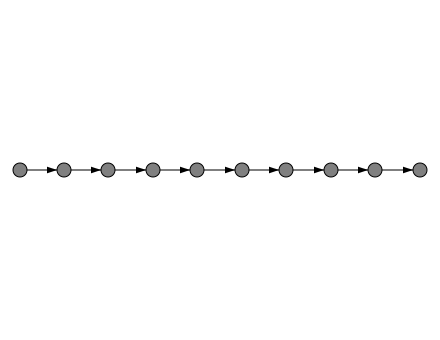

Score: 0
% of visited states: 65.0%

Iteration: 174
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

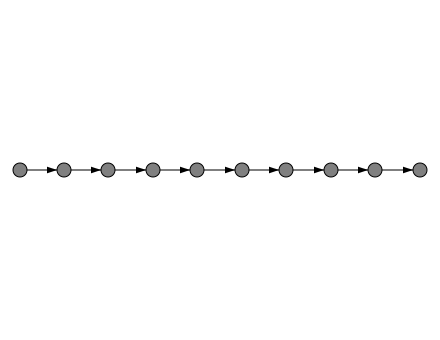

Score: 0
% of visited states: 65.0%

Iteration: 175
[{(0, 0): {(0, 0): 1.0, (1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.15061602 0.15891043 0.46666667 0.75       0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.91666667 0.76666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 1.         0.91666667
  1.         0.91666667 0.91666667 0.68333333 0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.68333333 0

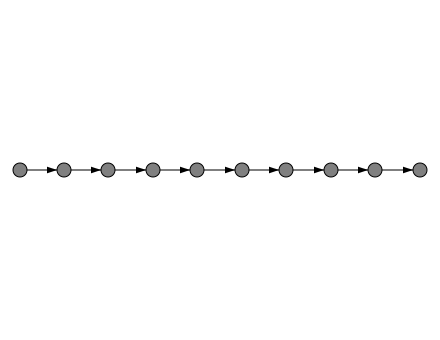

Score: 0
% of visited states: 65.0%

Iteration: 176
[{(0, 0): {(0, 0): 1.0, (1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.15061602 0.15891043 0.46666667 0.75       0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.91666667 0.76666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 1.         0.91666667
  1.         0.91666667 0.91666667 0.68333333 0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.68333333 0

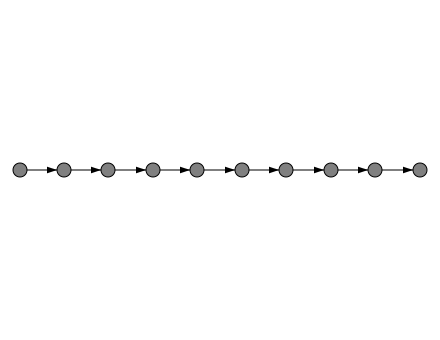

Score: 0
% of visited states: 65.0%

Iteration: 177
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(0, 0): 1.0, (2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(7, 1): 1.0}, (7, 1): {(8, 1): 1.0}, (8, 1): {(9, 1): 1.0}, (9, 1): {(9, 1): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (7, 1): (7, 1), (8, 1): (8, 1), (9, 1): (9, 1)}, None]
[[0.12309149 0.13636364 0.19069252 0.30192982 0.38138504 0.38138504
  0.38138504 0.38138504 0.38138504 0.38138504 0.38138504 0.30192982
  0.38138504 0.38138504 0.38138504 0.38138504 0.38138504 0.38138504
  0.38138504 0.38138504 0.38138504 0.38138504 0.36549399 0.38138504
  0.36549399 0.38138504 0.38138504 0.23836565 0.38138504 0.38138504
  0.38138504 0.38138504 0.38138504 0.38138504 0.38138504 0.38138504
  0.38138504 0.38138504 0.38138504 0.38138504 0.38138504 0.38138504
  0.38138504 0.3813

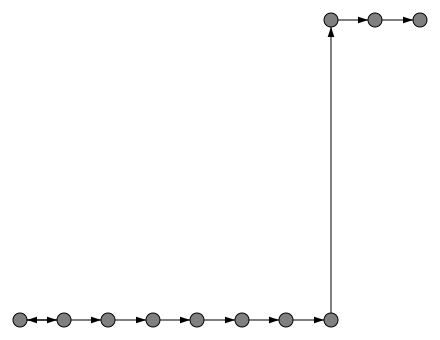

Score: 0
% of visited states: 70.0%

Iteration: 178
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(5, 0): 1.0, (6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.5        0.56666667 0.75       0.75
  0.75       0.75       0.75       0.75       0.75       0.6
  0.75       0.75       0.75       0.75       0.75       0.75
  0.75       0.75       0.75       0.75       0.66666667 0.75
  0.66666667 0.75       0.75       0.66666667 0.75       0.75
  0.75       0.75       0.75       0.75       0.75       0.75
  0.75       0.75       0.75       0.75       0.75       0.75
  0.75       0.75       0.75       0.75       0.56666667 0.75
  1.         0.75       0.75       0.75

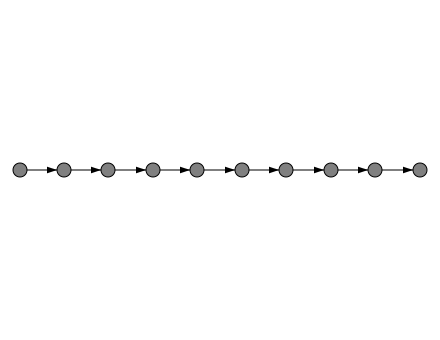

Score: 0
% of visited states: 70.0%

Iteration: 179
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

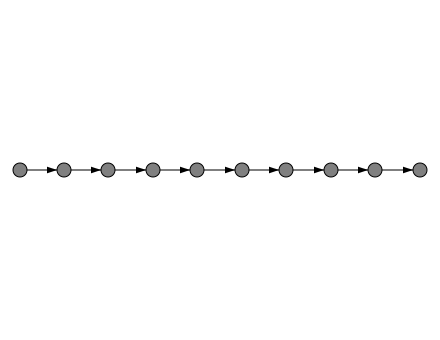

Score: 0
% of visited states: 70.0%

Iteration: 180
(0, 0) probas:  [0.01 0.11 0.87]
(0, 1) probas:  [0.01 0.09 0.89]
(1, 0) probas:  [0.01 0.1  0.89]
(1, 1) probas:  [0.01 0.09 0.9 ]
(2, 0) probas:  [0.01 0.09 0.9 ]
(2, 1) probas:  [0.01 0.08 0.91]
(3, 0) probas:  [0.01 0.08 0.91]
(3, 1) probas:  [0.01 0.07 0.92]
(4, 0) probas:  [0.01 0.07 0.93]
(4, 1) probas:  [0.01 0.06 0.93]
(5, 0) probas:  [0.   0.06 0.94]
(5, 1) probas:  [0.   0.05 0.94]
(6, 0) probas:  [0.   0.05 0.94]
(6, 1) probas:  [0.   0.05 0.95]
(7, 0) probas:  [0.   0.05 0.95]
(7, 1) probas:  [0.   0.04 0.96]
(8, 0) probas:  [0.   0.04 0.96]
(8, 1) probas:  [0.   0.04 0.96]
(9, 0) probas:  [0.   0.03 0.96]
(9, 1) probas:  [0.   0.03 0.97]
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0)

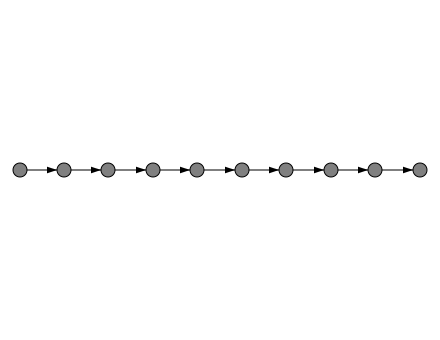

Score: 0
% of visited states: 70.0%

Iteration: 181
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

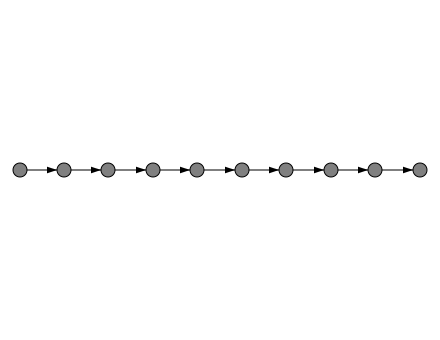

Score: 0
% of visited states: 70.0%

Iteration: 182
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(8, 0): 1.0, (9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.33333333 0.51666667 0.75       0.75
  0.75       0.75       0.75       0.75       0.75       0.55
  0.75       0.75       0.75       0.75       0.75       0.75
  0.75       0.75       0.75       0.75       0.66666667 0.75
  0.66666667 0.75       0.75       0.51666667 0.75       0.75
  0.75       0.75       0.75       0.75       0.75       0.75
  0.75       0.75       0.75       0.75       0.75       0.75
  0.75       0.75       0.75       0.75       0.46666667 0.75
  0.55       0.75       0.75       0.7

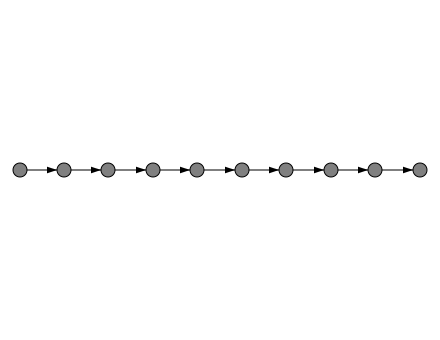

Score: 0
% of visited states: 70.0%

Iteration: 183
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

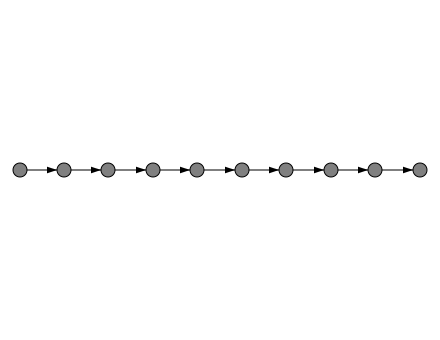

Score: 0
% of visited states: 70.0%

Iteration: 184
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

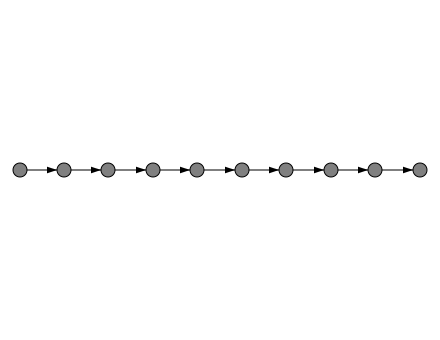

Score: 0
% of visited states: 70.0%

Iteration: 185
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

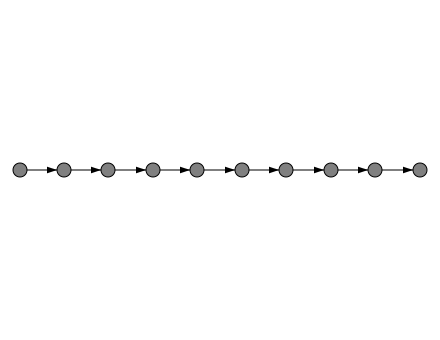

Score: 0
% of visited states: 70.0%

Iteration: 186
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

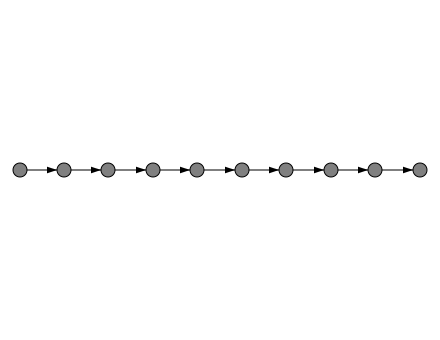

Score: 0
% of visited states: 70.0%

Iteration: 187
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

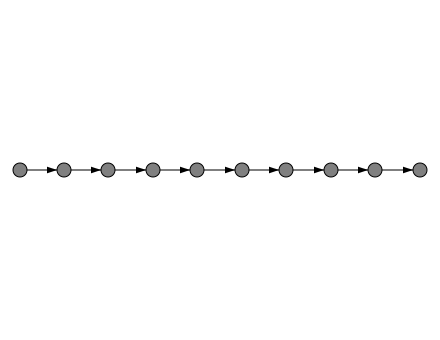

Score: 0
% of visited states: 70.0%

Iteration: 188
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(2, 0): 1.0, (3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.45       0.85       0.8        0.8
  0.8        0.8        0.8        0.8        0.8        1.
  0.8        0.8        0.8        0.8        0.8        0.8
  0.8        0.8        0.8        0.8        0.76666667 0.8
  0.76666667 0.8        0.8        0.65       0.8        0.8
  0.8        0.8        0.8        0.8        0.8        0.8
  0.8        0.8        0.8        0.8        0.8        0.8
  0.8        0.8        0.8        0.8        0.76666667 0.8
  0.6        0.8        0.8        0.8        0

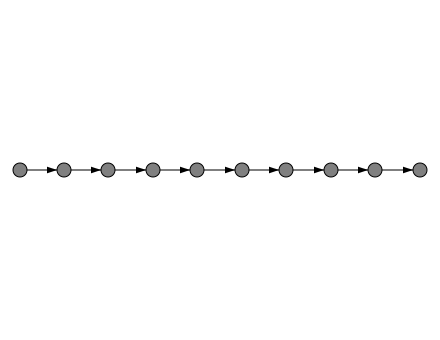

Score: 0
% of visited states: 70.0%

Iteration: 189
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

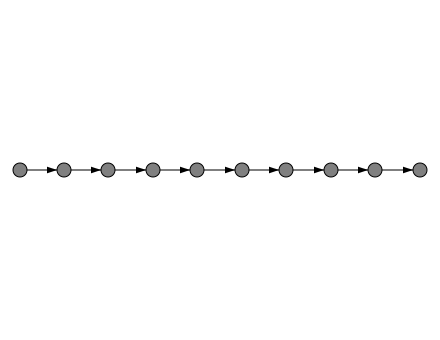

Score: 0
% of visited states: 70.0%

Iteration: 190
(0, 0) probas:  [0.02 0.12 0.86]
(0, 1) probas:  [0.01 0.1  0.89]
(1, 0) probas:  [0.01 0.11 0.88]
(1, 1) probas:  [0.01 0.09 0.9 ]
(2, 0) probas:  [0.01 0.1  0.89]
(2, 1) probas:  [0.01 0.09 0.91]
(3, 0) probas:  [0.01 0.09 0.9 ]
(3, 1) probas:  [0.01 0.08 0.92]
(4, 0) probas:  [0.01 0.08 0.92]
(4, 1) probas:  [0.01 0.07 0.93]
(5, 0) probas:  [0.01 0.07 0.93]
(5, 1) probas:  [0.   0.06 0.93]
(6, 0) probas:  [0.   0.06 0.94]
(6, 1) probas:  [0.   0.05 0.94]
(7, 0) probas:  [0.   0.05 0.95]
(7, 1) probas:  [0.   0.05 0.95]
(8, 0) probas:  [0.   0.04 0.95]
(8, 1) probas:  [0.   0.04 0.96]
(9, 0) probas:  [0.   0.04 0.96]
(9, 1) probas:  [0.   0.04 0.96]
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(2, 0): 1.0, (3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (

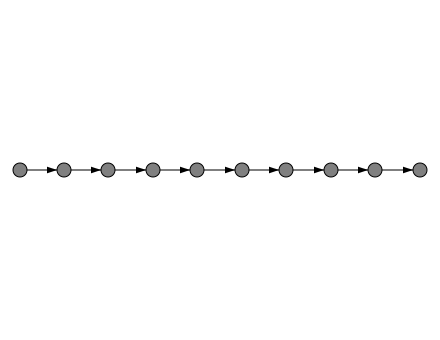

Score: 0
% of visited states: 70.0%

Iteration: 191
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(2, 0): 1.0, (3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(5, 0): 1.0, (6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.46666667 0.61666667 0.6        0.6
  0.6        0.6        0.6        0.6        0.6        0.75
  0.6        0.6        0.6        0.6        0.6        0.6
  0.6        0.6        0.6        0.6        0.56666667 0.6
  0.56666667 0.6        0.6        0.56666667 0.6        0.6
  0.6        0.6        0.6        0.6        0.6        0.6
  0.6        0.6        0.6        0.6        0.6        0.6
  0.6        0.6        0.6        0.6        0.61666667 0.6
  0.8        0.6        0.6     

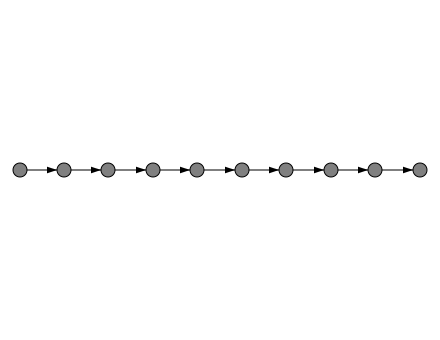

Score: 0
% of visited states: 70.0%

Iteration: 192
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(5, 0): 1.0, (6, 0): 1.0}, (6, 0): {(5, 0): 1.0, (7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.5        0.48333333 0.66666667 0.66666667
  0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.51666667
  0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
  0.66666667 0.66666667 0.66666667 0.66666667 0.58333333 0.66666667
  0.58333333 0.66666667 0.66666667 0.58333333 0.66666667 0.66666667
  0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
  0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
  0.66666667 0.66666667 0.66666667 0.66666667

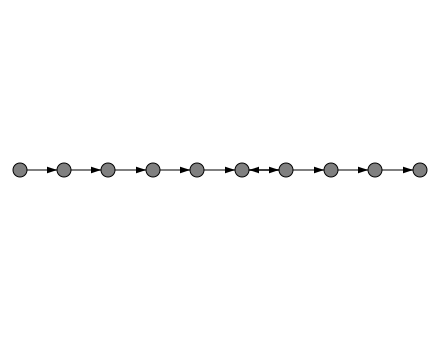

Score: 0
% of visited states: 70.0%

Iteration: 193
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

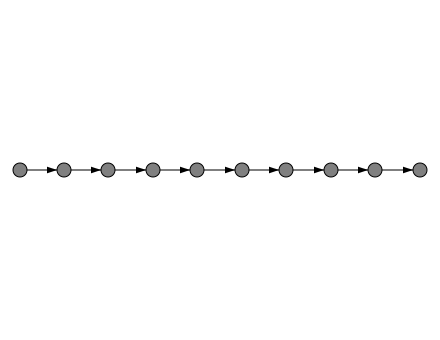

Score: 0
% of visited states: 70.0%

Iteration: 194
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

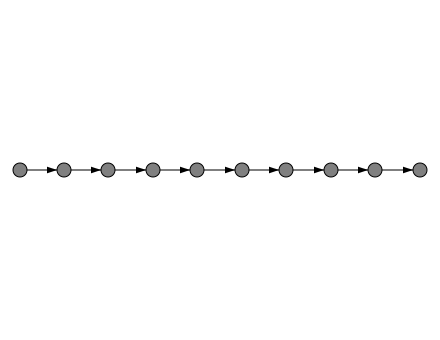

Score: 0
% of visited states: 70.0%

Iteration: 195
[{(0, 0): {(0, 0): 1.0, (1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.15061602 0.15891043 0.46666667 0.75       0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.91666667 0.76666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 1.         0.91666667
  1.         0.91666667 0.91666667 0.68333333 0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.68333333 0

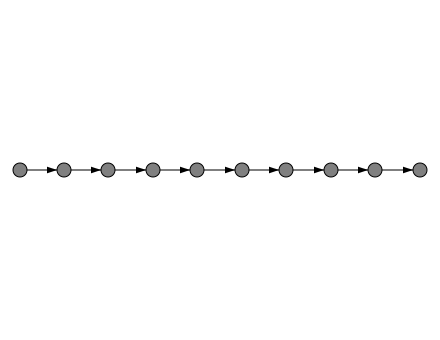

Score: 0
% of visited states: 70.0%

Iteration: 196
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(3, 0): 1.0, (4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(7, 1): 1.0}, (7, 1): {(8, 1): 1.0}, (8, 1): {(9, 1): 1.0}, (9, 1): {(9, 1): 1.0, (8, 1): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (7, 1): (7, 1), (8, 1): (8, 1), (9, 1): (9, 1)}, None]
[[0.12309149 0.15151515 0.15891043 0.23836565 0.31782086 0.31782086
  0.31782086 0.31782086 0.31782086 0.31782086 0.31782086 0.27014773
  0.31782086 0.31782086 0.31782086 0.31782086 0.31782086 0.31782086
  0.31782086 0.31782086 0.31782086 0.31782086 0.27014773 0.31782086
  0.27014773 0.31782086 0.31782086 0.27014773 0.31782086 0.31782086
  0.31782086 0.31782086 0.31782086 0.31782086 0.31782086 0.31782086
  0.31782086 0.31782086 0.31782086 0.31782086 0.31782086 0.31782086
  0.31

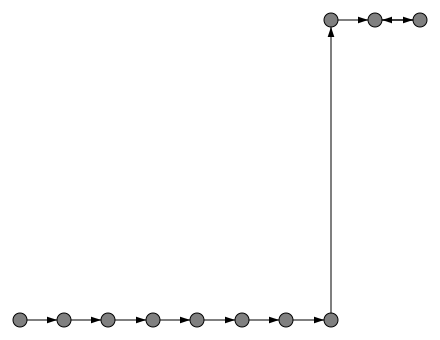

Score: 0
% of visited states: 70.0%

Iteration: 197
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(7, 1): 1.0}, (7, 1): {(8, 1): 1.0}, (8, 1): {(8, 1): 1.0, (9, 1): 1.0}, (9, 1): {(9, 1): 1.0, (8, 1): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (7, 1): (7, 1), (8, 1): (8, 1), (9, 1): (9, 1)}, None]
[[0.12309149 0.13636364 0.19069252 0.30192982 0.52440442 0.52440442
  0.52440442 0.52440442 0.52440442 0.52440442 0.52440442 0.33371191
  0.52440442 0.52440442 0.52440442 0.52440442 0.52440442 0.52440442
  0.52440442 0.52440442 0.52440442 0.52440442 0.44494921 0.52440442
  0.44494921 0.52440442 0.52440442 0.33371191 0.52440442 0.52440442
  0.52440442 0.52440442 0.52440442 0.52440442 0.52440442 0.52440442
  0.52440442 0.52440442 0.52440442 0.52440442 0.52440442 0.52440442
  0.52

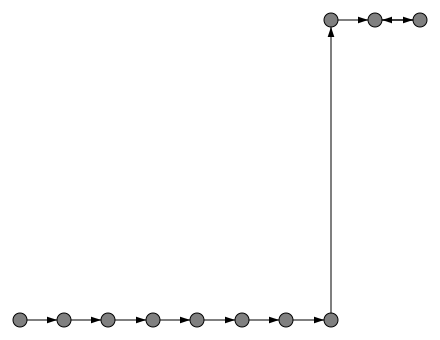

Score: 0
% of visited states: 70.0%

Iteration: 198
[{(0, 0): {(0, 0): 1.0, (1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.15061602 0.15891043 0.46666667 0.75       0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.91666667 0.76666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 1.         0.91666667
  1.         0.91666667 0.91666667 0.68333333 0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.68333333 0

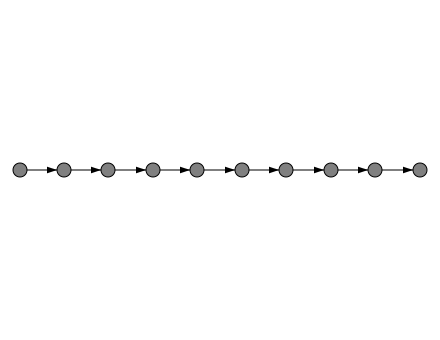

Score: 0
% of visited states: 70.0%

Iteration: 199
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(2, 0): 1.0, (3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0, (8, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.25       0.6        0.55       0.55
  0.55       0.55       0.55       0.55       0.55       0.75
  0.55       0.55       0.55       0.55       0.55       0.55
  0.55       0.55       0.55       0.55       0.51666667 0.55
  0.51666667 0.55       0.55       0.4        0.55       0.55
  0.55       0.55       0.55       0.55       0.55       0.55
  0.55       0.55       0.55       0.55       0.55       0.55
  0.55       0.55       0.55       0.55       0.51666667 0.55
  0.36666667 0.55       0

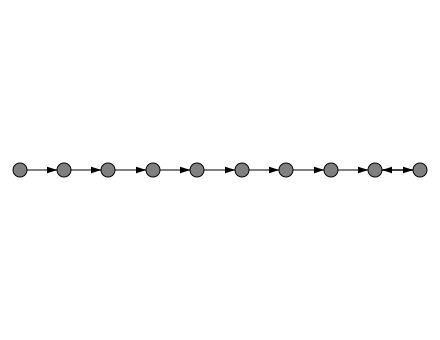

Score: 0
% of visited states: 70.0%

Iteration: 200
(0, 0) probas:  [0.03 0.24 0.73]
(0, 1) probas:  [0.02 0.22 0.76]
(1, 0) probas:  [0.03 0.23 0.74]
(1, 1) probas:  [0.02 0.21 0.77]
(2, 0) probas:  [0.02 0.22 0.76]
(2, 1) probas:  [0.02 0.2  0.78]
(3, 0) probas:  [0.02 0.21 0.77]
(3, 1) probas:  [0.02 0.2  0.79]
(4, 0) probas:  [0.02 0.2  0.79]
(4, 1) probas:  [0.02 0.19 0.8 ]
(5, 0) probas:  [0.01 0.19 0.8 ]
(5, 1) probas:  [0.01 0.18 0.81]
(6, 0) probas:  [0.01 0.17 0.81]
(6, 1) probas:  [0.01 0.17 0.82]
(7, 0) probas:  [0.01 0.16 0.83]
(7, 1) probas:  [0.01 0.16 0.83]
(8, 0) probas:  [0.01 0.15 0.84]
(8, 1) probas:  [0.01 0.15 0.84]
(9, 0) probas:  [0.01 0.14 0.85]
(9, 1) probas:  [0.01 0.14 0.85]
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(2, 0): 1.0, (3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (

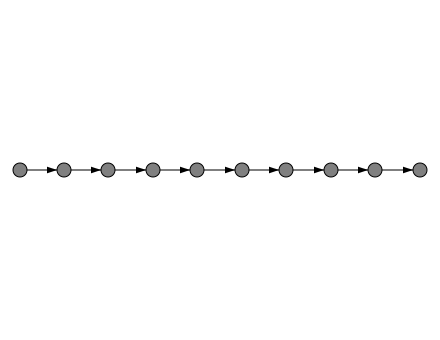

Score: 0
% of visited states: 70.0%

Iteration: 201
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(1, 0): 1.0, (2, 0): 1.0}, (2, 0): {(2, 0): 1.0, (3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(3, 0): 1.0, (5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0, (8, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.28333333 0.5        0.36666667 0.36666667
  0.36666667 0.36666667 0.36666667 0.36666667 0.36666667 0.4
  0.36666667 0.36666667 0.36666667 0.36666667 0.36666667 0.36666667
  0.36666667 0.36666667 0.36666667 0.36666667 0.35       0.36666667
  0.35       0.36666667 0.36666667 0.36666667 0.36666667 0.36666667
  0.36666667 0.36666667 0.36666667 0.36666667 0.36666667 0.36666667
  0.36666667 0.36666667 0.36666667 0.36666667 0.36666667 0.36666667
  0.36666667 0.36666667 0.

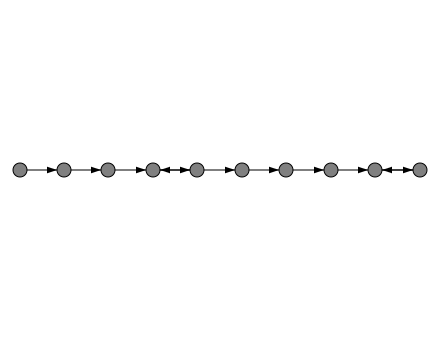

Score: 0
% of visited states: 70.0%

Iteration: 202
[{(0, 0): {(0, 0): 1.0, (1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0, (8, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.15061602 0.15891043 0.26666667 0.5        0.66666667 0.66666667
  0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.51666667
  0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
  0.66666667 0.66666667 0.66666667 0.66666667 0.75       0.66666667
  0.75       0.66666667 0.66666667 0.43333333 0.66666667 0.66666667
  0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
  0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
  0.66666667 0.66666667 0.66666667 0.66666667

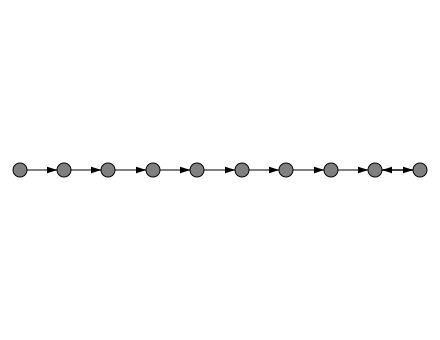

Score: 0
% of visited states: 70.0%

Iteration: 203
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(2, 0): 1.0, (3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(4, 0): 1.0, (5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.45       0.65       0.65       0.65
  0.65       0.65       0.65       0.65       0.65       0.75
  0.65       0.65       0.65       0.65       0.65       0.65
  0.65       0.65       0.65       0.65       0.61666667 0.65
  0.61666667 0.65       0.65       0.8        0.65       0.65
  0.65       0.65       0.65       0.65       0.65       0.65
  0.65       0.65       0.65       0.65       0.65       0.65
  0.65       0.65       0.65       0.65       0.68333333 0.65
  0.56666667 0.65       0

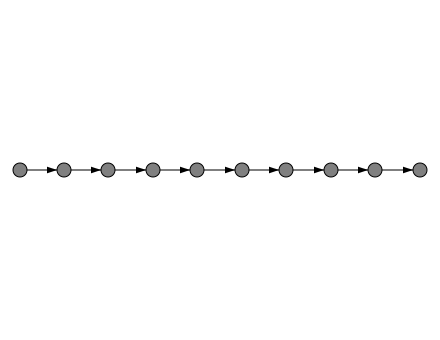

Score: 0
% of visited states: 70.0%

Iteration: 204
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

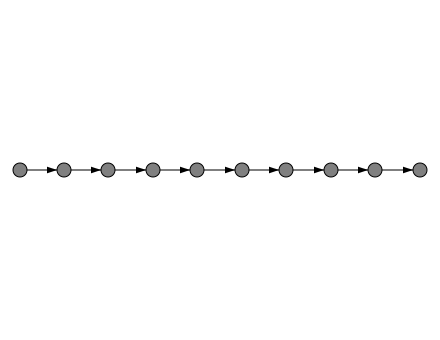

Score: 0
% of visited states: 70.0%

Iteration: 205
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(1, 0): 1.0, (2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0, (8, 0): 1.0}, (9, 0): {(9, 0): 1.0, (8, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.35       0.46666667 0.51666667 0.51666667
  0.51666667 0.51666667 0.51666667 0.51666667 0.51666667 0.43333333
  0.51666667 0.51666667 0.51666667 0.51666667 0.51666667 0.51666667
  0.51666667 0.51666667 0.51666667 0.51666667 0.5        0.51666667
  0.5        0.51666667 0.51666667 0.33333333 0.51666667 0.51666667
  0.51666667 0.51666667 0.51666667 0.51666667 0.51666667 0.51666667
  0.51666667 0.51666667 0.51666667 0.51666667 0.51666667 0.51666667
  0.51666667 0.51666667 0.516666

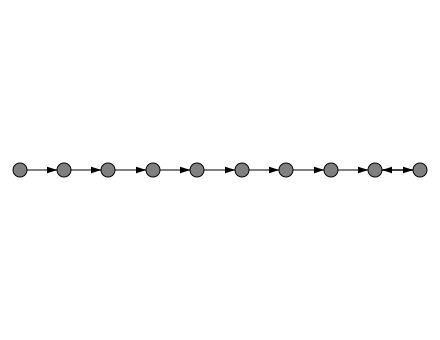

Score: 0
% of visited states: 70.0%

Iteration: 206
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(1, 0): 1.0, (2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(7, 1): 1.0}, (7, 1): {(8, 1): 1.0}, (8, 1): {(9, 1): 1.0}, (9, 1): {(9, 1): 1.0, (8, 1): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (7, 1): (7, 1), (8, 1): (8, 1), (9, 1): (9, 1)}, None]
[[0.12309149 0.13636364 0.28603878 0.33371191 0.38138504 0.38138504
  0.38138504 0.38138504 0.38138504 0.38138504 0.38138504 0.30192982
  0.38138504 0.38138504 0.38138504 0.38138504 0.38138504 0.38138504
  0.38138504 0.38138504 0.38138504 0.38138504 0.36549399 0.38138504
  0.36549399 0.38138504 0.38138504 0.23836565 0.38138504 0.38138504
  0.38138504 0.38138504 0.38138504 0.38138504 0.38138504 0.38138504
  0.38138504 0.38138504 0.38138504 0.38138504 0.38138504 0.38138504
  0.38

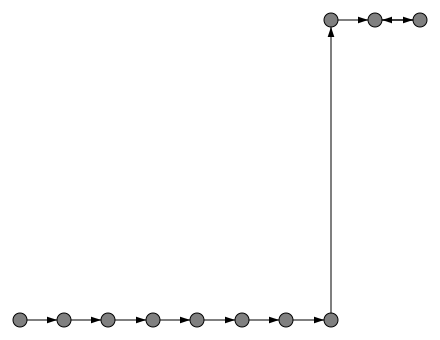

Score: 0
% of visited states: 70.0%

Iteration: 207
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(1, 0): 1.0, (3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(8, 0): 1.0, (9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.25       0.51666667 0.55       0.55
  0.55       0.55       0.55       0.55       0.55       0.55
  0.55       0.55       0.55       0.55       0.55       0.55
  0.55       0.55       0.55       0.55       0.51666667 0.55
  0.51666667 0.55       0.55       0.4        0.55       0.55
  0.55       0.55       0.55       0.55       0.55       0.55
  0.55       0.55       0.55       0.55       0.55       0.55
  0.55       0.55       0.55       0.55       0.46666667 0.55
  0.36666667 0.55       0

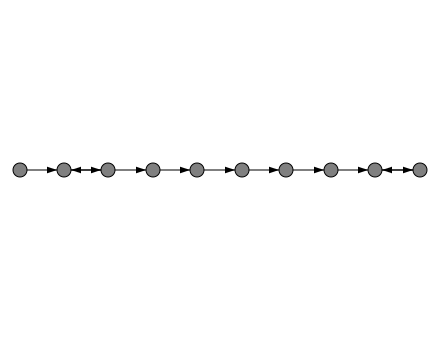

Score: 0
% of visited states: 70.0%

Iteration: 208
[{(0, 0): {(0, 0): 1.0, (1, 0): 1.0}, (1, 0): {(1, 0): 1.0, (2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(4, 0): 1.0, (5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.15061602 0.15891043 0.51666667 0.61666667 0.63333333 0.63333333
  0.63333333 0.63333333 0.63333333 0.63333333 0.63333333 0.6
  0.63333333 0.63333333 0.63333333 0.63333333 0.63333333 0.63333333
  0.63333333 0.63333333 0.63333333 0.63333333 0.65       0.63333333
  0.65       0.63333333 0.63333333 0.83333333 0.63333333 0.63333333
  0.63333333 0.63333333 0.63333333 0.63333333 0.63333333 0.63333333
  0.63333333 0.63333333 0.63333333 0.63333333 0.63333333 0.63333333
  0.63333333 0.63333333 0.63333333 0.63

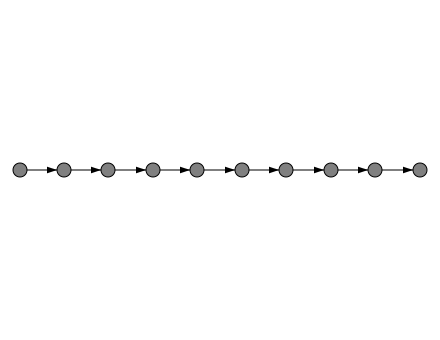

Score: 0
% of visited states: 70.0%

Iteration: 209
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0, (8, 0): 1.0}, (9, 0): {(9, 0): 1.0, (8, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.25       0.43333333 0.66666667 0.66666667
  0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.46666667
  0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
  0.66666667 0.66666667 0.66666667 0.66666667 0.58333333 0.66666667
  0.58333333 0.66666667 0.66666667 0.43333333 0.66666667 0.66666667
  0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
  0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
  0.66666667 0.66666667 0.66666667 0.66666667

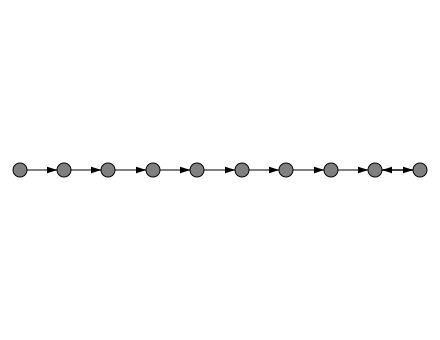

Score: 0
% of visited states: 70.0%

Iteration: 210
(0, 0) probas:  [0.02 0.15 0.83]
(0, 1) probas:  [0.02 0.11 0.87]
(1, 0) probas:  [0.02 0.13 0.84]
(1, 1) probas:  [0.02 0.11 0.88]
(2, 0) probas:  [0.02 0.12 0.86]
(2, 1) probas:  [0.01 0.1  0.89]
(3, 0) probas:  [0.02 0.11 0.88]
(3, 1) probas:  [0.01 0.09 0.9 ]
(4, 0) probas:  [0.01 0.1  0.89]
(4, 1) probas:  [0.01 0.08 0.91]
(5, 0) probas:  [0.01 0.09 0.9 ]
(5, 1) probas:  [0.01 0.07 0.92]
(6, 0) probas:  [0.01 0.08 0.91]
(6, 1) probas:  [0.01 0.06 0.93]
(7, 0) probas:  [0.01 0.07 0.92]
(7, 1) probas:  [0.01 0.06 0.94]
(8, 0) probas:  [0.01 0.06 0.93]
(8, 1) probas:  [0.01 0.05 0.94]
(9, 0) probas:  [0.   0.05 0.94]
(9, 1) probas:  [0.   0.05 0.95]
[{(0, 0): {(0, 0): 1.0, (1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(2, 0): 1.0, (4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 

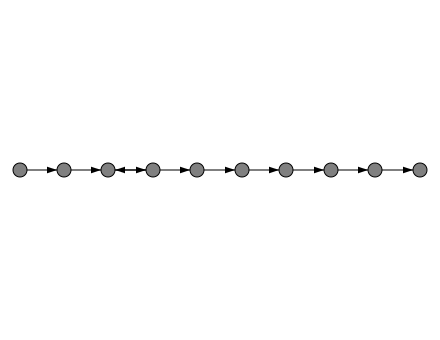

Score: 0
% of visited states: 70.0%

Iteration: 211
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(3, 0): 1.0, (4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(4, 0): 1.0, (6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.15891043 0.45       0.53333333 0.61666667 0.61666667
  0.61666667 0.61666667 0.61666667 0.61666667 0.61666667 0.56666667
  0.61666667 0.61666667 0.61666667 0.61666667 0.61666667 0.61666667
  0.61666667 0.61666667 0.61666667 0.61666667 0.56666667 0.61666667
  0.56666667 0.61666667 0.61666667 0.6        0.61666667 0.61666667
  0.61666667 0.61666667 0.61666667 0.61666667 0.61666667 0.61666667
  0.61666667 0.61666667 0.61666667 0.61666667 0.61666667 0.61666667
  0.61666667 0.61666667 0.61666667 0.61666667

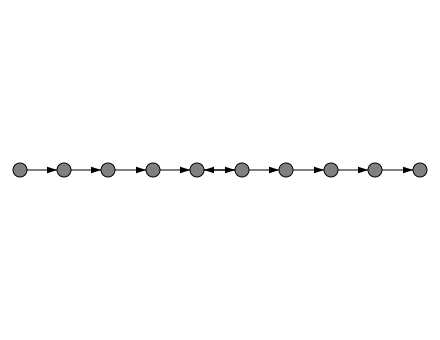

Score: 0
% of visited states: 70.0%

Iteration: 212
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(1, 0): 1.0, (3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0, (8, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.25       0.51666667 0.55       0.55
  0.55       0.55       0.55       0.55       0.55       0.55
  0.55       0.55       0.55       0.55       0.55       0.55
  0.55       0.55       0.55       0.55       0.51666667 0.55
  0.51666667 0.55       0.55       0.4        0.55       0.55
  0.55       0.55       0.55       0.55       0.55       0.55
  0.55       0.55       0.55       0.55       0.55       0.55
  0.55       0.55       0.55       0.55       0.46666667 0.55
  0.36666667 0.55       0

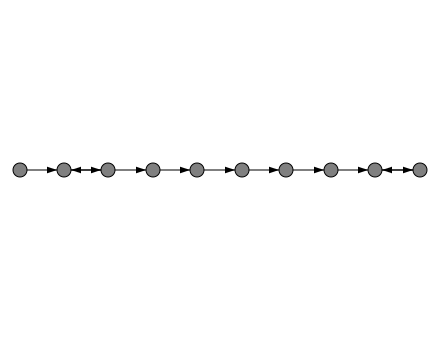

Score: 0
% of visited states: 70.0%

Iteration: 213
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(5, 0): 1.0, (6, 0): 1.0}, (6, 0): {(6, 0): 1.0, (7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.65       0.48333333 0.66666667 0.66666667
  0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.51666667
  0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
  0.66666667 0.66666667 0.66666667 0.66666667 0.58333333 0.66666667
  0.58333333 0.66666667 0.66666667 0.58333333 0.66666667 0.66666667
  0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
  0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
  0.66666667 0.66666667 0.66666667 0.66666667

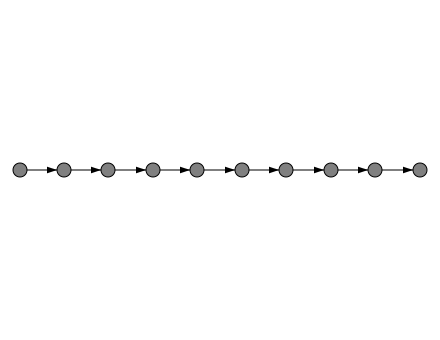

Score: 0
% of visited states: 70.0%

Iteration: 214
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

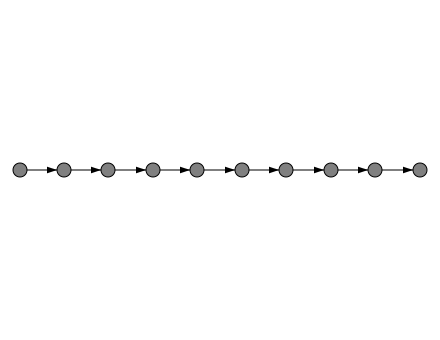

Score: 0
% of visited states: 70.0%

Iteration: 215
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(1, 0): 1.0, (2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(3, 0): 1.0, (5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0, (8, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.38333333 0.4        0.4        0.4
  0.4        0.4        0.4        0.4        0.4        0.36666667
  0.4        0.4        0.4        0.4        0.4        0.4
  0.4        0.4        0.4        0.4        0.38333333 0.4
  0.38333333 0.4        0.4        0.4        0.4        0.4
  0.4        0.4        0.4        0.4        0.4        0.4
  0.4        0.4        0.4        0.4        0.4        0.4
  0.4        0.4        0.4        0.4        0.35       0.4
  0.33333333 

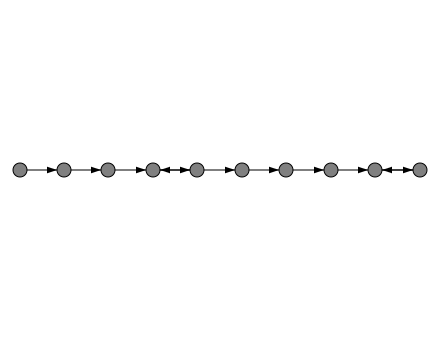

Score: 0
% of visited states: 70.0%

Iteration: 216
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(1, 0): 1.0, (2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(7, 1): 1.0}, (7, 1): {(8, 1): 1.0}, (8, 1): {(9, 1): 1.0}, (9, 1): {(9, 1): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (7, 1): (7, 1), (8, 1): (8, 1), (9, 1): (9, 1)}, None]
[[0.12309149 0.13636364 0.28603878 0.33371191 0.38138504 0.38138504
  0.38138504 0.38138504 0.38138504 0.38138504 0.38138504 0.30192982
  0.38138504 0.38138504 0.38138504 0.38138504 0.38138504 0.38138504
  0.38138504 0.38138504 0.38138504 0.38138504 0.36549399 0.38138504
  0.36549399 0.38138504 0.38138504 0.23836565 0.38138504 0.38138504
  0.38138504 0.38138504 0.38138504 0.38138504 0.38138504 0.38138504
  0.38138504 0.38138504 0.38138504 0.38138504 0.38138504 0.38138504
  0.38138504 0.3813

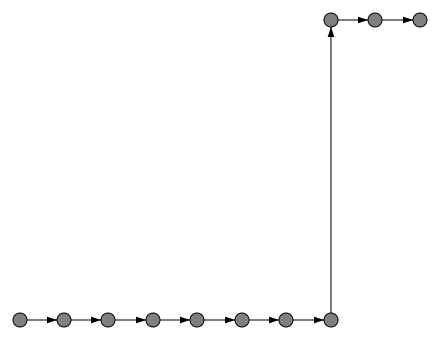

Score: 0
% of visited states: 70.0%

Iteration: 217
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(4, 0): 1.0, (5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0, (8, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.28333333 0.36666667 0.5        0.5
  0.5        0.5        0.5        0.5        0.5        0.4
  0.5        0.5        0.5        0.5        0.5        0.5
  0.5        0.5        0.5        0.5        0.43333333 0.5
  0.43333333 0.5        0.5        0.75       0.5        0.5
  0.5        0.5        0.5        0.5        0.5        0.5
  0.5        0.5        0.5        0.5        0.5        0.5
  0.5        0.5        0.5        0.5        0.38333333 0.5
  0.43333333 0.5        0.5      

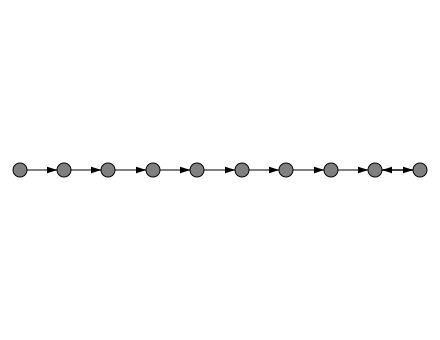

Score: 0
% of visited states: 70.0%

Iteration: 218
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(0, 0): 1.0, (2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(3, 0): 1.0, (4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(8, 0): 1.0, (9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.15891043 0.3        0.43333333 0.45       0.45
  0.45       0.45       0.45       0.45       0.45       0.43333333
  0.45       0.45       0.45       0.45       0.45       0.45
  0.45       0.45       0.45       0.45       0.43333333 0.45
  0.43333333 0.45       0.45       0.38333333 0.45       0.45
  0.45       0.45       0.45       0.45       0.45       0.45
  0.45       0.45       0.45       0.45       0.45       0.45
  0.45       0.45       0.45       0.45       0.51666667 0.45
  0.35

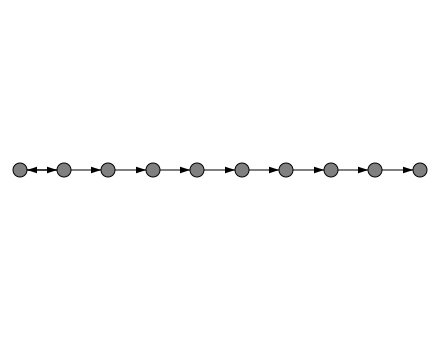

Score: 0
% of visited states: 70.0%

Iteration: 219
[{(0, 0): {(0, 0): 1.0, (1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(3, 0): 1.0, (4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(7, 1): 1.0}, (7, 1): {(8, 1): 1.0}, (8, 1): {(8, 1): 1.0, (9, 1): 1.0}, (9, 1): {(9, 1): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (7, 1): (7, 1), (8, 1): (8, 1), (9, 1): (9, 1)}, None]
[[0.14360674 0.16666667 0.14301939 0.2224746  0.27014773 0.27014773
  0.27014773 0.27014773 0.27014773 0.27014773 0.27014773 0.23836565
  0.27014773 0.27014773 0.27014773 0.27014773 0.27014773 0.27014773
  0.27014773 0.27014773 0.27014773 0.27014773 0.31782086 0.27014773
  0.31782086 0.27014773 0.27014773 0.2224746  0.27014773 0.27014773
  0.27014773 0.27014773 0.27014773 0.27014773 0.27014773 0.27014773
  0.27014773 0.27014773 0.27014773 0.27014773 0.27014773 0.27

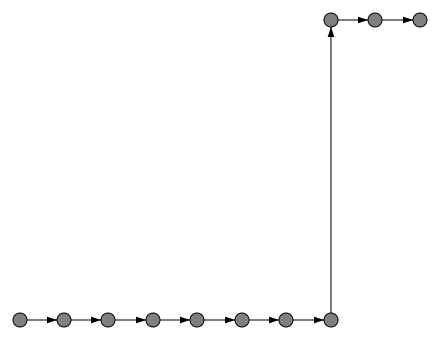

Score: 0
% of visited states: 70.0%

Iteration: 220
(0, 0) probas:  [0.06 0.29 0.66]
(0, 1) probas:  [0.03 0.22 0.74]
(1, 0) probas:  [0.05 0.28 0.67]
(1, 1) probas:  [0.03 0.22 0.75]
(2, 0) probas:  [0.04 0.26 0.69]
(2, 1) probas:  [0.03 0.2  0.77]
(3, 0) probas:  [0.04 0.25 0.71]
(3, 1) probas:  [0.03 0.19 0.78]
(4, 0) probas:  [0.03 0.23 0.73]
(4, 1) probas:  [0.02 0.18 0.79]
(5, 0) probas:  [0.03 0.22 0.75]
(5, 1) probas:  [0.02 0.17 0.81]
(6, 0) probas:  [0.03 0.2  0.77]
(6, 1) probas:  [0.02 0.16 0.82]
(7, 0) probas:  [0.02 0.19 0.79]
(7, 1) probas:  [0.02 0.15 0.84]
(8, 0) probas:  [0.02 0.17 0.81]
(8, 1) probas:  [0.01 0.14 0.85]
(9, 0) probas:  [0.02 0.16 0.82]
(9, 1) probas:  [0.01 0.13 0.86]
[{(0, 0): {(0, 0): 1.0, (1, 0): 1.0}, (1, 0): {(1, 0): 1.0, (2, 0): 1.0}, (2, 0): {(2, 0): 1.0, (3, 0): 1.0}, (3, 0): {(3, 0): 1.0, (2, 0): 1.0, (4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(8, 0): 1.0, (9, 0): 1.0}, (

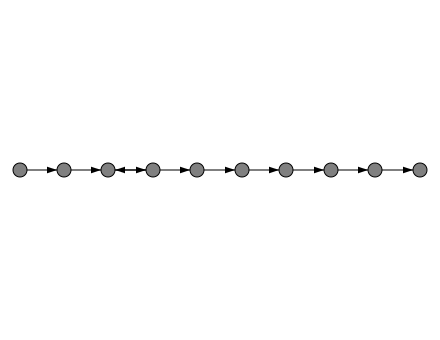

Score: 0
% of visited states: 70.0%

Iteration: 221
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(2, 0): 1.0, (3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(6, 0): 1.0, (7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(8, 0): 1.0, (9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.33333333 0.45       0.41666667 0.41666667
  0.41666667 0.41666667 0.41666667 0.41666667 0.41666667 0.6
  0.41666667 0.41666667 0.41666667 0.41666667 0.41666667 0.41666667
  0.41666667 0.41666667 0.41666667 0.41666667 0.38333333 0.41666667
  0.38333333 0.41666667 0.41666667 0.35       0.41666667 0.41666667
  0.41666667 0.41666667 0.41666667 0.41666667 0.41666667 0.41666667
  0.41666667 0.41666667 0.41666667 0.41666667 0.41666667 0.41666667
  0.41666667 0.41666667 0.41666667 0.41

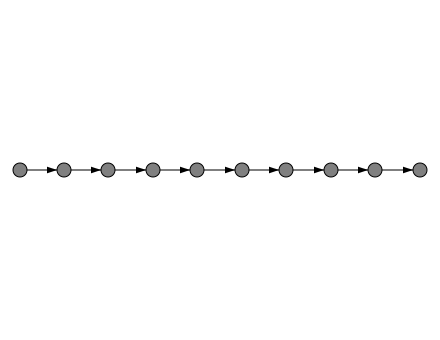

Score: 0
% of visited states: 70.0%

Iteration: 222
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0, (2, 0): 1.0}, (3, 0): {(2, 0): 1.0, (3, 0): 1.0, (4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(7, 1): 1.0}, (7, 1): {(8, 1): 1.0}, (8, 1): {(8, 1): 1.0, (9, 1): 1.0}, (9, 1): {(9, 1): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (7, 1): (7, 1), (8, 1): (8, 1), (9, 1): (9, 1)}, None]
[[0.14360674 0.13636364 0.14301939 0.25425669 0.27014773 0.27014773
  0.27014773 0.27014773 0.27014773 0.27014773 0.27014773 0.31782086
  0.27014773 0.27014773 0.27014773 0.27014773 0.27014773 0.27014773
  0.27014773 0.27014773 0.27014773 0.27014773 0.23836565 0.27014773
  0.23836565 0.27014773 0.27014773 0.2224746  0.27014773 0.27014773
  0.27014773 0.27014773 0.27014773 0.27014773 0.27014773 0.27014773
  0.27014773 0.27014773 0.27014773 0.27014773 0.

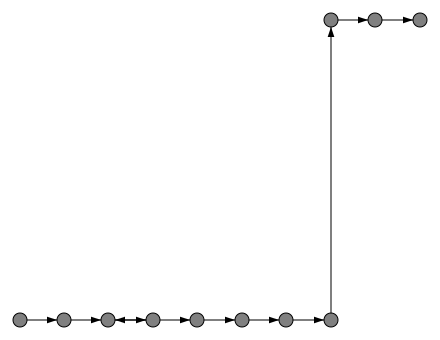

Score: 0
% of visited states: 70.0%

Iteration: 223
[{(0, 0): {(0, 0): 1.0, (1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(4, 0): 1.0, (5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0, (8, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.15061602 0.15891043 0.26666667 0.35       0.43333333 0.43333333
  0.43333333 0.43333333 0.43333333 0.43333333 0.43333333 0.36666667
  0.43333333 0.43333333 0.43333333 0.43333333 0.43333333 0.43333333
  0.43333333 0.43333333 0.43333333 0.43333333 0.5        0.43333333
  0.5        0.43333333 0.43333333 0.66666667 0.43333333 0.43333333
  0.43333333 0.43333333 0.43333333 0.43333333 0.43333333 0.43333333
  0.43333333 0.43333333 0.43333333 0.43333333 0.43333333 0.43333333
  0.43333333 0.43333333 0.433333

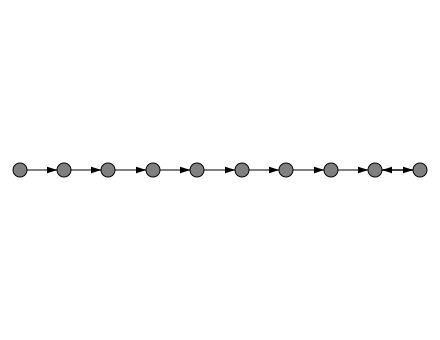

Score: 0
% of visited states: 70.0%

Iteration: 224
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(1, 0): 1.0, (2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(5, 0): 1.0, (6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(7, 1): 1.0}, (7, 1): {(8, 1): 1.0}, (8, 1): {(9, 1): 1.0}, (9, 1): {(9, 1): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (7, 1): (7, 1), (8, 1): (8, 1), (9, 1): (9, 1)}, None]
[[0.12309149 0.13636364 0.30192982 0.23836565 0.25425669 0.25425669
  0.25425669 0.25425669 0.25425669 0.25425669 0.25425669 0.20658356
  0.25425669 0.25425669 0.25425669 0.25425669 0.25425669 0.25425669
  0.25425669 0.25425669 0.25425669 0.25425669 0.23836565 0.25425669
  0.23836565 0.25425669 0.25425669 0.20658356 0.25425669 0.25425669
  0.25425669 0.25425669 0.25425669 0.25425669 0.25425669 0.25425669
  0.25425669 0.25425669 0.25425669 0.25425669 0.25425669 0.25425669
  0.25

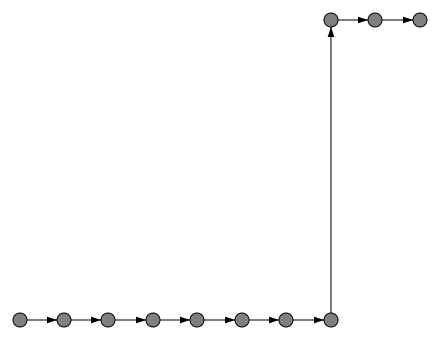

Score: 0
% of visited states: 70.0%

Iteration: 225
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(4, 0): 1.0, (5, 0): 1.0}, (5, 0): {(5, 0): 1.0, (6, 0): 1.0}, (6, 0): {(5, 0): 1.0, (7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.5        0.45       0.58333333 0.58333333
  0.58333333 0.58333333 0.58333333 0.58333333 0.58333333 0.48333333
  0.58333333 0.58333333 0.58333333 0.58333333 0.58333333 0.58333333
  0.58333333 0.58333333 0.58333333 0.58333333 0.51666667 0.58333333
  0.51666667 0.58333333 0.58333333 0.66666667 0.58333333 0.58333333
  0.58333333 0.58333333 0.58333333 0.58333333 0.58333333 0.58333333
  0.58333333 0.58333333 0.58333333 0.58333333 0.58333333 0.58333333
  0.58333333 0.58333333 0.583333

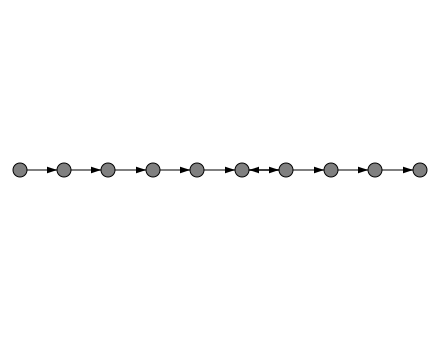

Score: 0
% of visited states: 70.0%

Iteration: 226
[{(0, 0): {(0, 0): 1.0, (1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(2, 0): 1.0, (3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(4, 0): 1.0, (5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(7, 1): 1.0}, (7, 1): {(8, 1): 1.0}, (8, 1): {(8, 1): 1.0, (9, 1): 1.0}, (9, 1): {(9, 1): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (7, 1): (7, 1), (8, 1): (8, 1), (9, 1): (9, 1)}, None]
[[0.14360674 0.15151515 0.14301939 0.2224746  0.20658356 0.20658356
  0.20658356 0.20658356 0.20658356 0.20658356 0.20658356 0.27014773
  0.20658356 0.20658356 0.20658356 0.20658356 0.20658356 0.20658356
  0.20658356 0.20658356 0.20658356 0.20658356 0.23836565 0.20658356
  0.23836565 0.20658356 0.20658356 0.30192982 0.20658356 0.20658356
  0.20658356 0.20658356 0.20658356 0.20658356 0.20658356 0.20658356
  0.20658356 0.20658356 0.20658356 0.20658356 0.

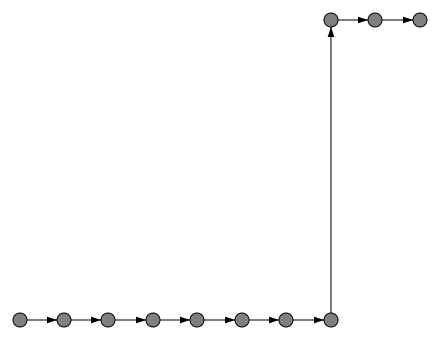

Score: 0
% of visited states: 70.0%

Iteration: 227
[{(0, 0): {(0, 0): 1.0, (1, 0): 1.0}, (1, 0): {(1, 0): 1.0, (2, 0): 1.0}, (2, 0): {(2, 0): 1.0, (3, 0): 1.0}, (3, 0): {(3, 0): 1.0, (4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(5, 0): 1.0, (6, 0): 1.0}, (6, 0): {(5, 0): 1.0, (7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.15061602 0.17480147 0.45       0.48333333 0.43333333 0.43333333
  0.43333333 0.43333333 0.43333333 0.43333333 0.43333333 0.45
  0.43333333 0.43333333 0.43333333 0.43333333 0.43333333 0.43333333
  0.43333333 0.43333333 0.43333333 0.43333333 0.45       0.43333333
  0.45       0.43333333 0.43333333 0.41666667 0.43333333 0.43333333
  0.43333333 0.43333333 0.43333333 0.43333333 0.43333333 0.43333333
  0.43333333 0.43333333 0.43333333 0.43333333 0.43333333 0.43333333

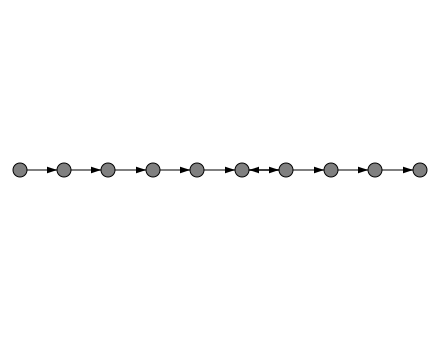

Score: 0
% of visited states: 70.0%

Iteration: 228
[{(0, 0): {(0, 0): 1.0, (1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(2, 0): 1.0, (3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(5, 0): 1.0, (6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(7, 1): 1.0}, (7, 1): {(8, 1): 1.0}, (8, 1): {(8, 1): 1.0, (9, 1): 1.0}, (9, 1): {(9, 1): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (7, 1): (7, 1), (8, 1): (8, 1), (9, 1): (9, 1)}, None]
[[0.14360674 0.15151515 0.15891043 0.23836565 0.20658356 0.20658356
  0.20658356 0.20658356 0.20658356 0.20658356 0.20658356 0.30192982
  0.20658356 0.20658356 0.20658356 0.20658356 0.20658356 0.20658356
  0.20658356 0.20658356 0.20658356 0.20658356 0.23836565 0.20658356
  0.23836565 0.20658356 0.20658356 0.17480147 0.20658356 0.20658356
  0.20658356 0.20658356 0.20658356 0.20658356 0.20658356 0.20658356
  0.20658356 0.20658356 0.20658356 0.20658356 0.

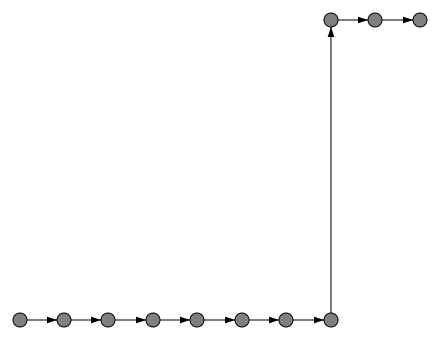

Score: 0
% of visited states: 70.0%

Iteration: 229
[{(0, 0): {(0, 0): 1.0, (1, 0): 1.0}, (1, 0): {(1, 0): 1.0, (2, 0): 1.0}, (2, 0): {(2, 0): 1.0, (3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(6, 0): 1.0, (7, 0): 1.0}, (7, 0): {(7, 1): 1.0}, (7, 1): {(8, 1): 1.0}, (8, 1): {(8, 1): 1.0, (9, 1): 1.0}, (9, 1): {(9, 1): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (7, 1): (7, 1), (8, 1): (8, 1), (9, 1): (9, 1)}, None]
[[0.14360674 0.15151515 0.17480147 0.36549399 0.2224746  0.2224746
  0.2224746  0.2224746  0.2224746  0.2224746  0.2224746  0.28603878
  0.2224746  0.2224746  0.2224746  0.2224746  0.2224746  0.2224746
  0.2224746  0.2224746  0.2224746  0.2224746  0.23836565 0.2224746
  0.23836565 0.2224746  0.2224746  0.15891043 0.2224746  0.2224746
  0.2224746  0.2224746  0.2224746  0.2224746  0.2224746  0.2224746
  0.2224746  0.2224746  0.2224746  0.222

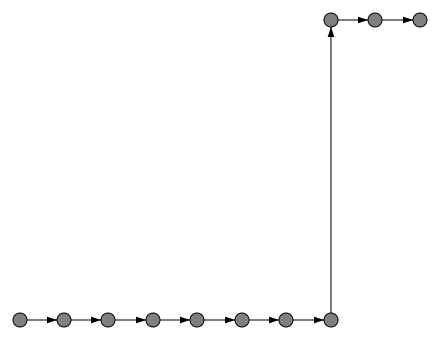

Score: 0
% of visited states: 70.0%

Iteration: 230
(0, 0) probas:  [0.03 0.51 0.46]
(0, 1) probas:  [0.01 0.48 0.5 ]
(1, 0) probas:  [0.02 0.51 0.47]
(1, 1) probas:  [0.01 0.48 0.51]
(2, 0) probas:  [0.02 0.51 0.47]
(2, 1) probas:  [0.01 0.48 0.51]
(3, 0) probas:  [0.02 0.51 0.47]
(3, 1) probas:  [0.01 0.48 0.51]
(4, 0) probas:  [0.01 0.51 0.48]
(4, 1) probas:  [0.01 0.48 0.52]
(5, 0) probas:  [0.01 0.51 0.48]
(5, 1) probas:  [0.01 0.47 0.52]
(6, 0) probas:  [0.01 0.51 0.48]
(6, 1) probas:  [0.01 0.47 0.52]
(7, 0) probas:  [0.01 0.5  0.49]
(7, 1) probas:  [0.   0.47 0.53]
(8, 0) probas:  [0.01 0.5  0.49]
(8, 1) probas:  [0.   0.47 0.53]
(9, 0) probas:  [0.01 0.5  0.5 ]
(9, 1) probas:  [0.   0.46 0.53]
[{(0, 0): {(0, 0): 1.0, (1, 0): 1.0}, (1, 0): {(1, 0): 1.0, (2, 0): 1.0}, (2, 0): {(2, 0): 1.0, (3, 0): 1.0}, (3, 0): {(3, 0): 1.0, (4, 0): 1.0}, (4, 0): {(4, 0): 1.0, (5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(6, 0): 1.0, (7, 0): 1.0}, (7, 0): {(7, 1): 1.0}, (7, 1): {(8, 1): 1.0}, (

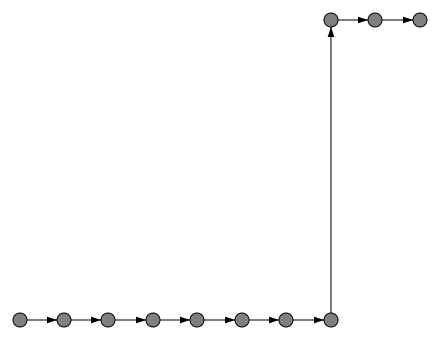

Score: 0
% of visited states: 70.0%

Iteration: 231
[{(0, 0): {(0, 0): 1.0, (1, 0): 1.0}, (1, 0): {(0, 0): 1.0, (1, 0): 1.0, (2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(5, 0): 1.0, (6, 0): 1.0}, (6, 0): {(6, 0): 1.0, (7, 0): 1.0}, (7, 0): {(7, 1): 1.0}, (7, 1): {(8, 1): 1.0}, (8, 1): {(8, 1): 1.0, (9, 1): 1.0}, (9, 1): {(9, 1): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (7, 1): (7, 1), (8, 1): (8, 1), (9, 1): (9, 1)}, None]
[[0.18463724 0.18181818 0.2224746  0.17480147 0.2224746  0.2224746
  0.2224746  0.2224746  0.2224746  0.2224746  0.2224746  0.17480147
  0.2224746  0.2224746  0.2224746  0.2224746  0.2224746  0.2224746
  0.2224746  0.2224746  0.2224746  0.2224746  0.23836565 0.2224746
  0.23836565 0.2224746  0.2224746  0.17480147 0.2224746  0.2224746
  0.2224746  0.2224746  0.2224746  0.2224746  0.2224746  0.2224746
  0.2224746  0.2224746  0.2

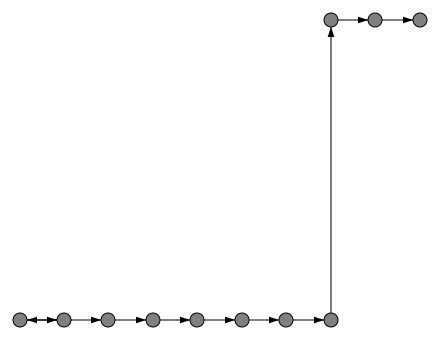

Score: 0
% of visited states: 70.0%

Iteration: 232
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(2, 0): 1.0, (3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.45       0.85       0.8        0.8
  0.8        0.8        0.8        0.8        0.8        1.
  0.8        0.8        0.8        0.8        0.8        0.8
  0.8        0.8        0.8        0.8        0.76666667 0.8
  0.76666667 0.8        0.8        0.65       0.8        0.8
  0.8        0.8        0.8        0.8        0.8        0.8
  0.8        0.8        0.8        0.8        0.8        0.8
  0.8        0.8        0.8        0.8        0.76666667 0.8
  0.6        0.8        0.8        0.8        0

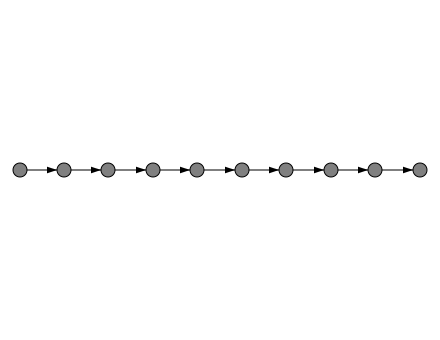

Score: 0
% of visited states: 70.0%

Iteration: 233
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(2, 0): 1.0, (3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.45       0.85       0.8        0.8
  0.8        0.8        0.8        0.8        0.8        1.
  0.8        0.8        0.8        0.8        0.8        0.8
  0.8        0.8        0.8        0.8        0.76666667 0.8
  0.76666667 0.8        0.8        0.65       0.8        0.8
  0.8        0.8        0.8        0.8        0.8        0.8
  0.8        0.8        0.8        0.8        0.8        0.8
  0.8        0.8        0.8        0.8        0.76666667 0.8
  0.6        0.8        0.8        0.8        0

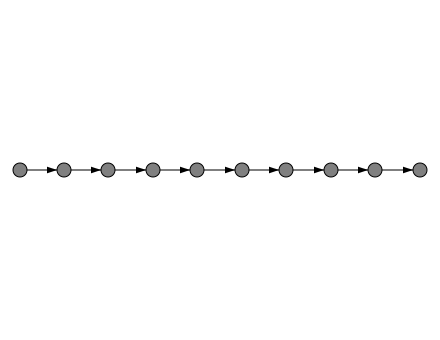

Score: 0
% of visited states: 70.0%

Iteration: 234
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(5, 0): 1.0, (6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.5        0.56666667 0.75       0.75
  0.75       0.75       0.75       0.75       0.75       0.6
  0.75       0.75       0.75       0.75       0.75       0.75
  0.75       0.75       0.75       0.75       0.66666667 0.75
  0.66666667 0.75       0.75       0.66666667 0.75       0.75
  0.75       0.75       0.75       0.75       0.75       0.75
  0.75       0.75       0.75       0.75       0.75       0.75
  0.75       0.75       0.75       0.75       0.56666667 0.75
  1.         0.75       0.75       0.75

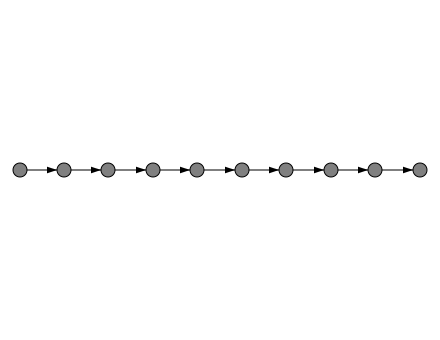

Score: 0
% of visited states: 70.0%

Iteration: 235
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

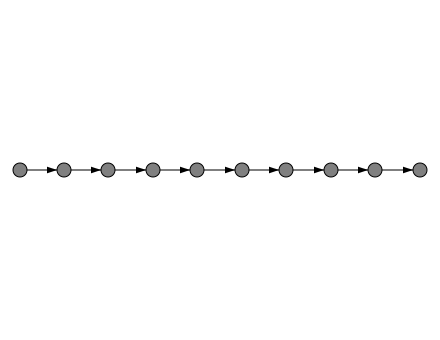

Score: 0
% of visited states: 70.0%

Iteration: 236
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

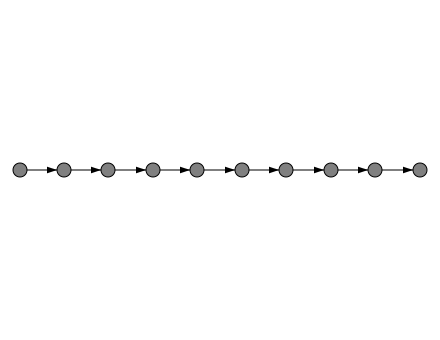

Score: 0
% of visited states: 70.0%

Iteration: 237
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

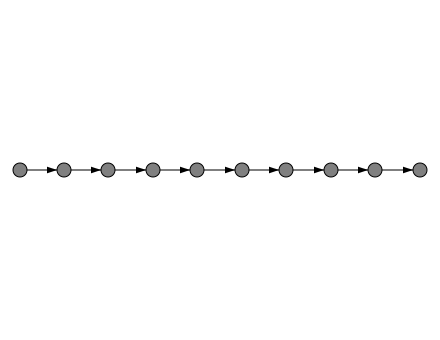

Score: 0
% of visited states: 70.0%

Iteration: 238
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

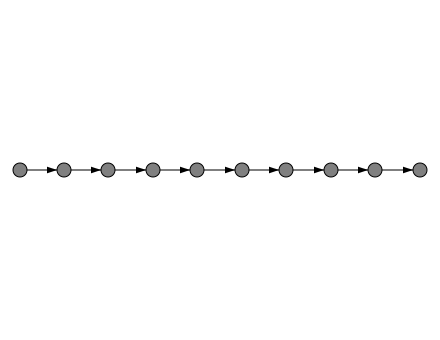

Score: 0
% of visited states: 70.0%

Iteration: 239
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

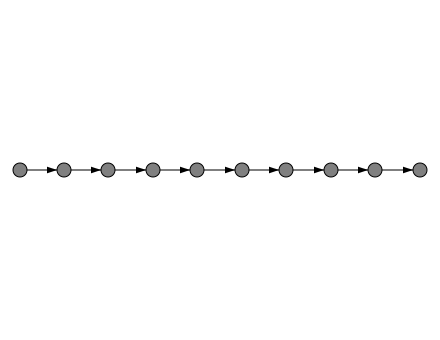

Score: 0
% of visited states: 70.0%

Iteration: 240
(0, 0) probas:  [0.01 0.03 0.96]
(0, 1) probas:  [0. 0. 1.]
(1, 0) probas:  [0.   0.02 0.97]
(1, 1) probas:  [0. 0. 1.]
(2, 0) probas:  [0.   0.02 0.98]
(2, 1) probas:  [0. 0. 1.]
(3, 0) probas:  [0.   0.01 0.99]
(3, 1) probas:  [0. 0. 1.]
(4, 0) probas:  [0.   0.01 0.99]
(4, 1) probas:  [0. 0. 1.]
(5, 0) probas:  [0. 0. 1.]
(5, 1) probas:  [0. 0. 1.]
(6, 0) probas:  [0. 0. 1.]
(6, 1) probas:  [0. 0. 1.]
(7, 0) probas:  [0. 0. 1.]
(7, 1) probas:  [0. 0. 1.]
(8, 0) probas:  [0. 0. 1.]
(8, 1) probas:  [0. 0. 1.]
(9, 0) probas:  [0. 0. 1.]
(9, 1) probas:  [0. 0. 1.]
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), 

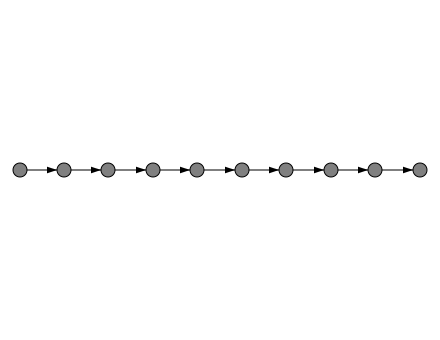

Score: 0
% of visited states: 70.0%

Iteration: 241
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(6, 0): 1.0, (8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.4        0.51666667 0.75       0.75
  0.75       0.75       0.75       0.75       0.75       0.55
  0.75       0.75       0.75       0.75       0.75       0.75
  0.75       0.75       0.75       0.75       0.66666667 0.75
  0.66666667 0.75       0.75       0.55       0.75       0.75
  0.75       0.75       0.75       0.75       0.75       0.75
  0.75       0.75       0.75       0.75       0.75       0.75
  0.75       0.75       0.75       0.75       0.48333333 0.75
  0.6        0.75       0.75       0.7

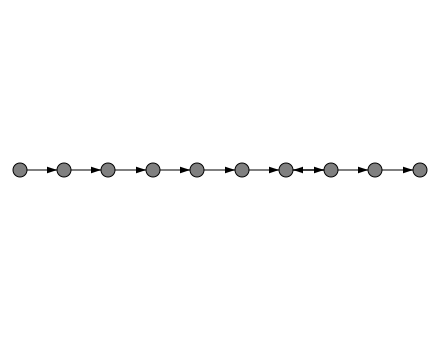

Score: 0
% of visited states: 70.0%

Iteration: 242
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

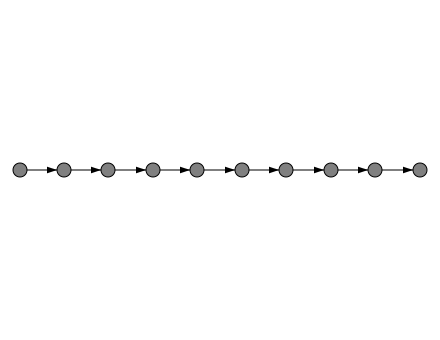

Score: 0
% of visited states: 70.0%

Iteration: 243
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

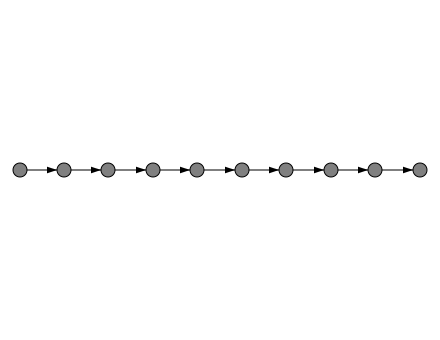

Score: 0
% of visited states: 70.0%

Iteration: 244
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

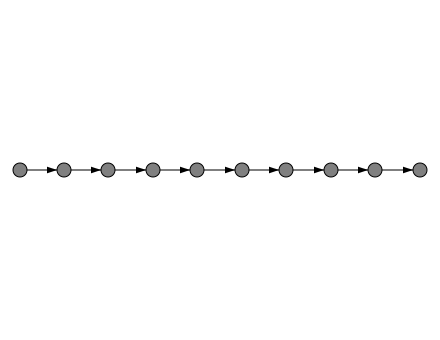

Score: 0
% of visited states: 70.0%

Iteration: 245
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

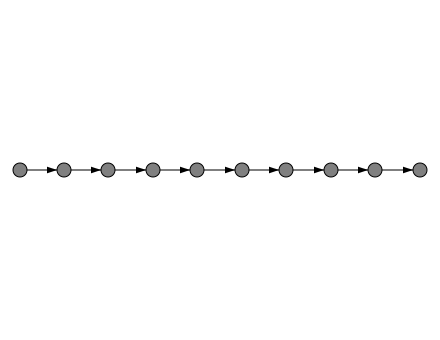

Score: 0
% of visited states: 70.0%

Iteration: 246
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

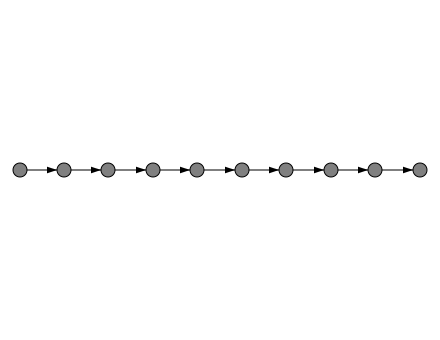

Score: 0
% of visited states: 70.0%

Iteration: 247
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

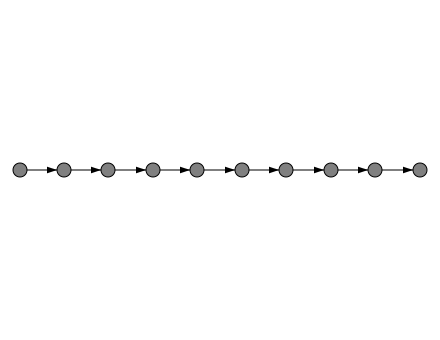

Score: 0
% of visited states: 70.0%

Iteration: 248
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

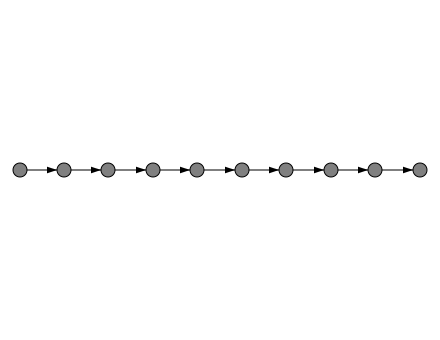

Score: 0
% of visited states: 70.0%

Iteration: 249
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

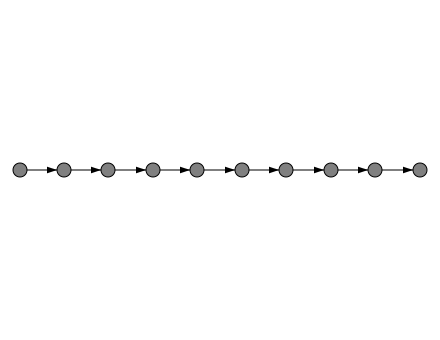

Score: 0
% of visited states: 70.0%

Iteration: 250
(0, 0) probas:  [0.01 0.04 0.95]
(0, 1) probas:  [0. 0. 1.]
(1, 0) probas:  [0.   0.03 0.97]
(1, 1) probas:  [0. 0. 1.]
(2, 0) probas:  [0.   0.02 0.98]
(2, 1) probas:  [0. 0. 1.]
(3, 0) probas:  [0.   0.01 0.99]
(3, 1) probas:  [0. 0. 1.]
(4, 0) probas:  [0.   0.01 0.99]
(4, 1) probas:  [0. 0. 1.]
(5, 0) probas:  [0.   0.   0.99]
(5, 1) probas:  [0. 0. 1.]
(6, 0) probas:  [0. 0. 1.]
(6, 1) probas:  [0. 0. 1.]
(7, 0) probas:  [0. 0. 1.]
(7, 1) probas:  [0. 0. 1.]
(8, 0) probas:  [0. 0. 1.]
(8, 1) probas:  [0. 0. 1.]
(9, 0) probas:  [0. 0. 1.]
(9, 1) probas:  [0. 0. 1.]
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8

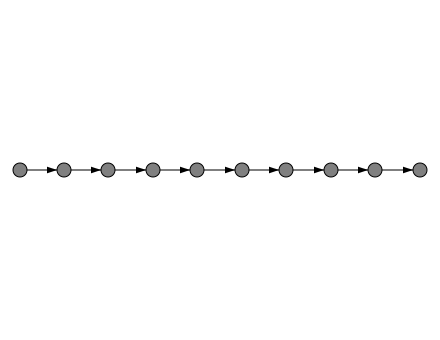

Score: 0
% of visited states: 70.0%

Iteration: 251
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

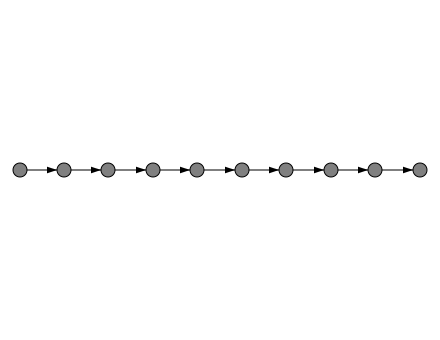

Score: 0
% of visited states: 70.0%

Iteration: 252
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

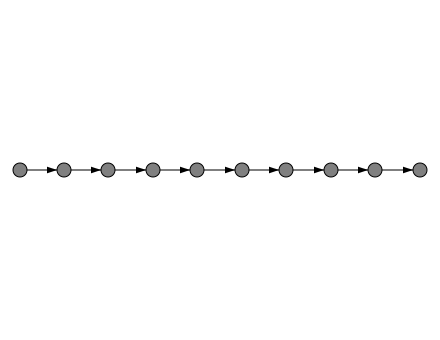

Score: 0
% of visited states: 70.0%

Iteration: 253
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

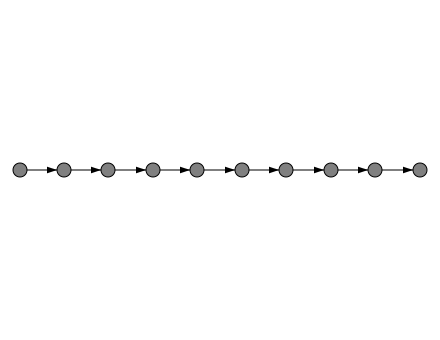

Score: 0
% of visited states: 70.0%

Iteration: 254
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

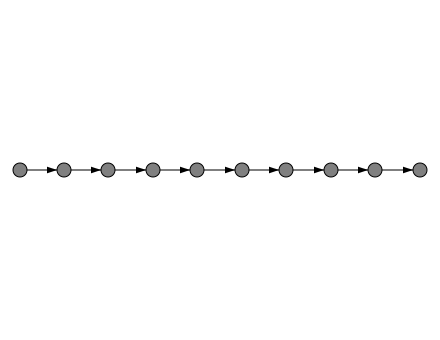

Score: 0
% of visited states: 70.0%

Iteration: 255
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

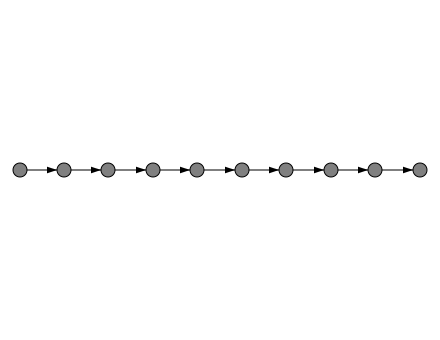

Score: 0
% of visited states: 70.0%

Iteration: 256
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

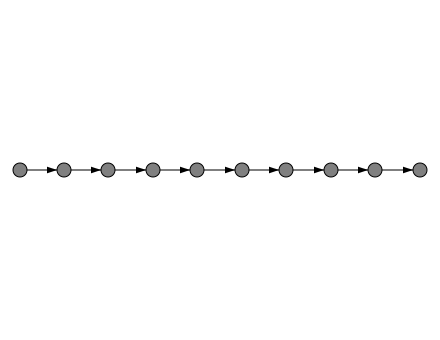

Score: 0
% of visited states: 70.0%

Iteration: 257
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

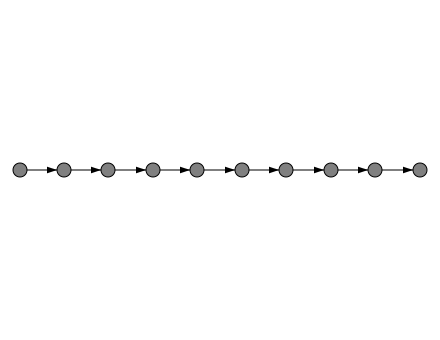

Score: 0
% of visited states: 70.0%

Iteration: 258
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

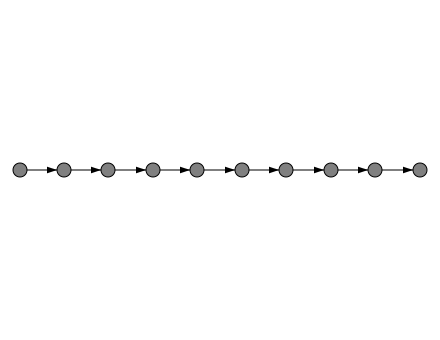

Score: 0
% of visited states: 70.0%

Iteration: 259
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

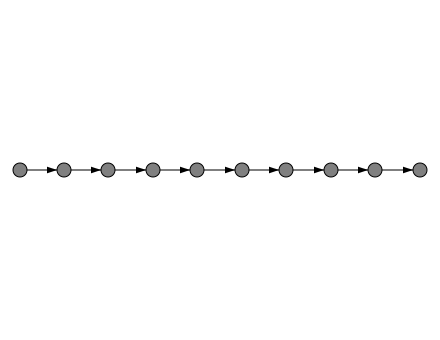

Score: 0
% of visited states: 70.0%

Iteration: 260
(0, 0) probas:  [0.01 0.06 0.93]
(0, 1) probas:  [0.   0.01 0.99]
(1, 0) probas:  [0.01 0.04 0.95]
(1, 1) probas:  [0.   0.   0.99]
(2, 0) probas:  [0.   0.03 0.96]
(2, 1) probas:  [0. 0. 1.]
(3, 0) probas:  [0.   0.02 0.98]
(3, 1) probas:  [0. 0. 1.]
(4, 0) probas:  [0.   0.01 0.98]
(4, 1) probas:  [0. 0. 1.]
(5, 0) probas:  [0.   0.01 0.99]
(5, 1) probas:  [0. 0. 1.]
(6, 0) probas:  [0.   0.01 0.99]
(6, 1) probas:  [0. 0. 1.]
(7, 0) probas:  [0.   0.   0.99]
(7, 1) probas:  [0. 0. 1.]
(8, 0) probas:  [0. 0. 1.]
(8, 1) probas:  [0. 0. 1.]
(9, 0) probas:  [0. 0. 1.]
(9, 1) probas:  [0. 0. 1.]
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7

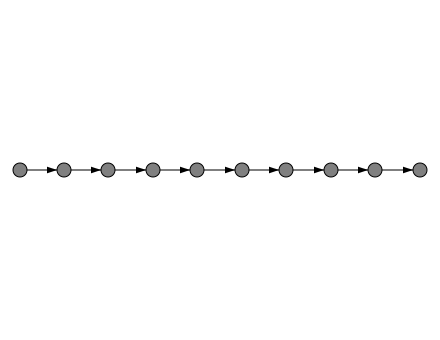

Score: 0
% of visited states: 70.0%

Iteration: 261
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(3, 0): 1.0, (4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.15891043 0.45       0.68333333 0.76666667 0.76666667
  0.76666667 0.76666667 0.76666667 0.76666667 0.76666667 0.71666667
  0.76666667 0.76666667 0.76666667 0.76666667 0.76666667 0.76666667
  0.76666667 0.76666667 0.76666667 0.76666667 0.71666667 0.76666667
  0.71666667 0.76666667 0.76666667 0.68333333 0.76666667 0.76666667
  0.76666667 0.76666667 0.76666667 0.76666667 0.76666667 0.76666667
  0.76666667 0.76666667 0.76666667 0.76666667 0.76666667 0.76666667
  0.76666667 0.76666667 0.76666667 0.76666667 0.8        0

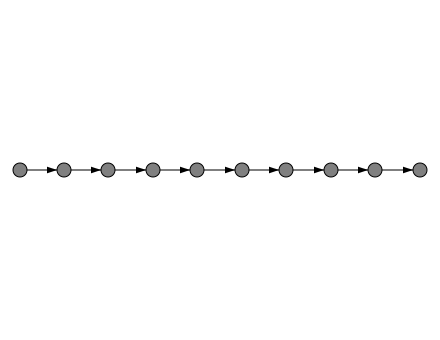

Score: 0
% of visited states: 70.0%

Iteration: 262
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

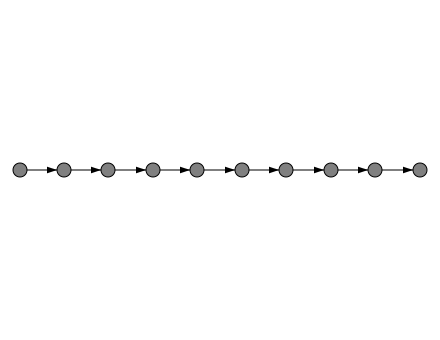

Score: 0
% of visited states: 70.0%

Iteration: 263
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

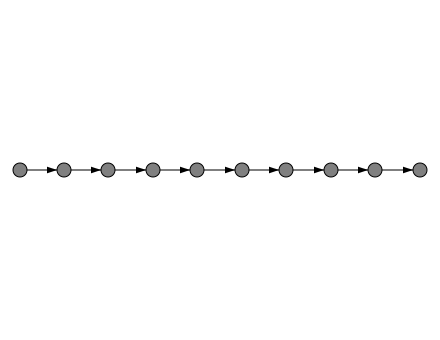

Score: 0
% of visited states: 70.0%

Iteration: 264
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

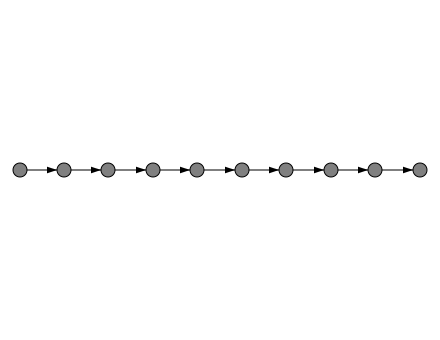

Score: 0
% of visited states: 70.0%

Iteration: 265
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

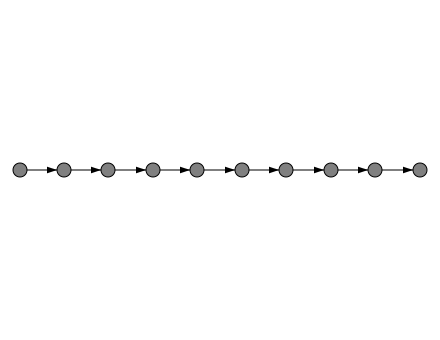

Score: 0
% of visited states: 70.0%

Iteration: 266
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

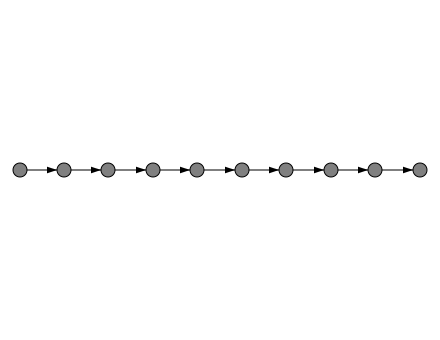

Score: 0
% of visited states: 70.0%

Iteration: 267
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(1, 0): 1.0, (2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.58333333 0.8        0.85       0.85
  0.85       0.85       0.85       0.85       0.85       0.76666667
  0.85       0.85       0.85       0.85       0.85       0.85
  0.85       0.85       0.85       0.85       0.83333333 0.85
  0.83333333 0.85       0.85       0.65       0.85       0.85
  0.85       0.85       0.85       0.85       0.85       0.85
  0.85       0.85       0.85       0.85       0.85       0.85
  0.85       0.85       0.85       0.85       0.68333333 0.85
  0.61666667 0.85       0.85    

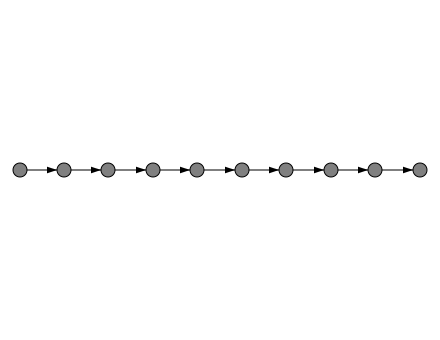

Score: 0
% of visited states: 70.0%

Iteration: 268
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

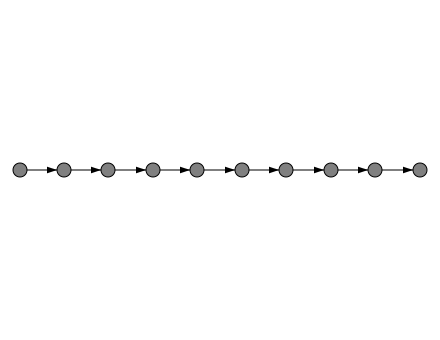

Score: 0
% of visited states: 70.0%

Iteration: 269
[{(0, 0): {(0, 0): 1.0, (1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.15061602 0.15891043 0.46666667 0.75       0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.91666667 0.76666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 1.         0.91666667
  1.         0.91666667 0.91666667 0.68333333 0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.68333333 0

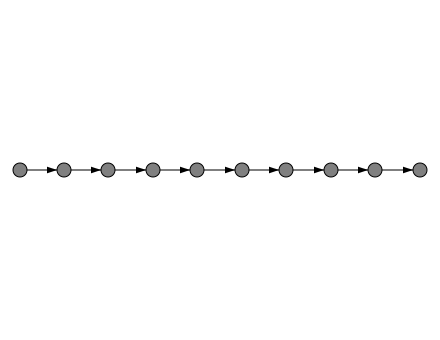

Score: 0
% of visited states: 70.0%

Iteration: 270
(0, 0) probas:  [0.01 0.05 0.94]
(0, 1) probas:  [0.   0.   0.99]
(1, 0) probas:  [0.   0.03 0.96]
(1, 1) probas:  [0. 0. 1.]
(2, 0) probas:  [0.   0.02 0.97]
(2, 1) probas:  [0. 0. 1.]
(3, 0) probas:  [0.   0.02 0.98]
(3, 1) probas:  [0. 0. 1.]
(4, 0) probas:  [0.   0.01 0.99]
(4, 1) probas:  [0. 0. 1.]
(5, 0) probas:  [0.   0.01 0.99]
(5, 1) probas:  [0. 0. 1.]
(6, 0) probas:  [0. 0. 1.]
(6, 1) probas:  [0. 0. 1.]
(7, 0) probas:  [0. 0. 1.]
(7, 1) probas:  [0. 0. 1.]
(8, 0) probas:  [0. 0. 1.]
(8, 1) probas:  [0. 0. 1.]
(9, 0) probas:  [0. 0. 1.]
(9, 1) probas:  [0. 0. 1.]
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 

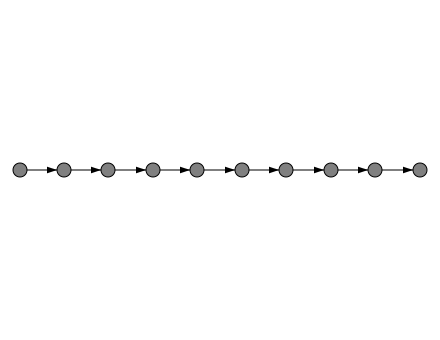

Score: 0
% of visited states: 70.0%

Iteration: 271
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

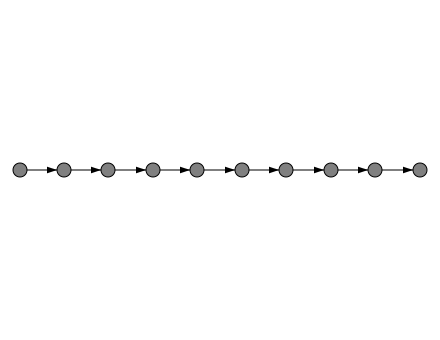

Score: 0
% of visited states: 70.0%

Iteration: 272
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

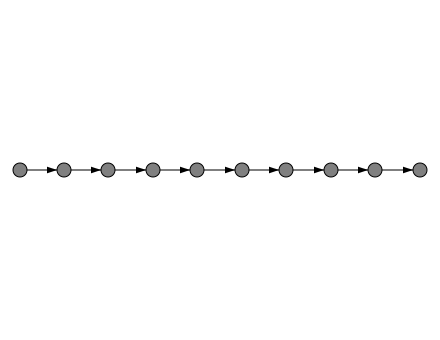

Score: 0
% of visited states: 70.0%

Iteration: 273
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

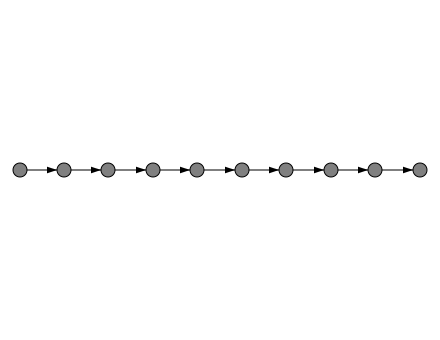

Score: 0
% of visited states: 70.0%

Iteration: 274
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

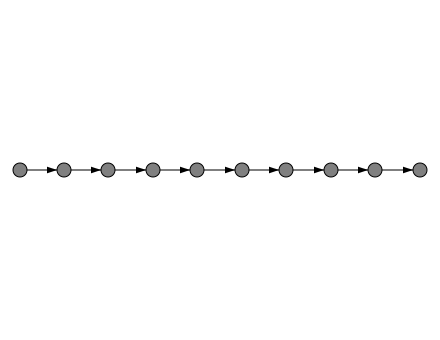

Score: 0
% of visited states: 70.0%

Iteration: 275
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

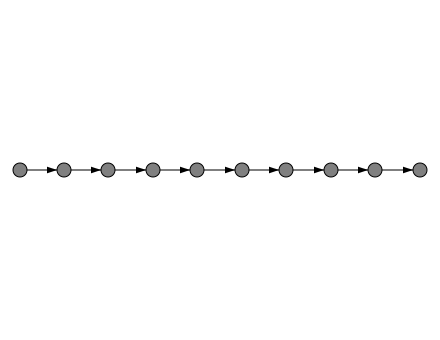

Score: 0
% of visited states: 70.0%

Iteration: 276
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(1, 0): 1.0, (2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.58333333 0.8        0.85       0.85
  0.85       0.85       0.85       0.85       0.85       0.76666667
  0.85       0.85       0.85       0.85       0.85       0.85
  0.85       0.85       0.85       0.85       0.83333333 0.85
  0.83333333 0.85       0.85       0.65       0.85       0.85
  0.85       0.85       0.85       0.85       0.85       0.85
  0.85       0.85       0.85       0.85       0.85       0.85
  0.85       0.85       0.85       0.85       0.68333333 0.85
  0.61666667 0.85       0.85    

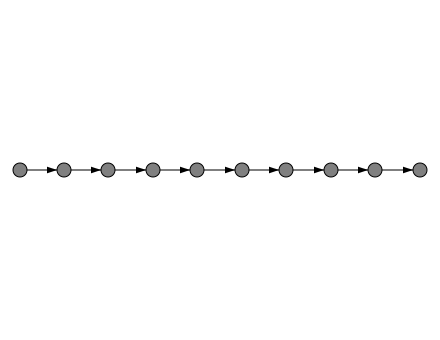

Score: 0
% of visited states: 70.0%

Iteration: 277
[{(0, 0): {(0, 0): 1.0, (1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.15061602 0.15891043 0.46666667 0.75       0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.91666667 0.76666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 1.         0.91666667
  1.         0.91666667 0.91666667 0.68333333 0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.91666667 0.91666667
  0.91666667 0.91666667 0.91666667 0.91666667 0.68333333 0

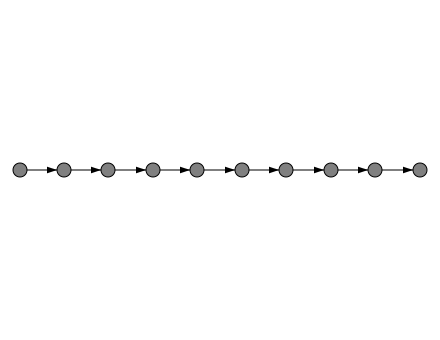

Score: 0
% of visited states: 70.0%

Iteration: 278
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

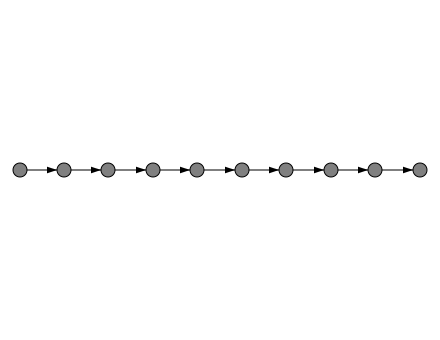

Score: 0
% of visited states: 70.0%

Iteration: 279
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

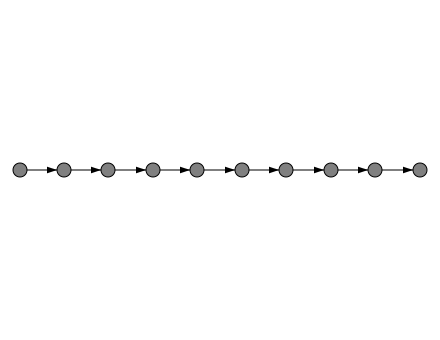

Score: 0
% of visited states: 70.0%

Iteration: 280
(0, 0) probas:  [0.01 0.05 0.94]
(0, 1) probas:  [0.   0.01 0.99]
(1, 0) probas:  [0.01 0.04 0.96]
(1, 1) probas:  [0. 0. 1.]
(2, 0) probas:  [0.   0.02 0.97]
(2, 1) probas:  [0. 0. 1.]
(3, 0) probas:  [0.   0.02 0.98]
(3, 1) probas:  [0. 0. 1.]
(4, 0) probas:  [0.   0.01 0.99]
(4, 1) probas:  [0. 0. 1.]
(5, 0) probas:  [0.   0.01 0.99]
(5, 1) probas:  [0. 0. 1.]
(6, 0) probas:  [0.   0.   0.99]
(6, 1) probas:  [0. 0. 1.]
(7, 0) probas:  [0. 0. 1.]
(7, 1) probas:  [0. 0. 1.]
(8, 0) probas:  [0. 0. 1.]
(8, 1) probas:  [0. 0. 1.]
(9, 0) probas:  [0. 0. 1.]
(9, 1) probas:  [0. 0. 1.]
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0)

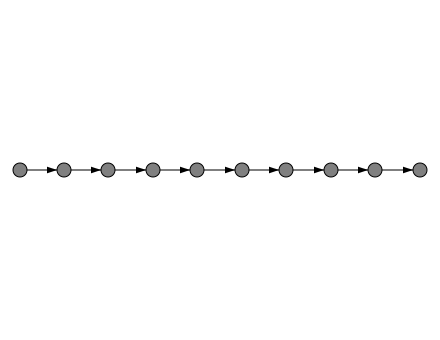

Score: 0
% of visited states: 70.0%

Iteration: 281
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

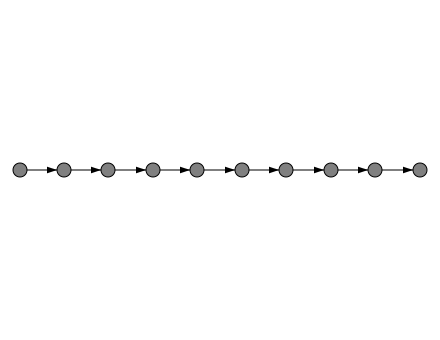

Score: 0
% of visited states: 70.0%

Iteration: 282
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

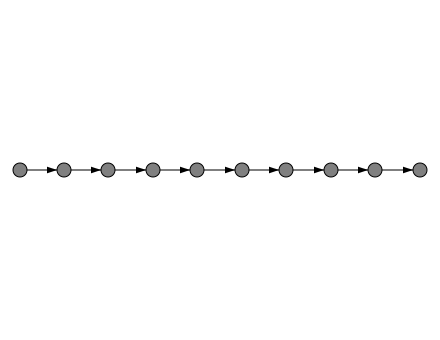

Score: 0
% of visited states: 70.0%

Iteration: 283
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

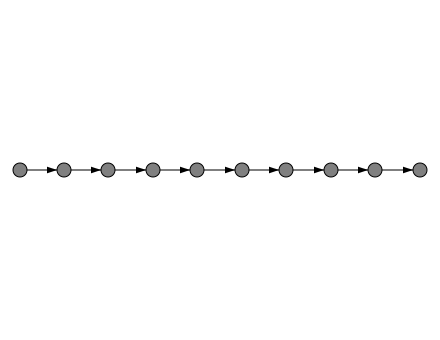

Score: 0
% of visited states: 70.0%

Iteration: 284
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

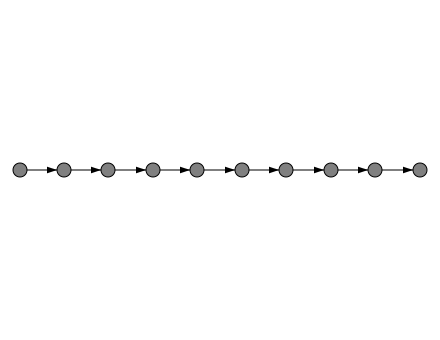

Score: 0
% of visited states: 70.0%

Iteration: 285
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

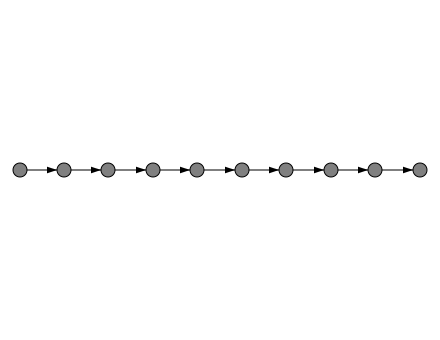

Score: 0
% of visited states: 70.0%

Iteration: 286
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

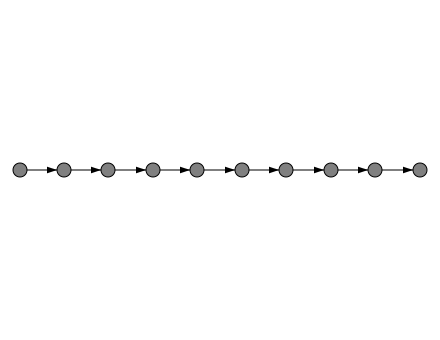

Score: 0
% of visited states: 70.0%

Iteration: 287
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(1, 0): 1.0, (2, 0): 1.0}, (2, 0): {(2, 0): 1.0, (3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 1.         0.76666667 0.76666667
  0.76666667 0.76666667 0.76666667 0.76666667 0.76666667 0.85
  0.76666667 0.76666667 0.76666667 0.76666667 0.76666667 0.76666667
  0.76666667 0.76666667 0.76666667 0.76666667 0.75       0.76666667
  0.75       0.76666667 0.76666667 0.61666667 0.76666667 0.76666667
  0.76666667 0.76666667 0.76666667 0.76666667 0.76666667 0.76666667
  0.76666667 0.76666667 0.76666667 0.76666667 0.76666667 0.76666667
  0.76666667 0.76666667 0.76666667 0.76666667 0.7  

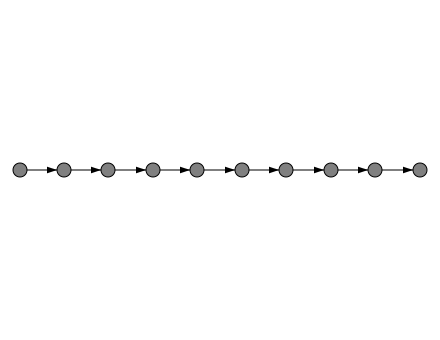

Score: 0
% of visited states: 70.0%

Iteration: 288
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

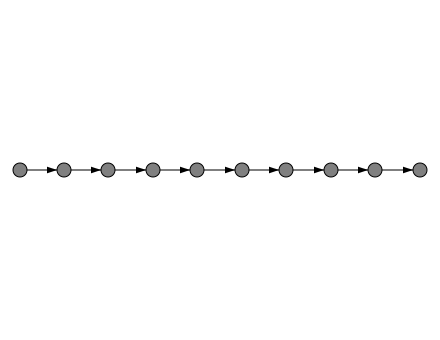

Score: 0
% of visited states: 70.0%

Iteration: 289
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

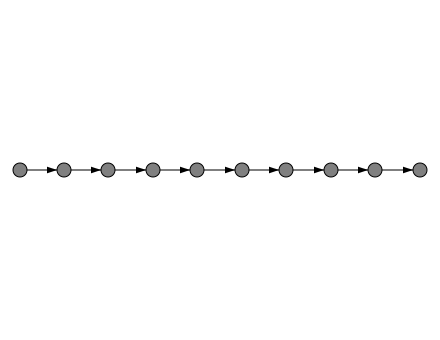

Score: 0
% of visited states: 70.0%

Iteration: 290
(0, 0) probas:  [0.01 0.05 0.94]
(0, 1) probas:  [0.   0.01 0.99]
(1, 0) probas:  [0.01 0.04 0.96]
(1, 1) probas:  [0. 0. 1.]
(2, 0) probas:  [0.   0.03 0.97]
(2, 1) probas:  [0. 0. 1.]
(3, 0) probas:  [0.   0.02 0.98]
(3, 1) probas:  [0. 0. 1.]
(4, 0) probas:  [0.   0.01 0.99]
(4, 1) probas:  [0. 0. 1.]
(5, 0) probas:  [0.   0.01 0.99]
(5, 1) probas:  [0. 0. 1.]
(6, 0) probas:  [0.   0.   0.99]
(6, 1) probas:  [0. 0. 1.]
(7, 0) probas:  [0. 0. 1.]
(7, 1) probas:  [0. 0. 1.]
(8, 0) probas:  [0. 0. 1.]
(8, 1) probas:  [0. 0. 1.]
(9, 0) probas:  [0. 0. 1.]
(9, 1) probas:  [0. 0. 1.]
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0)

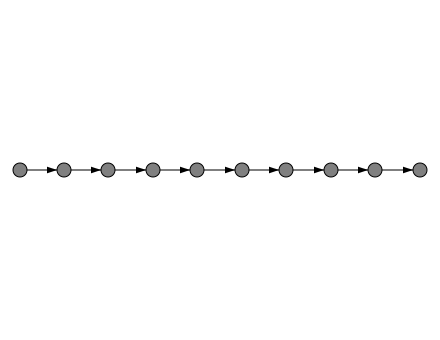

Score: 0
% of visited states: 70.0%

Iteration: 291
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

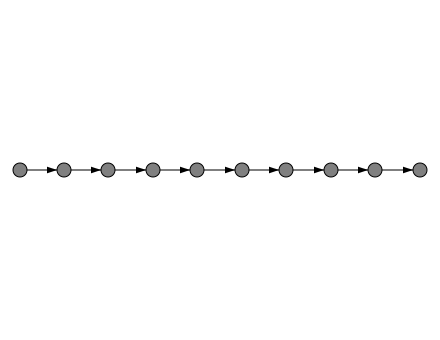

Score: 0
% of visited states: 70.0%

Iteration: 292
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(2, 0): 1.0, (3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.45       0.85       0.8        0.8
  0.8        0.8        0.8        0.8        0.8        1.
  0.8        0.8        0.8        0.8        0.8        0.8
  0.8        0.8        0.8        0.8        0.76666667 0.8
  0.76666667 0.8        0.8        0.65       0.8        0.8
  0.8        0.8        0.8        0.8        0.8        0.8
  0.8        0.8        0.8        0.8        0.8        0.8
  0.8        0.8        0.8        0.8        0.76666667 0.8
  0.6        0.8        0.8        0.8        0

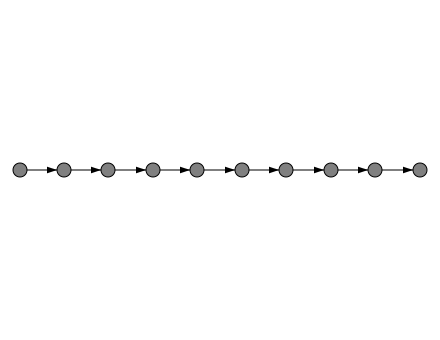

Score: 0
% of visited states: 70.0%

Iteration: 293
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

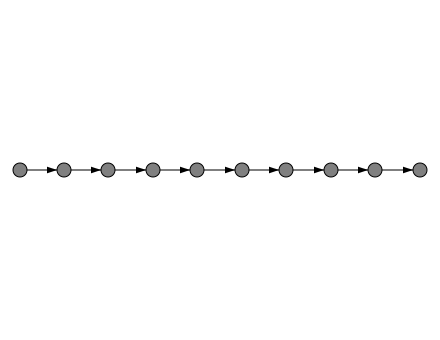

Score: 0
% of visited states: 70.0%

Iteration: 294
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

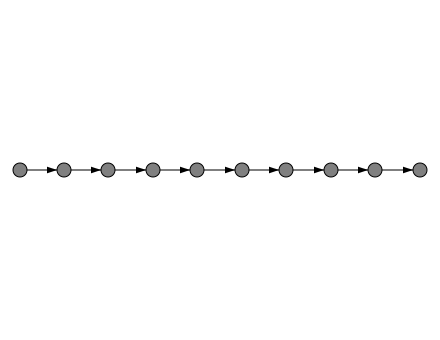

Score: 0
% of visited states: 70.0%

Iteration: 295
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

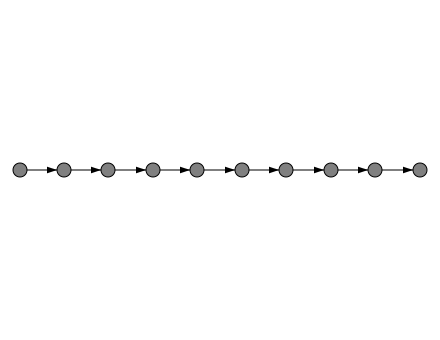

Score: 0
% of visited states: 70.0%

Iteration: 296
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(3, 0): 1.0, (4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.15891043 0.45       0.68333333 0.76666667 0.76666667
  0.76666667 0.76666667 0.76666667 0.76666667 0.76666667 0.71666667
  0.76666667 0.76666667 0.76666667 0.76666667 0.76666667 0.76666667
  0.76666667 0.76666667 0.76666667 0.76666667 0.71666667 0.76666667
  0.71666667 0.76666667 0.76666667 0.68333333 0.76666667 0.76666667
  0.76666667 0.76666667 0.76666667 0.76666667 0.76666667 0.76666667
  0.76666667 0.76666667 0.76666667 0.76666667 0.76666667 0.76666667
  0.76666667 0.76666667 0.76666667 0.76666667 0.8        0

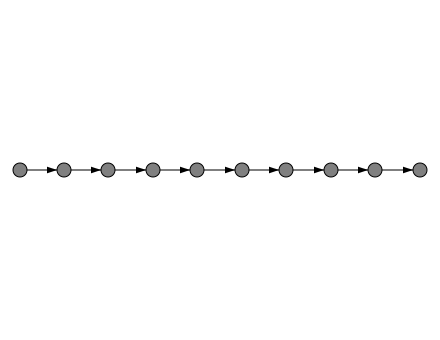

Score: 0
% of visited states: 70.0%

Iteration: 297
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

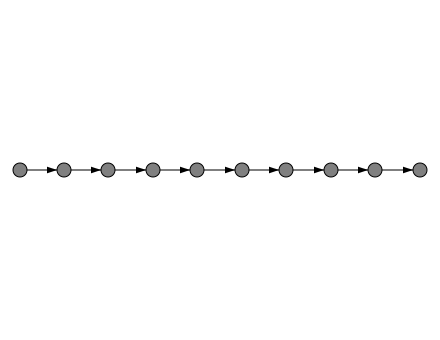

Score: 0
% of visited states: 70.0%

Iteration: 298
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

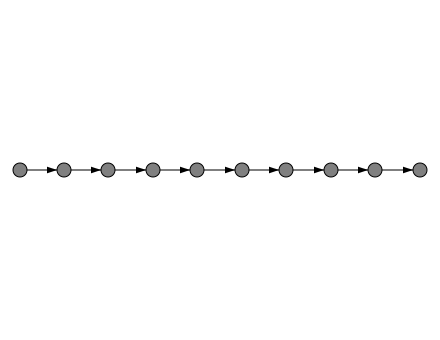

Score: 0
% of visited states: 70.0%

Iteration: 299
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(7, 0): 1.0}, (7, 0): {(8, 0): 1.0}, (8, 0): {(9, 0): 1.0}, (9, 0): {(9, 0): 1.0}}, {(0, 0): (0, 0), (1, 0): (1, 0), (2, 0): (2, 0), (3, 0): (3, 0), (4, 0): (4, 0), (5, 0): (5, 0), (6, 0): (6, 0), (7, 0): (7, 0), (8, 0): (8, 0), (9, 0): (9, 0)}, None]
[[0.12909944 0.14301939 0.48333333 0.76666667 1.         1.
  1.         1.         1.         1.         1.         0.8
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.91666667 1.
  0.91666667 1.         1.         0.75       1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.71666667 1.
  0.75       1.         1.         1.         1.         0.9166666

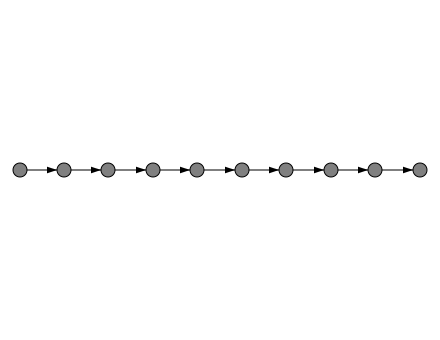

Score: 0
% of visited states: 70.0%

****************************************************************************************************
TRAINING ENDED

TIME MEASURED:  [61.53898716  0.          0.        ]
TIME MEASURED in %:  [100.   0.   0.]


In [703]:
agent = train(env, L, logs=logs)

In [480]:
from reinforce_baseline import train

L = 100
logs = True

In [481]:
agent = train(env, L, logs=logs)


****************************************************************************************************
TRAINING START


Iteration: 0
(0, 0, 0) probas:  [0.2 0.2 0.2 0.2 0.2]
(0, 0, 1) probas:  [0.23 0.18 0.2  0.2  0.19]
(0, 1, 0) probas:  [0.21 0.19 0.2  0.2  0.2 ]
(0, 1, 1) probas:  [0.23 0.18 0.2  0.19 0.2 ]
(0, 2, 0) probas:  [0.23 0.18 0.19 0.2  0.2 ]
(0, 2, 1) probas:  [0.24 0.17 0.19 0.19 0.2 ]
(1, 0, 0) probas:  [0.21 0.19 0.2  0.2  0.2 ]
(1, 0, 1) probas:  [0.23 0.18 0.21 0.19 0.19]
(1, 1, 0) probas:  [0.22 0.19 0.2  0.2  0.2 ]
(1, 1, 1) probas:  [0.23 0.18 0.2  0.19 0.19]
(1, 2, 0) probas:  [0.23 0.18 0.2  0.19 0.2 ]
(1, 2, 1) probas:  [0.24 0.17 0.19 0.19 0.2 ]
(2, 0, 0) probas:  [0.21 0.19 0.2  0.19 0.2 ]
(2, 0, 1) probas:  [0.23 0.18 0.21 0.2  0.19]
(2, 1, 0) probas:  [0.22 0.19 0.2  0.19 0.2 ]
(2, 1, 1) probas:  [0.23 0.18 0.21 0.19 0.19]
(2, 2, 0) probas:  [0.23 0.18 0.19 0.19 0.2 ]
(2, 2, 1) probas:  [0.25 0.18 0.2  0.19 0.19]
Score: 0
% of visited states: 27.8%

Iteratio